# Digital For Industrial Summative - Part 1
 
## Creating A Digital Thread


A Digital Thread is the one unifying theme or characteristic that connects every aspect of an asset or unit, right from its inception and design, to manufacture, deployment, operations, maintenance to eventual retirement.

In analysis, a digital thread is the logical with which we bind and merge the various data sources into one whole, so that it lends itself to quantitative approaches easily.

<img src = 'images/Digital_Thread.JPG' width=500>


A digital thread is a technique to 'stitch' the data that comes in disjoint tables, such that they can be put together logically. That is a task for this exercise.

Data sets provided:

We have been give 5 data sets, all of which related to one month's worth of readings taken at a live volcano site. The volcano was instrumented with multiple sensors in 10 different geographical points (nodes). Our goal is to combine and merge all of this into one digital thread, making it amenable for analysis.

Tasks:

    1.0 Read all the needed input files
    2.0 Plotting Sensor Time Series
    3.0 Descriptive Analysis One data frame at a time 
    4.0 Creating a Digital Thread from the data sets
    5.0 Time Series based analysis
    6.0 Correlations Analysis
    7.0 Data Manipulations to Merge multiple data sets
    8.0 Building A Battery Remaining-Life prediction model

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import os

# For plot
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 6
%matplotlib inline

### 1.0 Read all the needed input files

Create multiple data frames, one to hold each data table.

Convert all Data frame time stamps into date-time format, so that time-based indexing is possible

In [2]:
# Import all csv data
datatypes = pd.read_csv('datatypes.csv')
nodes = pd.read_csv('nodes.csv')
sensors = pd.read_csv('sensors.csv')
volcanos = pd.read_csv('volcanos.csv')
datapoints = pd.read_csv('datapoints.csv')

In [24]:
## Exploratory Data Ananlysis

In [3]:
datatypes.head()

,id,type,si_unit,type_id
0,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA
1,35dcb3c1-8679-11e6-bda3-ef77801087ee,pressure,pascal,PA
2,35dcb3c2-8679-11e6-bda3-ef77801087ee,humidity,relative humidity,HUMA
3,35dcdad0-8679-11e6-bda3-ef77801087ee,carbon dioxide concentration,ppm,GP_CO2
4,35dcdad1-8679-11e6-bda3-ef77801087ee,hydrogen sulfide concentration,ppm,GP_H2S


In [6]:
nodes.head()

,id,name,description,location,status,created_at,updated_at,volcano_id
0,c5e39fa0-867a-11e6-a353-2f6c041e2491,N1,\N,\N,OFFLINE,2016-08-17 01:06:49+00,2016-09-29 19:28:05.932+00,35dc3e90-8679-11e6-bda3-ef77801087ee
1,c147ece0-8679-11e6-a353-2f6c041e2491,N9,\N,\N,OFFLINE,2016-08-07 00:51:40+00,2016-09-29 19:41:07.065+00,35dc3e90-8679-11e6-bda3-ef77801087ee
2,76309900-8679-11e6-a353-2f6c041e2491,N8,\N,\N,OFFLINE,2016-08-03 22:09:40+00,2016-09-29 19:20:17.417+00,35dc3e90-8679-11e6-bda3-ef77801087ee
3,762b8ff0-8679-11e6-a353-2f6c041e2491,N10,\N,\N,OFFLINE,2016-08-03 04:39:25+00,2016-09-29 19:20:17.431+00,35dc3e90-8679-11e6-bda3-ef77801087ee
4,c14ccee0-8679-11e6-a353-2f6c041e2491,N2,\N,\N,OFFLINE,2016-08-10 04:20:22+00,2016-09-29 19:20:17.523+00,35dc3e90-8679-11e6-bda3-ef77801087ee


In [7]:
sensors.head()

,id,description,data_frequency,status,created_at,updated_at,data_type_id,node_id
0,c15a6370-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-07 00:51:40+00,2016-09-29 19:41:07.066+00,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491
1,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00,2016-09-29 20:13:52.793+00,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
2,763b9580-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00,2016-09-29 20:13:52.797+00,35dcdad1-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
3,763ca6f0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00,2016-09-29 20:13:52.803+00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
4,763d9150-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00,2016-09-29 20:13:52.811+00,35dcb3c1-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491


In [8]:
volcanos.head()

,id,name,description,location,status,created_at,updated_at
0,35dc3e90-8679-11e6-bda3-ef77801087ee,Masaya,"This is the world's biggest, baddest, most evi...","{11.985318299999999,-86.178342900000004}",OFFLINE,2016-09-29 19:16:23.419+00,2016-10-07 07:43:05.015+00


In [9]:
print(datatypes.shape,nodes.shape,sensors.shape,volcanos.shape, datapoints.shape)

(7, 4) (11, 8) (61, 8) (1, 7) (176534, 4)


#### The IDs are connected in a way, for example id column in *sensors* is the same as sensor_id in *datapoints*

In [10]:
datapoints.head()

,id,value,timestamp,sensor_id
0,764c5e60-8679-11e6-a353-2f6c041e2491,98.000,2016-08-03 04:39:25+00:00,7635c920-8679-11e6-a353-2f6c041e2491
1,764c5e61-8679-11e6-a353-2f6c041e2491,33.198,2016-08-03 04:39:25+00:00,763b9580-8679-11e6-a353-2f6c041e2491
2,764dbdf0-8679-11e6-a353-2f6c041e2491,29.300,2016-08-03 04:39:25+00:00,763ca6f0-8679-11e6-a353-2f6c041e2491
3,764dbdf1-8679-11e6-a353-2f6c041e2491,96893.110,2016-08-03 04:39:25+00:00,763d9150-8679-11e6-a353-2f6c041e2491
4,764dbdf2-8679-11e6-a353-2f6c041e2491,459.736,2016-08-03 04:39:25+00:00,763701a1-8679-11e6-a353-2f6c041e2491


In [11]:
# Convert timestamp to datetime
datapoints['timestamp']= pd.to_datetime(datapoints['timestamp'])


In [12]:
datapoints['sensor_id'].nunique() # Shows 61 unique sensors

61

### 2. Plotting Sensor Time Series

Create separate plots for each sensor in the dataset. Store each one in a separate file.

**What (if anything) can we tell about the various sensors from the plots?**

1. The sensors measured different characteristics.
2. Some sensors have missing values...probably dead.
3. The maximum value obtained from each sensor was plotted.
4. Some days have no sensor data acquired
5. Sensor 48 has complete daily data


In [14]:
# Split the timestamp
datapoints['Day'] = datapoints['timestamp'].dt.day 
datapoints['Month'] = datapoints['timestamp'].dt.month
datapoints['Year'] = datapoints['timestamp'].dt.year
datapoints['Time']=datapoints['timestamp'].dt.time
plots = datapoints.groupby('sensor_id')#.agg(lambda x: list(x))

In [15]:
# Create a function for the plots
def getgroup(sensor_id):
    get = plots.get_group(sensor_id)
    sensorIndex = get.set_index('timestamp', inplace=True)
    return get

def groupget(sensorname,monthno):
    regroup = sensorname.groupby('Month')
    groupno = regroup.get_group(monthno)
    groupfinal = groupno.groupby(["Day"], as_index=False)["value"].max()
    return groupfinal

def custom_plot(x,y, ax=None, **plt_kwargs):
    if ax is None:
        ax = plt.gca()
        #ax = sns.barplot()
    ax.set_ylabel('Value')
    ax.set_xlabel('Day')
    ax.plot(x,y, **plt_kwargs) 
    return(ax)

### Plotting each sensors per month

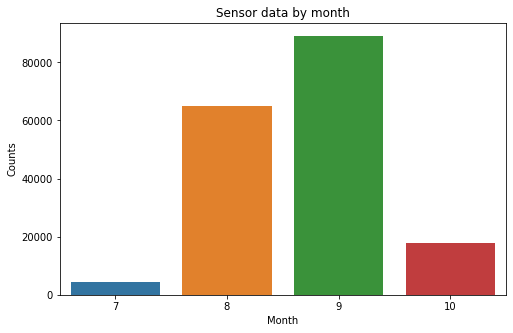

In [161]:
# Plot sensor data by month. Sensor data acquisition spreads from July to October
plt.figure(figsize=(8,5))
sns.countplot(merged_data_drop['Month'])
plt.title('Sensor data by month')
plt.ylabel('Counts')
plt.xlabel('Month');

Text(0.5, 1.0, 'Maximum Daily Values for c15a6370 Sensor')

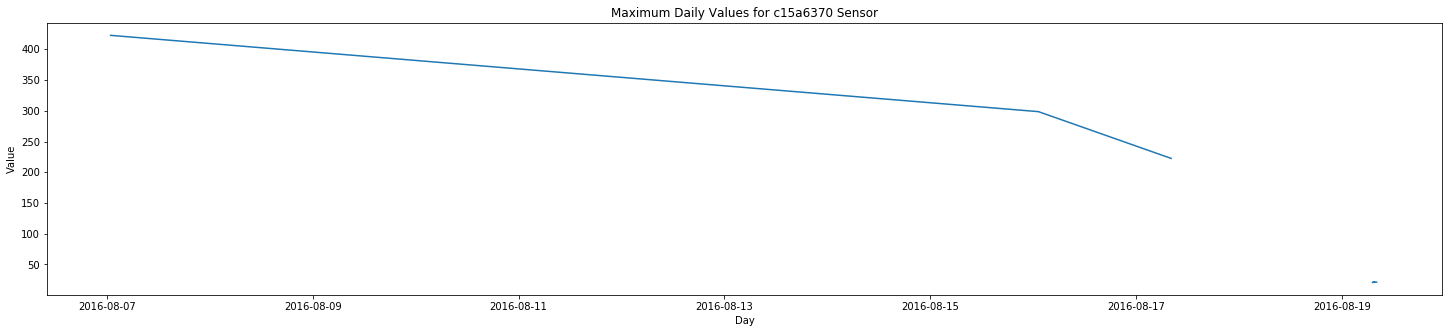

In [19]:
sensor1 = getgroup('c15a6370-8679-11e6-a353-2f6c041e2491')
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor1.index, y=sensor1.value)
plt.title('Maximum Daily Values for c15a6370 Sensor')

Text(0.5, 1.0, 'Maximum Daily Values for c15a6370 Sensor in August')

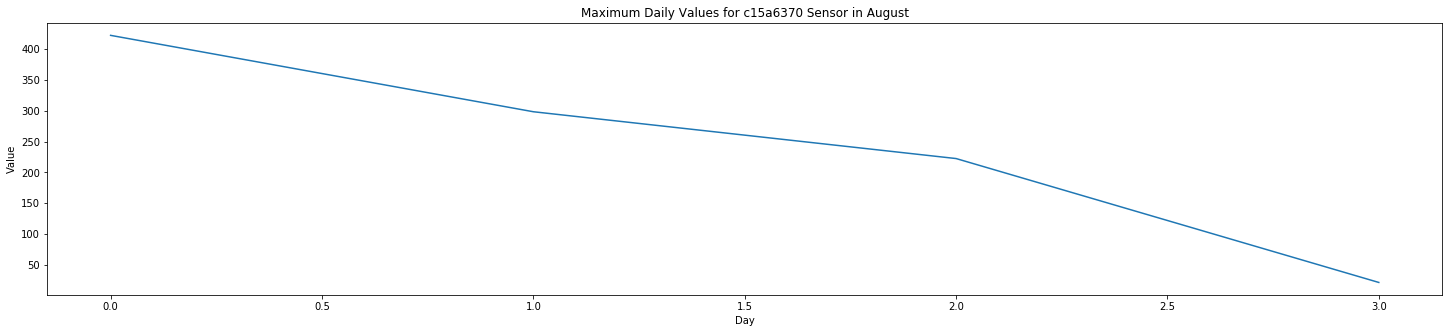

In [21]:
# Sensor 1 plot -  Data only available in August
sensor1 = getgroup('c15a6370-8679-11e6-a353-2f6c041e2491')
sensor1aug = groupget(sensor1,8)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor1aug.index, y=sensor1aug.value)
plt.title('Maximum Daily Values for c15a6370 Sensor in August')


Text(0.5, 1.0, 'Maximum Daily Values for 7635c920 Sensor in September')

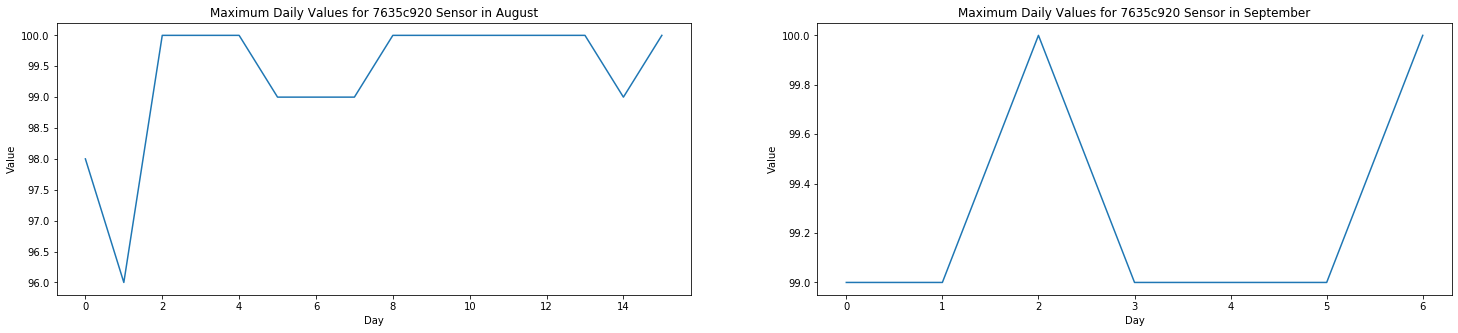

In [22]:
# Sensor 2 plot -  Data only available in August and September
sensor2 = getgroup('7635c920-8679-11e6-a353-2f6c041e2491')
sensor2aug = groupget(sensor2,8)
sensor2sep = groupget(sensor2,9)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor2aug.index, y=sensor2aug.value)
plt.title('Maximum Daily Values for 7635c920 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor2sep.index, y=sensor2sep.value)
plt.title('Maximum Daily Values for 7635c920 Sensor in September')


Text(0.5, 1.0, 'Maximum Daily Values for 763b9580 Sensor in September')

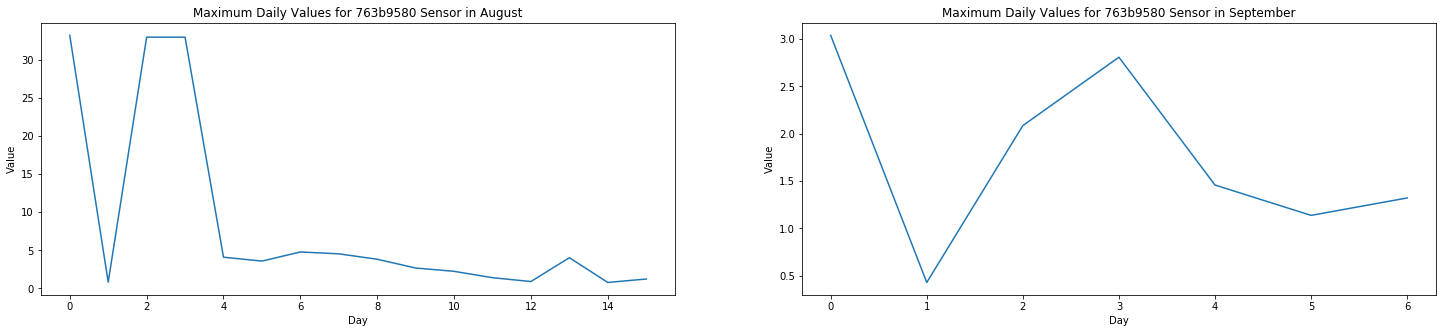

In [23]:
# Sensor 3 plot -  Data only available in August and September
sensor3 = getgroup('763b9580-8679-11e6-a353-2f6c041e2491')
#sensor3jul = groupget(sensor3,7)
sensor3aug = groupget(sensor3,8)
sensor3sep = groupget(sensor3,9)
#sensor3oct = groupget(sensor3,10)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor3aug.index, y=sensor3aug.value)
plt.title('Maximum Daily Values for 763b9580 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor3sep.index, y=sensor3sep.value)
plt.title('Maximum Daily Values for 763b9580 Sensor in September')

Text(0.5, 1.0, 'Maximum Daily Values for 763ca6f0 Sensor in September')

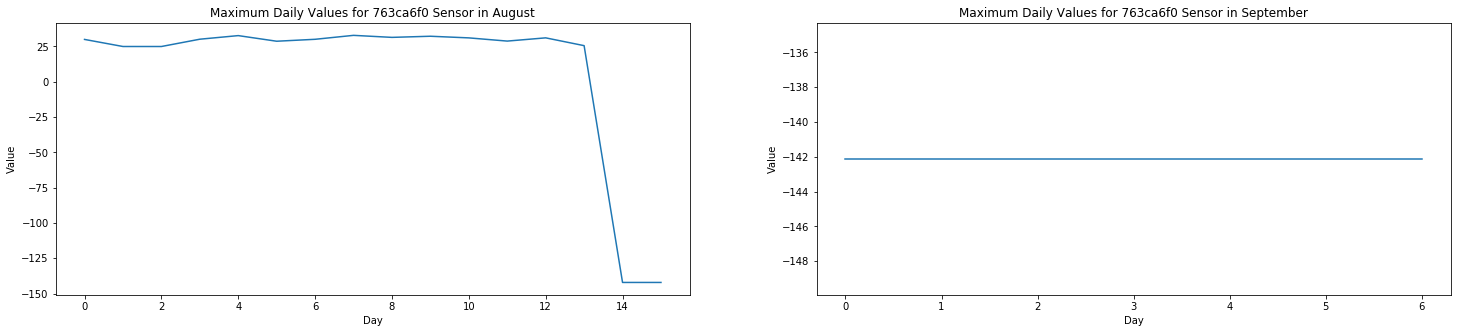

In [24]:
# Sensor 4 plot -  Data only available in August and September
sensor4 = getgroup('763ca6f0-8679-11e6-a353-2f6c041e2491')
#sensor4jul = groupget(sensor4,7)
sensor4aug = groupget(sensor4,8)
sensor4sep = groupget(sensor4,9)
#sensor4oct = groupget(sensor4,10)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor4aug.index, y=sensor4aug.value)
plt.title('Maximum Daily Values for 763ca6f0 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor4sep.index, y=sensor4sep.value)
plt.title('Maximum Daily Values for 763ca6f0 Sensor in September')

Text(0.5, 1.0, 'Maximum Daily Values for 763d9150 Sensor in September')

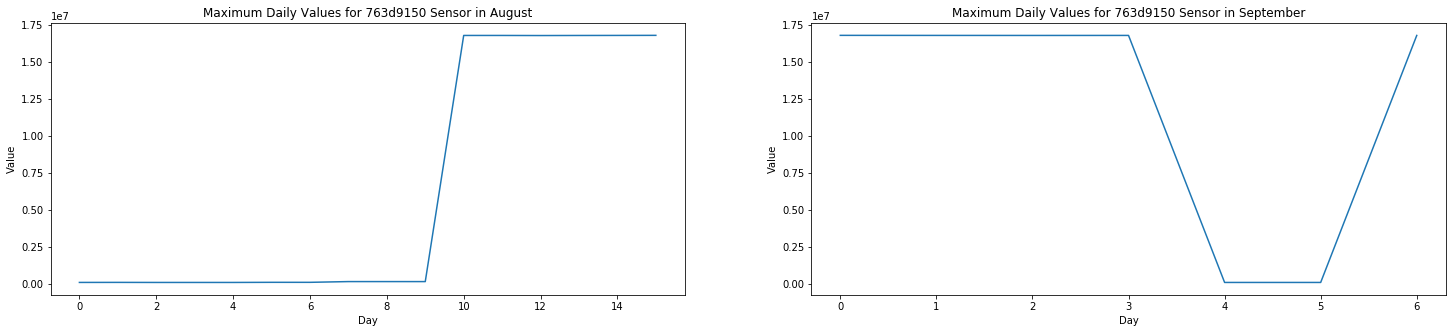

In [25]:
# Sensor 5 plot -  Data only available in August and September
sensor5 = getgroup('763d9150-8679-11e6-a353-2f6c041e2491')
#sensor5jul = groupget(sensor5,7)
sensor5aug = groupget(sensor5,8)
sensor5sep = groupget(sensor5,9)
#sensor5oct = groupget(sensor5,10)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor5aug.index, y=sensor5aug.value)
plt.title('Maximum Daily Values for 763d9150 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor5sep.index, y=sensor5sep.value)
plt.title('Maximum Daily Values for 763d9150 Sensor in September')

Text(0.5, 1.0, 'Maximum Daily Values for 7636da90 Sensor in October')

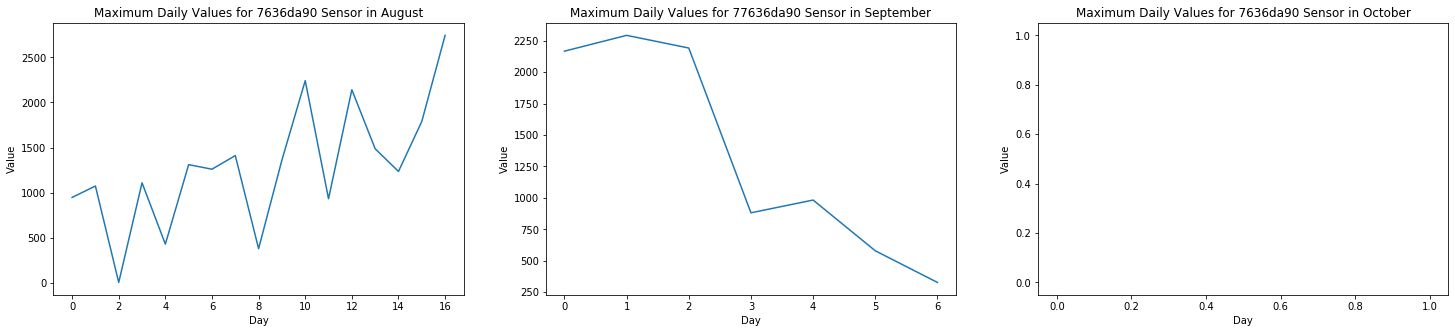

In [26]:
# Sensor 6 plot -  Data only available in August and September. October data is null
sensor6 = getgroup('7636da90-8679-11e6-a353-2f6c041e2491')
#sensor6jul = groupget(sensor6,7)
sensor6aug = groupget(sensor6,8)
sensor6sep = groupget(sensor6,9)
sensor6oct = groupget(sensor6,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor6aug.index, y=sensor6aug.value)
plt.title('Maximum Daily Values for 7636da90 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor6sep.index, y=sensor6sep.value)
plt.title('Maximum Daily Values for 77636da90 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor6oct.index, y=sensor6oct.value)
plt.title('Maximum Daily Values for 7636da90 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for 76413ad0 Sensor in September')

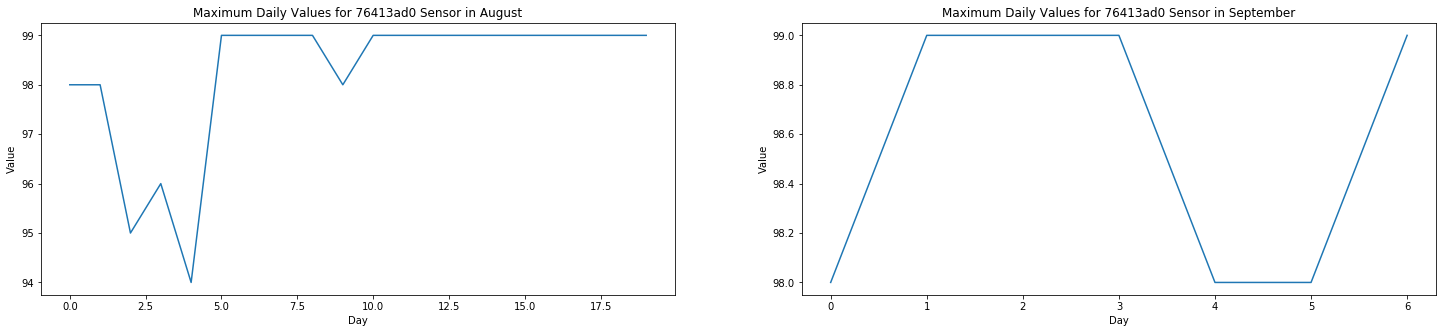

In [27]:
# Sensor 7 plot -  Data only available in August and September
sensor7 = getgroup('76413ad0-8679-11e6-a353-2f6c041e2491')
#sensor7jul = groupget(sensor7,7)
sensor7aug = groupget(sensor7,8)
sensor7sep = groupget(sensor7,9)
#sensor7oct = groupget(sensor7,10)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor7aug.index, y=sensor7aug.value)
plt.title('Maximum Daily Values for 76413ad0 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor7sep.index, y=sensor7sep.value)
plt.title('Maximum Daily Values for 76413ad0 Sensor in September')

Text(0.5, 1.0, 'Maximum Daily Values for 764161e0 Sensor in September')

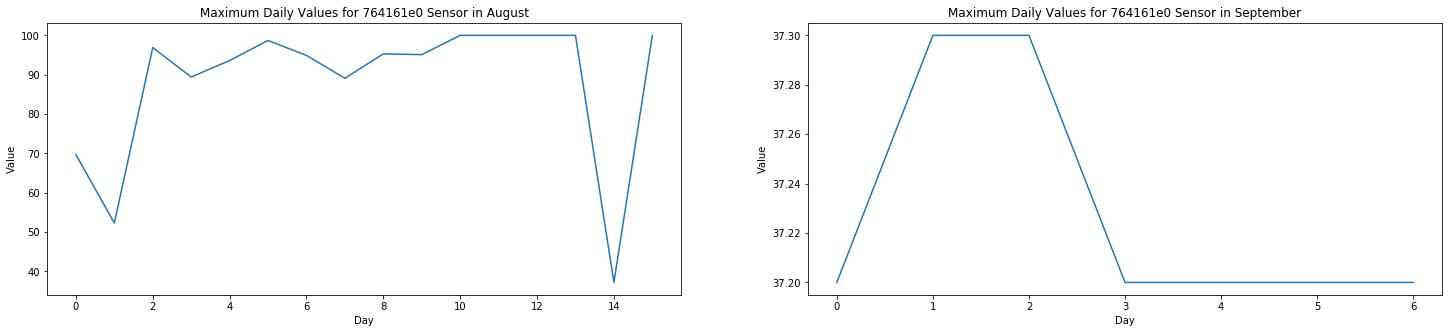

In [28]:
# Sensor 8 plot -  Data only available in August and September
sensor8 = getgroup('764161e0-8679-11e6-a353-2f6c041e2491')
#sensor8jul = groupget(sensor8,7)
sensor8aug = groupget(sensor8,8)
sensor8sep = groupget(sensor8,9)
#sensor8oct = groupget(sensor8,10)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor8aug.index, y=sensor8aug.value)
plt.title('Maximum Daily Values for 764161e0 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor8sep.index, y=sensor8sep.value)
plt.title('Maximum Daily Values for 764161e0 Sensor in September')


Text(0.5, 1.0, 'Maximum Daily Values for c5e685d0 Sensor in August')

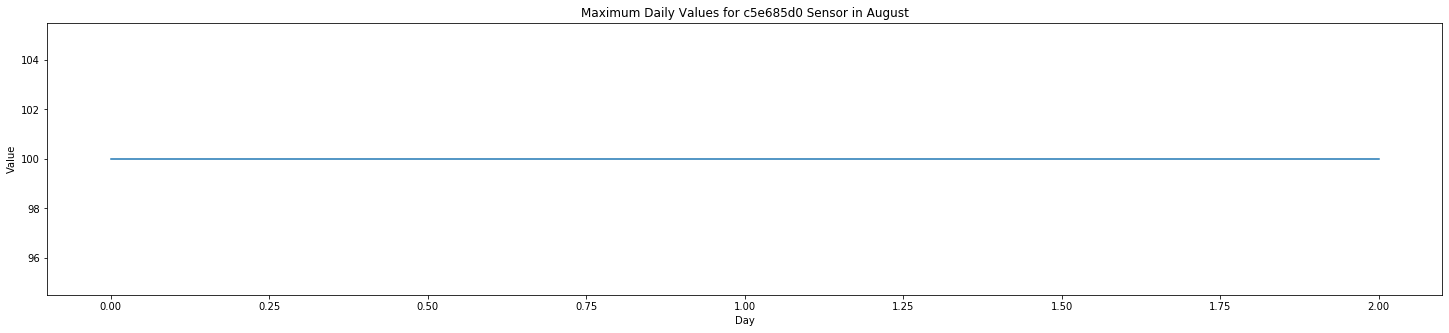

In [29]:
# Sensor 9 plot -  Data only available in August
sensor9 = getgroup('c5e685d0-867a-11e6-a353-2f6c041e2491')
#sensor9jul = groupget(sensor9,7)
sensor9aug = groupget(sensor9,8)
#sensor9sep = groupget(sensor9,9)
#sensor9oct = groupget(sensor9,10)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor9aug.index, y=sensor9aug.value)
plt.title('Maximum Daily Values for c5e685d0 Sensor in August')


Text(0.5, 1.0, 'Maximum Daily Values for c5e9ba20 Sensor in August')

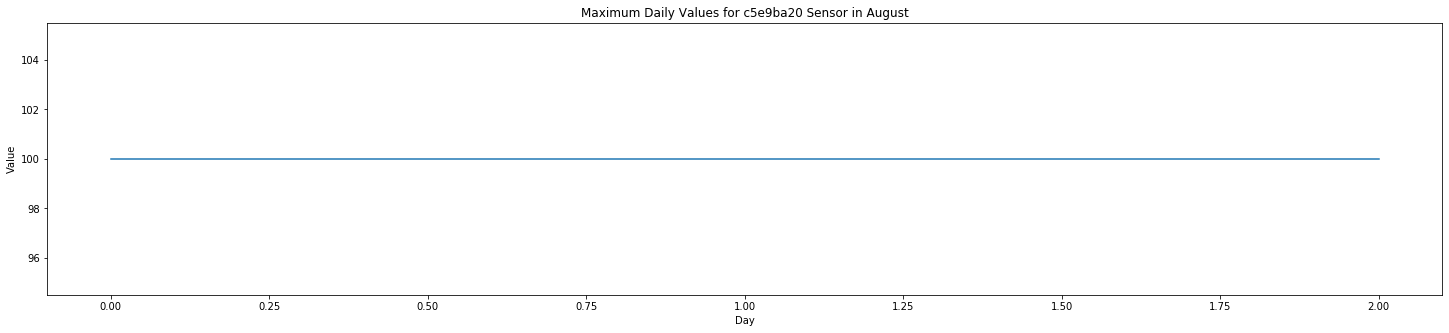

In [30]:
# Sensor 10 plot -  Data only available in August
sensor10 = getgroup('c5e9ba20-867a-11e6-a353-2f6c041e2491')
#sensor10jul = groupget(sensor10,7)
sensor10aug = groupget(sensor10,8)
#sensor10sep = groupget(sensor10,9)
#sensor10oct = groupget(sensor10,10)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor10aug.index, y=sensor10aug.value)
plt.title('Maximum Daily Values for c5e9ba20 Sensor in August')

Text(0.5, 1.0, 'Maximum Daily Values for c159c730 Sensor in August')

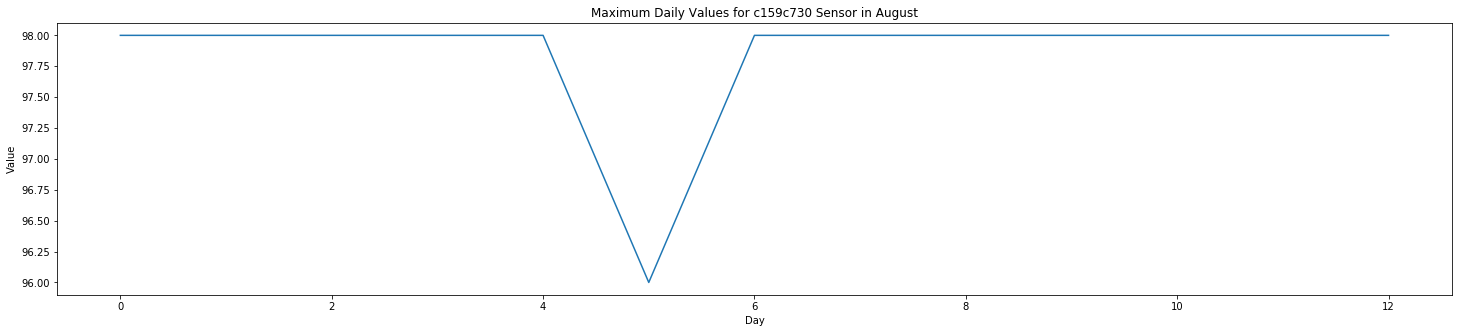

In [31]:
# Sensor 11 plot -  Data only available in August 
sensor11 = getgroup('c159c730-8679-11e6-a353-2f6c041e2491')
#sensor11jul = groupget(sensor11,7)
sensor11aug = groupget(sensor11,8)
#sensor11sep = groupget(sensor11,9)
#sensor11oct = groupget(sensor11,10)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor11aug.index, y=sensor11aug.value)
plt.title('Maximum Daily Values for c159c730 Sensor in August')

Text(0.5, 1.0, 'Maximum Daily Values for c159ee40 Sensor in August')

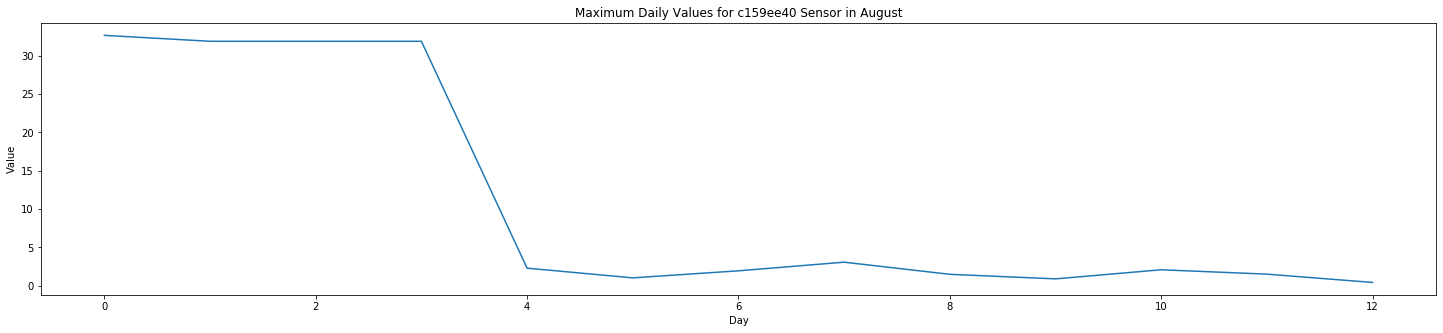

In [32]:
# Sensor 12 plot -  Data only available in August
sensor12 = getgroup('c159ee40-8679-11e6-a353-2f6c041e2491')
#sensor12jul = groupget(sensor12,7)
sensor12aug = groupget(sensor12,8)
#sensor12sep = groupget(sensor12,9)
#sensor12oct = groupget(sensor12,10)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor12aug.index, y=sensor12aug.value)
plt.title('Maximum Daily Values for c159ee40 Sensor in August')

Text(0.5, 1.0, 'Maximum Daily Values for c15a6371 Sensor in August')

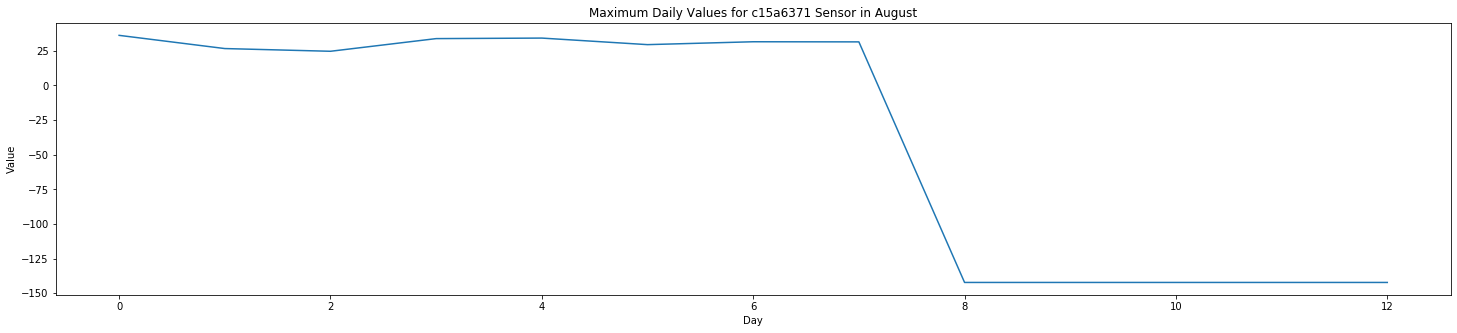

In [33]:
# Sensor 13 plot -  Data only available in August 
sensor13 = getgroup('c15a6371-8679-11e6-a353-2f6c041e2491')
#sensor13jul = groupget(sensor13,7)
sensor13aug = groupget(sensor13,8)
#sensor13sep = groupget(sensor13,9)
#sensor13oct = groupget(sensor13,10)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor13aug.index, y=sensor13aug.value)
plt.title('Maximum Daily Values for c15a6371 Sensor in August')

Text(0.5, 1.0, 'Maximum Daily Values for c15a6372 Sensor in August')

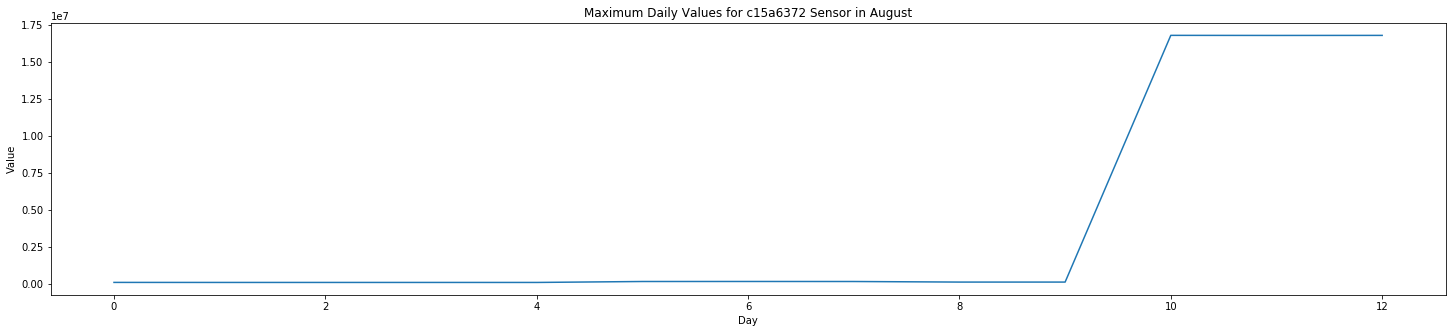

In [34]:
# Sensor 14 plot -  Data only available in August 
sensor14 = getgroup('c15a6372-8679-11e6-a353-2f6c041e2491')
#sensor14jul = groupget(sensor14,7)
sensor14aug = groupget(sensor14,8)
#sensor14sep = groupget(sensor14,9)
#sensor14oct = groupget(sensor14,10)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor14aug.index, y=sensor14aug.value)
plt.title('Maximum Daily Values for c15a6372 Sensor in August')

Text(0.5, 1.0, 'Maximum Daily Values for c15c5f40 Sensor in August')

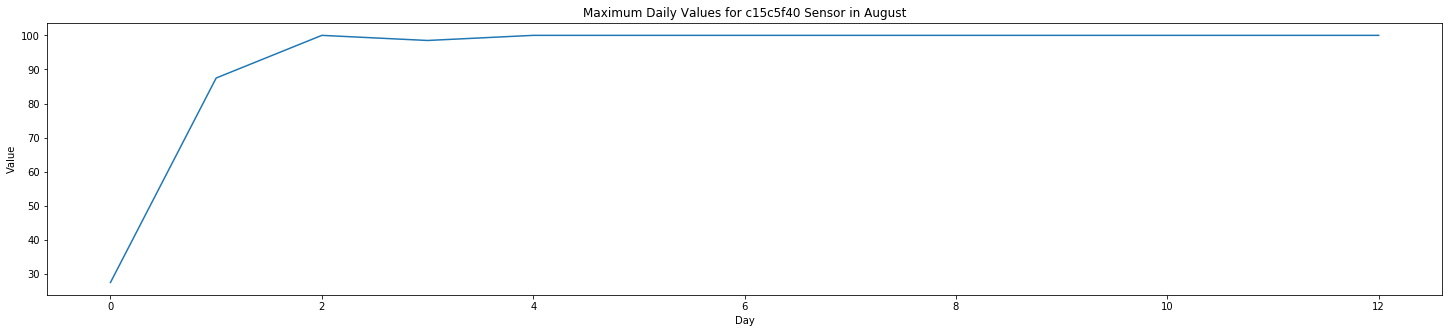

In [35]:
# Sensor 15 plot -  Data only available in August 
sensor15 = getgroup('c15c5f40-8679-11e6-a353-2f6c041e2491')
#sensor15jul = groupget(sensor15,7)
sensor15aug = groupget(sensor15,8)
#sensor15sep = groupget(sensor15,9)
#sensor15oct = groupget(sensor15,10)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor15aug.index, y=sensor15aug.value)
plt.title('Maximum Daily Values for c15c5f40 Sensor in August')

Text(0.5, 1.0, 'Maximum Daily Values for c15ef750 Sensor in August')

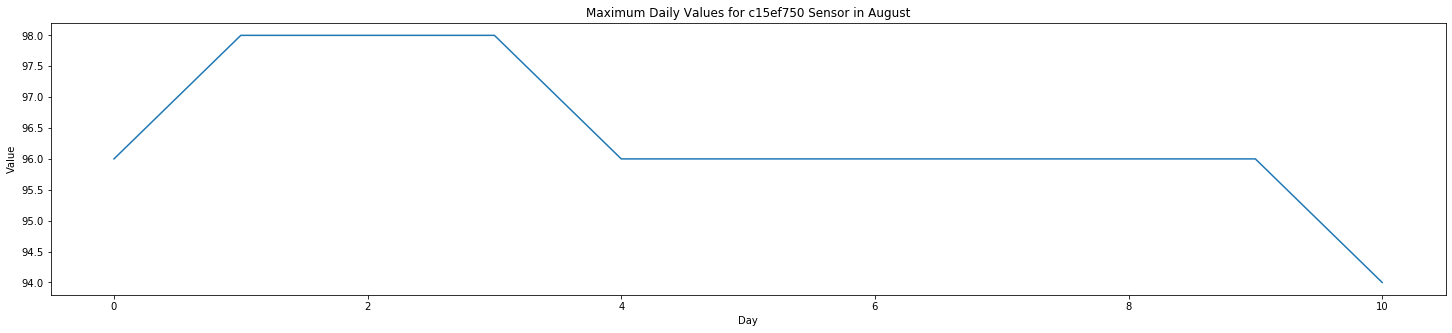

In [36]:
# Sensor 16 plot -  Data only available in August 
sensor16 = getgroup('c15ef750-8679-11e6-a353-2f6c041e2491')
#sensor16jul = groupget(sensor16,7)
sensor16aug = groupget(sensor16,8)
#sensor16sep = groupget(sensor16,9)
#sensor16oct = groupget(sensor16,10)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor16aug.index, y=sensor16aug.value)
plt.title('Maximum Daily Values for c15ef750 Sensor in August')

Text(0.5, 1.0, 'Maximum Daily Values for 76427350 Sensor in September')

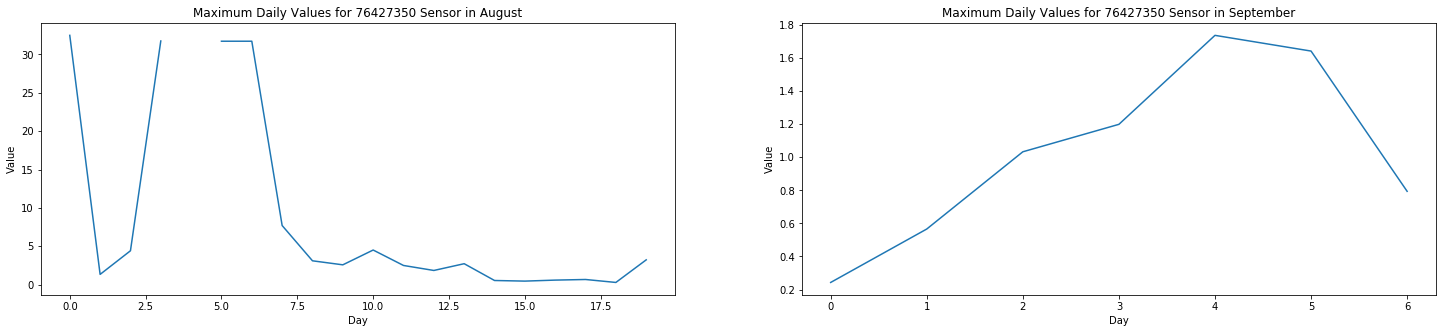

In [37]:
# Sensor 17 plot -  Data only available in August and September
sensor17 = getgroup('76427350-8679-11e6-a353-2f6c041e2491')
#sensor17jul = groupget(sensor17,7)
sensor17aug = groupget(sensor17,8)
sensor17sep = groupget(sensor17,9)
#sensor17oct = groupget(sensor17,10)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor17aug.index, y=sensor17aug.value)
plt.title('Maximum Daily Values for 76427350 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor17sep.index, y=sensor17sep.value)
plt.title('Maximum Daily Values for 76427350 Sensor in September')

Text(0.5, 1.0, 'Maximum Daily Values for 76427351 Sensor in September')

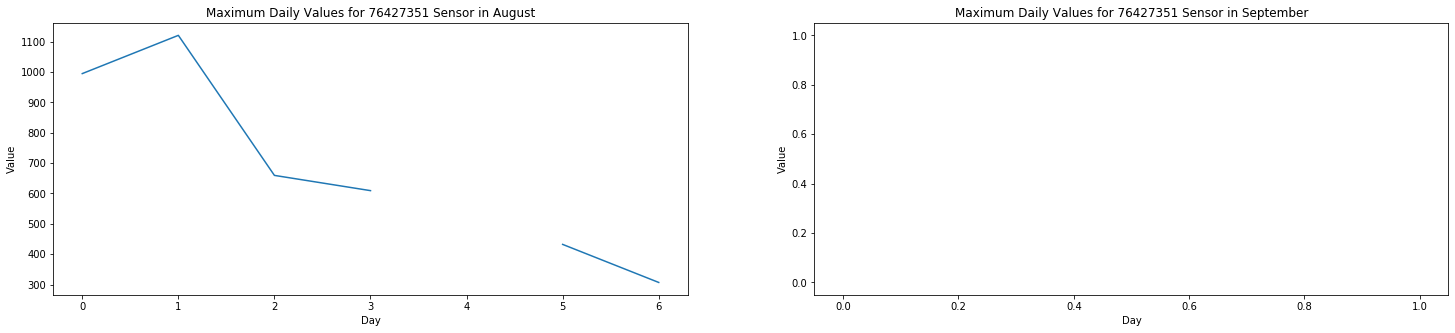

In [38]:
# Sensor 18 plot -  Data only available in August and September is empty
sensor18 = getgroup('76427351-8679-11e6-a353-2f6c041e2491')
#sensor18jul = groupget(sensor18,7)
sensor18aug = groupget(sensor18,8)
sensor18sep = groupget(sensor18,9)
#sensor18oct = groupget(sensor18,10)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor18aug.index, y=sensor18aug.value)
plt.title('Maximum Daily Values for 76427351 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor18sep.index, y=sensor18sep.value)
plt.title('Maximum Daily Values for 76427351 Sensor in September')

Text(0.5, 1.0, 'Maximum Daily Values for 76427351 Sensor in September')

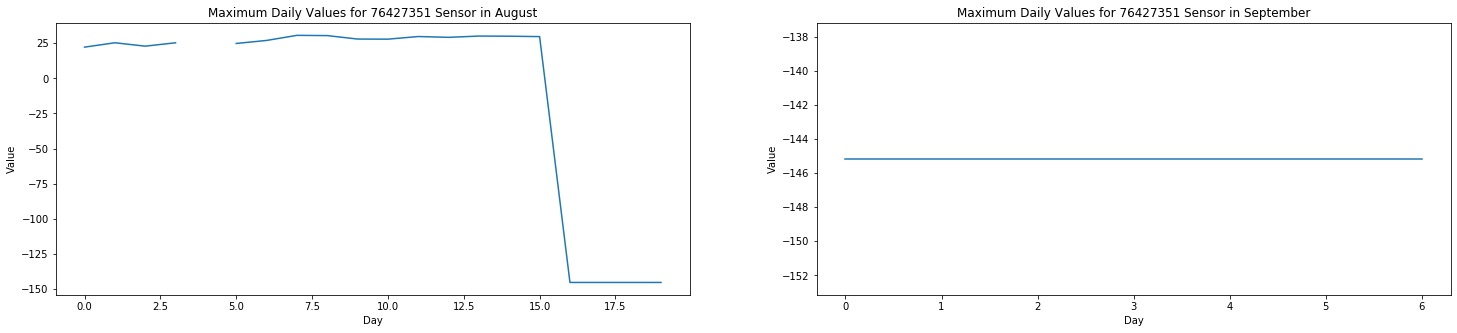

In [39]:
# Sensor 19 plot -  Data only available in August and September
sensor19 = getgroup('7644bd40-8679-11e6-a353-2f6c041e2491')
#sensor19jul = groupget(sensor18,7)
sensor19aug = groupget(sensor19,8)
sensor19sep = groupget(sensor19,9)
#sensor19oct = groupget(sensor18,10)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor19aug.index, y=sensor19aug.value)
plt.title('Maximum Daily Values for 76427351 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor19sep.index, y=sensor19sep.value)
plt.title('Maximum Daily Values for 76427351 Sensor in September')

Text(0.5, 1.0, 'Maximum Daily Values for 7645ceb0 Sensor in September')

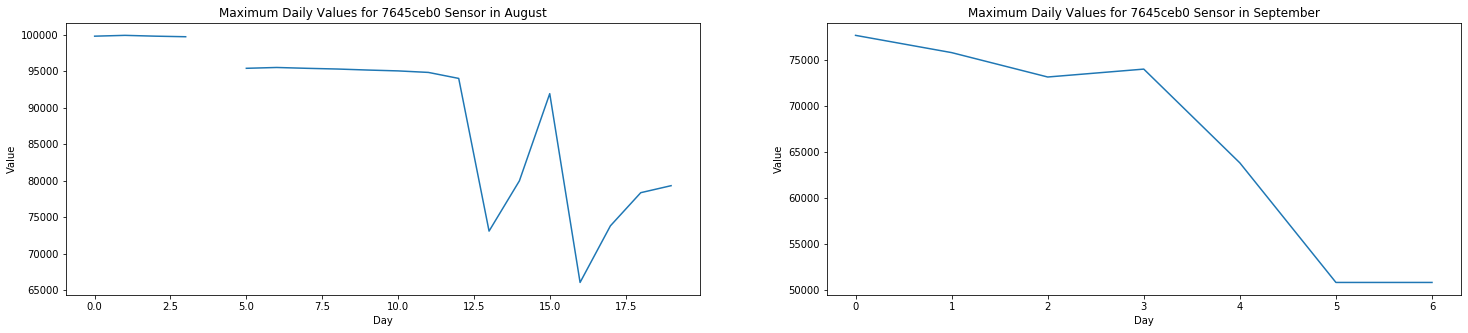

In [40]:
# Sensor 20 plot -  Data only available in August and September
sensor20 = getgroup('7645ceb0-8679-11e6-a353-2f6c041e2491')
#sensor20jul = groupget(sensor20,7)
sensor20aug = groupget(sensor20,8)
sensor20sep = groupget(sensor20,9)
#sensor20oct = groupget(sensor20,10)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor20aug.index, y=sensor20aug.value)
plt.title('Maximum Daily Values for 7645ceb0 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor20sep.index, y=sensor20sep.value)
plt.title('Maximum Daily Values for 7645ceb0 Sensor in September')

Text(0.5, 1.0, 'Maximum Daily Values for 7645ceb1 Sensor in September')

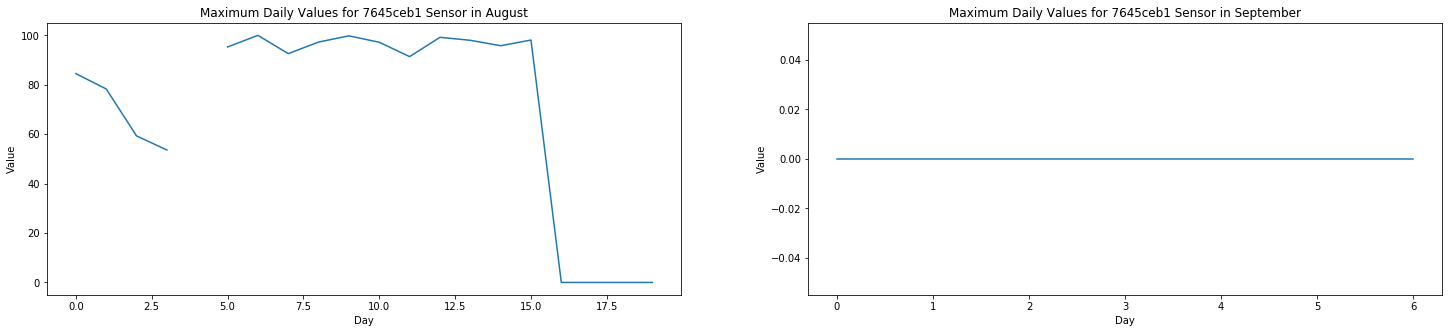

In [41]:
# Sensor 21 plot -  Data only available in August and September
sensor21 = getgroup('7645ceb1-8679-11e6-a353-2f6c041e2491')
#sensor20jul = groupget(sensor20,7)
sensor21aug = groupget(sensor21,8)
sensor21sep = groupget(sensor21,9)
#sensor20oct = groupget(sensor20,10)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor21aug.index, y=sensor21aug.value)
plt.title('Maximum Daily Values for 7645ceb1 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor21sep.index, y=sensor21sep.value)
plt.title('Maximum Daily Values for 7645ceb1 Sensor in September')

Text(0.5, 1.0, 'Maximum Daily Values for 763701a1 Sensor in September')

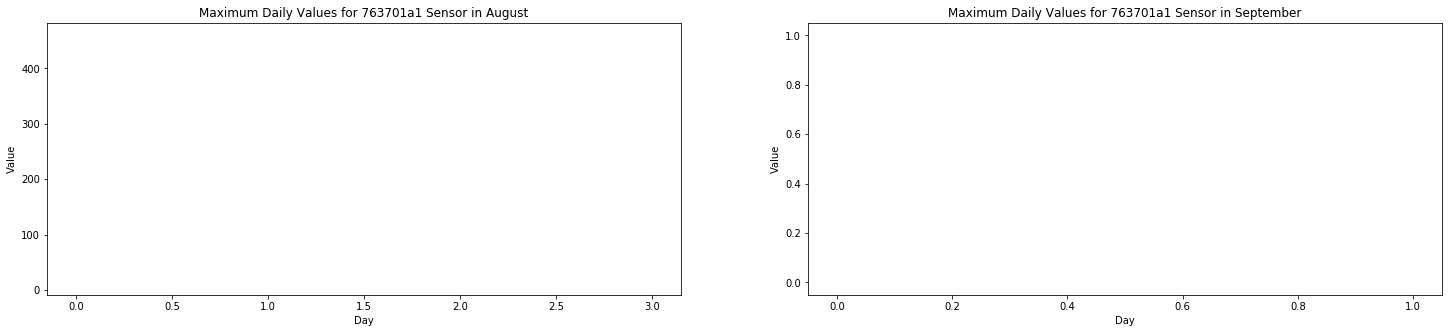

In [42]:
# Sensor 22 plot -  Empty data for this sensor
sensor22 = getgroup('763701a1-8679-11e6-a353-2f6c041e2491')
#sensor22jul = groupget(sensor22,7)
sensor22aug = groupget(sensor22,8)
sensor22sep = groupget(sensor22,9)
#sensor22oct = groupget(sensor22,10)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor22aug.index, y=sensor22aug.value)
plt.title('Maximum Daily Values for 763701a1 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor22sep.index, y=sensor22sep.value)
plt.title('Maximum Daily Values for 763701a1 Sensor in September')

Text(0.5, 1.0, 'Maximum Daily Values for c15f9391 Sensor in August')

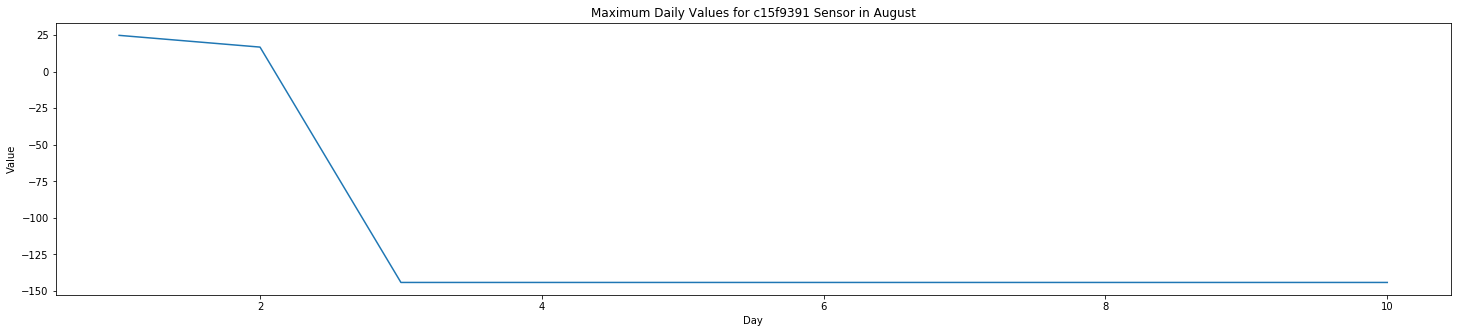

In [43]:
# Sensor 23 plot -  Data only available in August 
sensor23 = getgroup('c15f9391-8679-11e6-a353-2f6c041e2491')
#sensor22jul = groupget(sensor22,7)
sensor23aug = groupget(sensor23,8)
#sensor23sep = groupget(sensor23,9)
#sensor22oct = groupget(sensor22,10)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor23aug.index, y=sensor23aug.value)
plt.title('Maximum Daily Values for c15f9391 Sensor in August')


Text(0.5, 1.0, 'Maximum Daily Values for c162c7e0 Sensor in August')

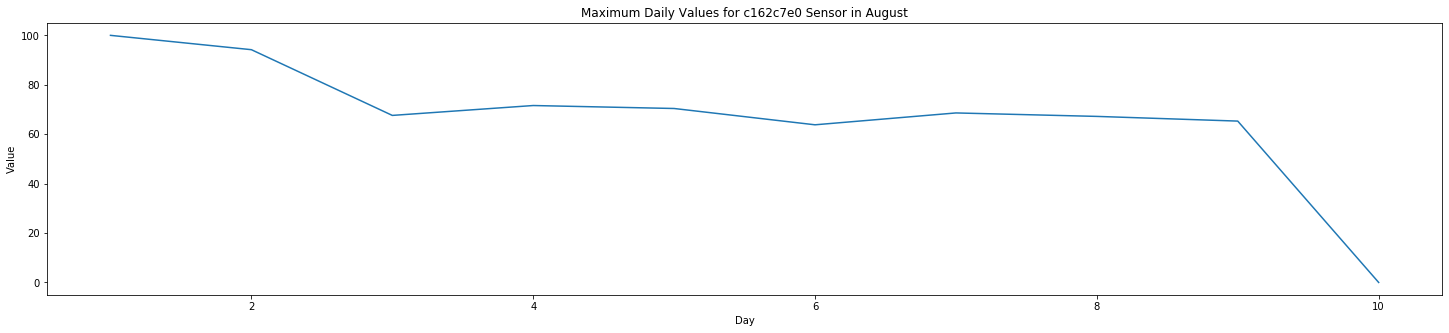

In [44]:
# Sensor 24 plot -  Data only available in August
sensor24 = getgroup('c162c7e0-8679-11e6-a353-2f6c041e2491')
#sensor24jul = groupget(sensor24,7)
sensor24aug = groupget(sensor24,8)
#sensor24sep = groupget(sensor24,9)
#sensor24oct = groupget(sensor24,10)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor24aug.index, y=sensor24aug.value)
plt.title('Maximum Daily Values for c162c7e0 Sensor in August')

Text(0.5, 1.0, 'Maximum Daily Values for c15f9390 Sensor in August')

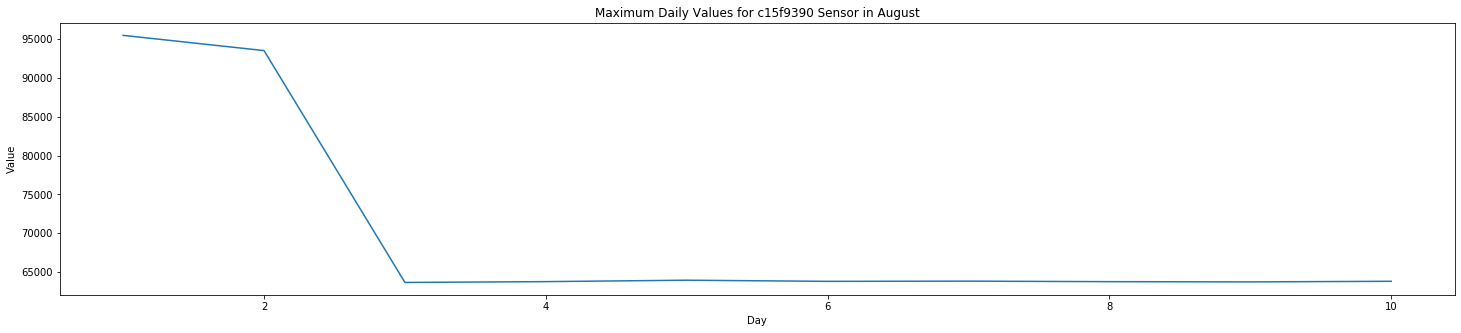

In [45]:
# Sensor 2 plot -  Data only available in August
sensor25 = getgroup('c15f9390-8679-11e6-a353-2f6c041e2491')
#sensor25jul = groupget(sensor25,7)
sensor25aug = groupget(sensor25,8)
#sensor24sep = groupget(sensor24,9)
#sensor24oct = groupget(sensor24,10)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor25aug.index, y=sensor25aug.value)
plt.title('Maximum Daily Values for c15f9390 Sensor in August')

Text(0.5, 1.0, 'Maximum Daily Values for c15fbaa0 Sensor in August')

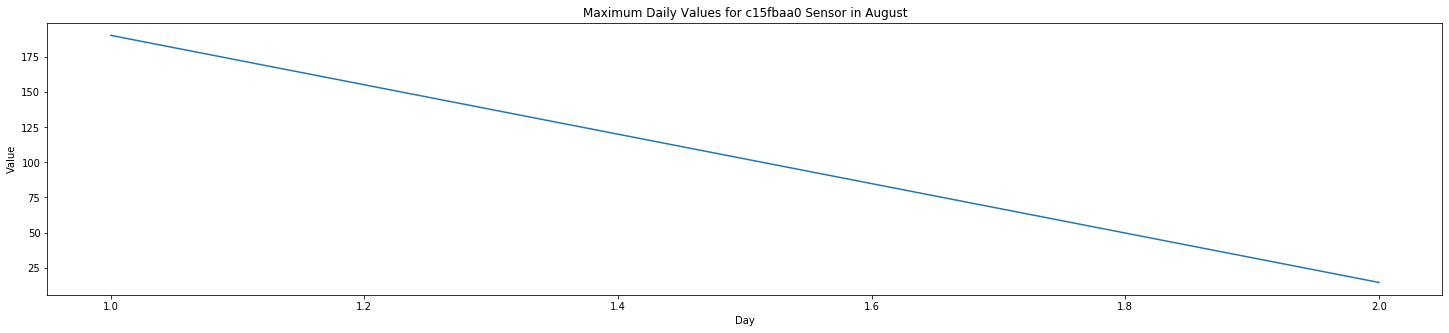

In [46]:
# Sensor 26 plot -  Data only available in August
sensor26 = getgroup('c15fbaa0-8679-11e6-a353-2f6c041e2491')
#sensor26jul = groupget(sensor26,7)
sensor26aug = groupget(sensor26,8)
#sensor26sep = groupget(sensor26,9)
#sensor26oct = groupget(sensor26,10)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor26aug.index, y=sensor26aug.value)
plt.title('Maximum Daily Values for c15fbaa0 Sensor in August')


Text(0.5, 1.0, 'Maximum Daily Values for c15fbaa1 Sensor in August')

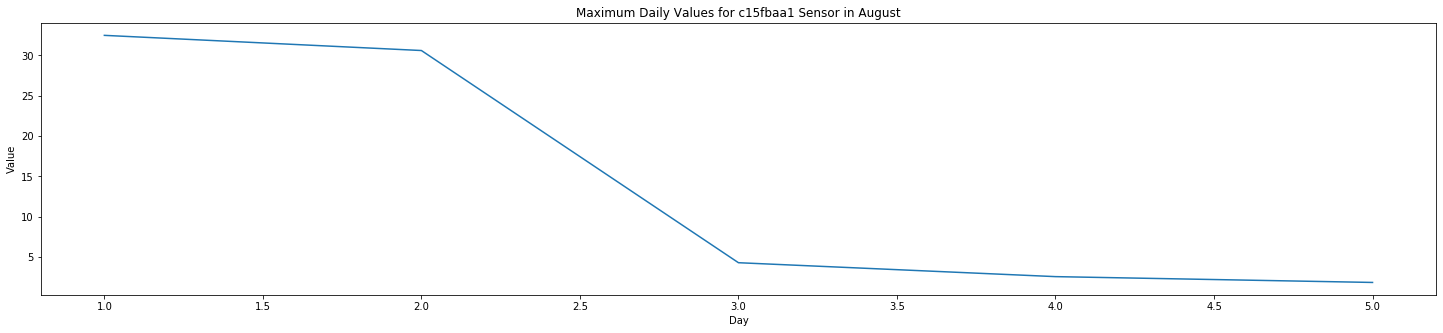

In [47]:
# Sensor 27 plot -  Data only available in August
sensor27 = getgroup('c15fbaa1-8679-11e6-a353-2f6c041e2491')
#sensor27jul = groupget(sensor26,7)
sensor27aug = groupget(sensor27,8)
#sensor27sep = groupget(sensor27,9)
#sensor27oct = groupget(sensor27,10)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor27aug.index, y=sensor27aug.value)
plt.title('Maximum Daily Values for c15fbaa1 Sensor in August')

Text(0.5, 1.0, 'Maximum Daily Values for 763701a0 Sensor in October')

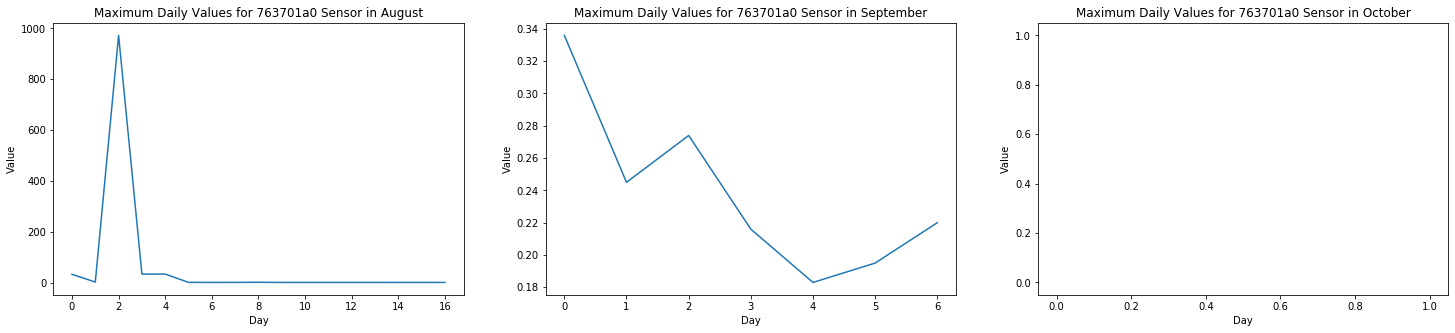

In [48]:
# Sensor 28 plot -  Data only available in August and September, empty data in october
sensor28 = getgroup('763701a0-8679-11e6-a353-2f6c041e2491')
#sensor5jul = groupget(sensor5,7)
sensor28aug = groupget(sensor28,8)
sensor28sep = groupget(sensor28,9)
sensor28oct = groupget(sensor28,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor28aug.index, y=sensor28aug.value)
plt.title('Maximum Daily Values for 763701a0 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor28sep.index, y=sensor28sep.value)
plt.title('Maximum Daily Values for 763701a0 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor28oct.index, y=sensor28oct.value)
plt.title('Maximum Daily Values for 763701a0 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for d3cea980 Sensor in October')

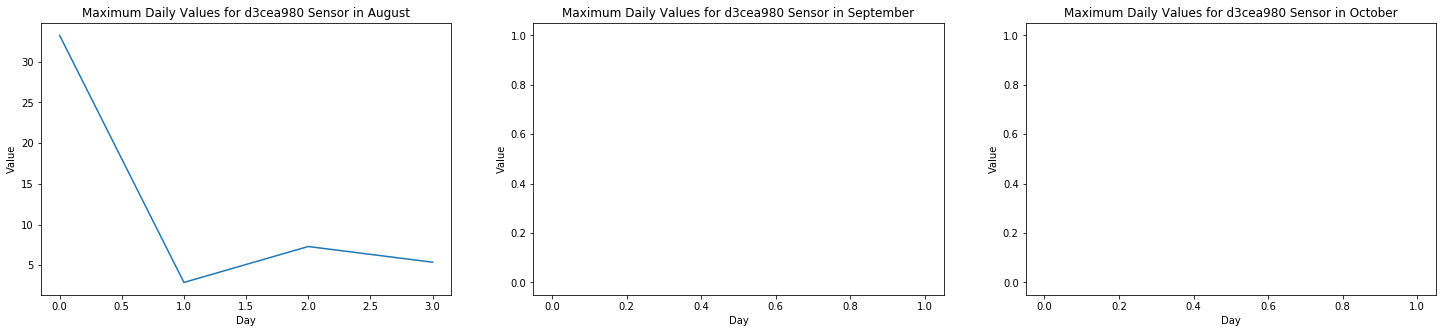

In [49]:
# Sensor 29 plot -  Data only available in August. Empty data in September and October
sensor29 = getgroup('d3cea980-8679-11e6-a353-2f6c041e2491')
#sensor29jul = groupget(sensor29,7)
sensor29aug = groupget(sensor29,8)
sensor29sep = groupget(sensor29,9)
sensor29oct = groupget(sensor29,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor29aug.index, y=sensor29aug.value)
plt.title('Maximum Daily Values for d3cea980 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor29sep.index, y=sensor29sep.value)
plt.title('Maximum Daily Values for d3cea980 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor29oct.index, y=sensor29oct.value)
plt.title('Maximum Daily Values for d3cea980 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for 763bbc90 Sensor in October')

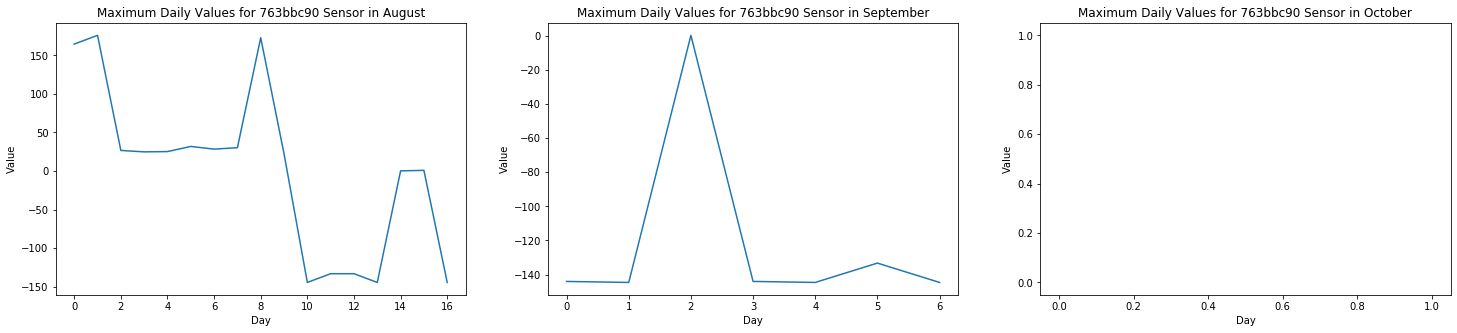

In [50]:
# Sensor 30 plot -  Data only available in August and September, October has empty values
sensor30 = getgroup('763bbc90-8679-11e6-a353-2f6c041e2491')
#sensor5jul = groupget(sensor5,7)
sensor30aug = groupget(sensor30,8)
sensor30sep = groupget(sensor30,9)
sensor30oct = groupget(sensor30,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor30aug.index, y=sensor30aug.value)
plt.title('Maximum Daily Values for 763bbc90 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor30sep.index, y=sensor30sep.value)
plt.title('Maximum Daily Values for 763bbc90 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor30oct.index, y=sensor30oct.value)
plt.title('Maximum Daily Values for 763bbc90 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for 763d6a40 Sensor in October')

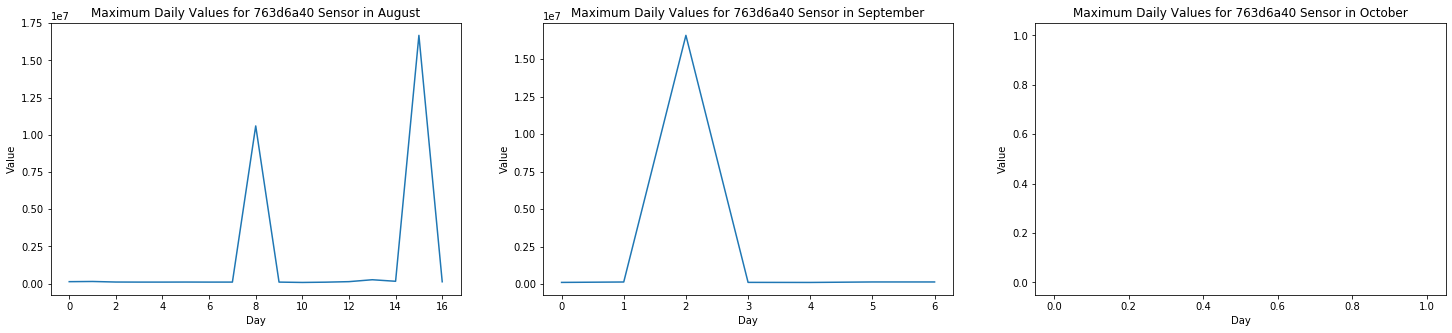

In [51]:
# Sensor 31 plot -  Data only available in August and September, October has empty values
sensor31 = getgroup('763d6a40-8679-11e6-a353-2f6c041e2491')
#sensor31jul = groupget(sensor31,7)
sensor31aug = groupget(sensor31,8)
sensor31sep = groupget(sensor31,9)
sensor31oct = groupget(sensor31,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor31aug.index, y=sensor31aug.value)
plt.title('Maximum Daily Values for 763d6a40 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor31sep.index, y=sensor31sep.value)
plt.title('Maximum Daily Values for 763d6a40 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor31oct.index, y=sensor31oct.value)
plt.title('Maximum Daily Values for 763d6a40 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for 76402960 Sensor in October')

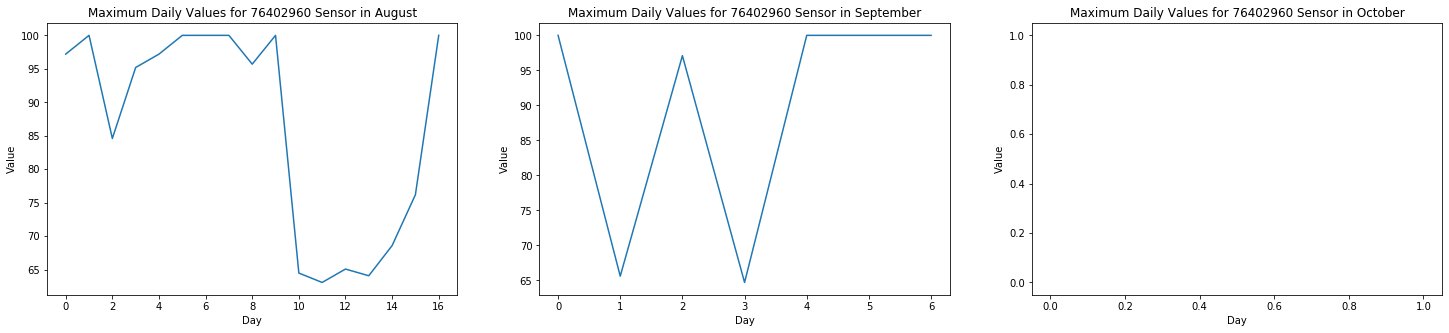

In [52]:
# Sensor 32 plot -  Data only available in August and September, October has empty values
sensor32 = getgroup('76402960-8679-11e6-a353-2f6c041e2491')
#sensor31jul = groupget(sensor31,7)
sensor32aug = groupget(sensor32,8)
sensor32sep = groupget(sensor32,9)
sensor32oct = groupget(sensor32,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor32aug.index, y=sensor32aug.value)
plt.title('Maximum Daily Values for 76402960 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor32sep.index, y=sensor32sep.value)
plt.title('Maximum Daily Values for 76402960 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor32oct.index, y=sensor32oct.value)
plt.title('Maximum Daily Values for 76402960 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for d3cf6cd0 Sensor in October')

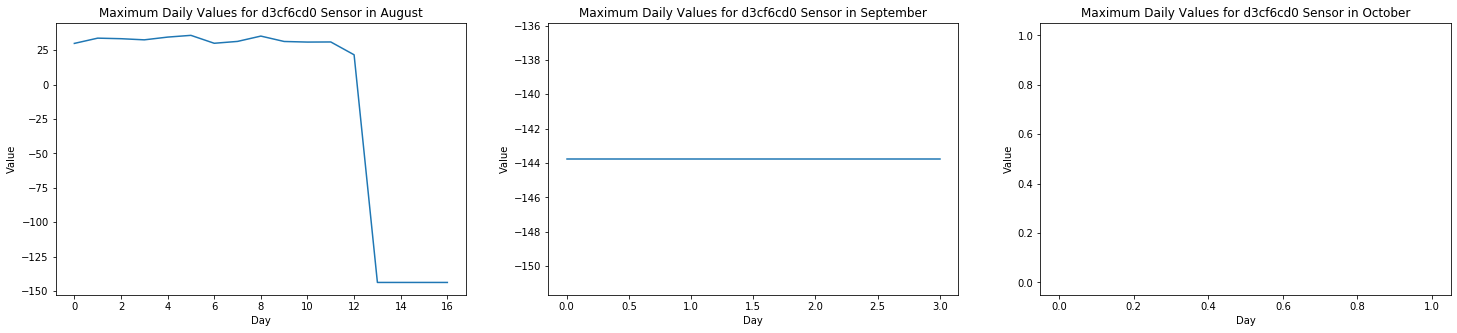

In [53]:
# Sensor 33 plot -  Data only available in August and September, October has empty values
sensor33 = getgroup('d3cf6cd0-8679-11e6-a353-2f6c041e2491')
#sensor33jul = groupget(sensor33,7)
sensor33aug = groupget(sensor33,8)
sensor33sep = groupget(sensor33,9)
sensor33oct = groupget(sensor33,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor33aug.index, y=sensor33aug.value)
plt.title('Maximum Daily Values for d3cf6cd0 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor33sep.index, y=sensor33sep.value)
plt.title('Maximum Daily Values for d3cf6cd0 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor33oct.index, y=sensor33oct.value)
plt.title('Maximum Daily Values for d3cf6cd0 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for d3cd7100 Sensor in October')

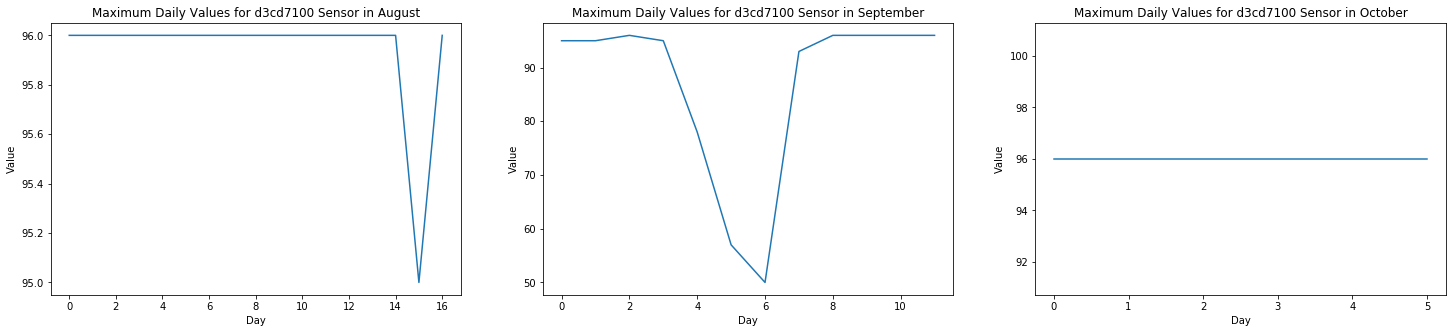

In [54]:
# Sensor 34 plot -  Data only available in August,September and October
sensor34 = getgroup('d3cd7100-8679-11e6-a353-2f6c041e2491')
#sensor34jul = groupget(sensor34,7)
sensor34aug = groupget(sensor34,8)
sensor34sep = groupget(sensor34,9)
sensor34oct = groupget(sensor34,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor34aug.index, y=sensor34aug.value)
plt.title('Maximum Daily Values for d3cd7100 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor34sep.index, y=sensor34sep.value)
plt.title('Maximum Daily Values for d3cd7100 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor34oct.index, y=sensor34oct.value)
plt.title('Maximum Daily Values for d3cd7100 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for 7635f030 Sensor in September')

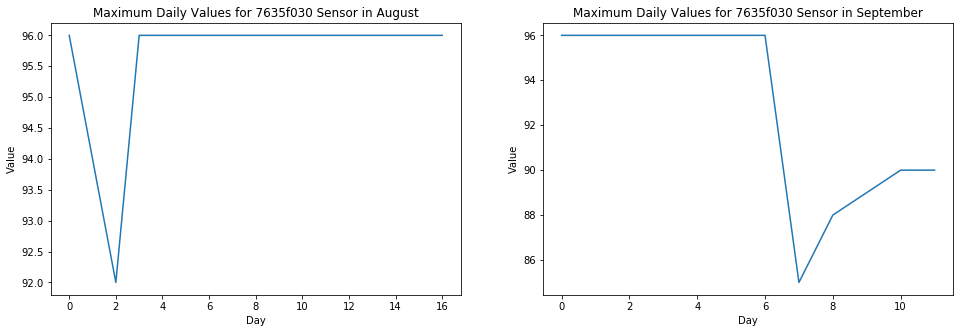

In [55]:
# Sensor 35 plot -  Data only available in August and September
sensor35 = getgroup('7635f030-8679-11e6-a353-2f6c041e2491')
#sensor3jul = groupget(sensor3,7)
sensor35aug = groupget(sensor35,8)
sensor35sep = groupget(sensor35,9)
plt.figure(figsize=(25,5))
# plt.subplot(1,3,2)
# custom_plot(x=sensor3jul.index, y=sensor3jul.value)
# plt.title('Maximum Daily Values for 7635c920 Sensor in September')
plt.subplot(1,3,1)
custom_plot(x=sensor35aug.index, y=sensor35aug.value)
plt.title('Maximum Daily Values for 7635f030 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor35sep.index, y=sensor35sep.value)
plt.title('Maximum Daily Values for 7635f030 Sensor in September')


Text(0.5, 1.0, 'Maximum Daily Values for c5e80c70 Sensor in August')

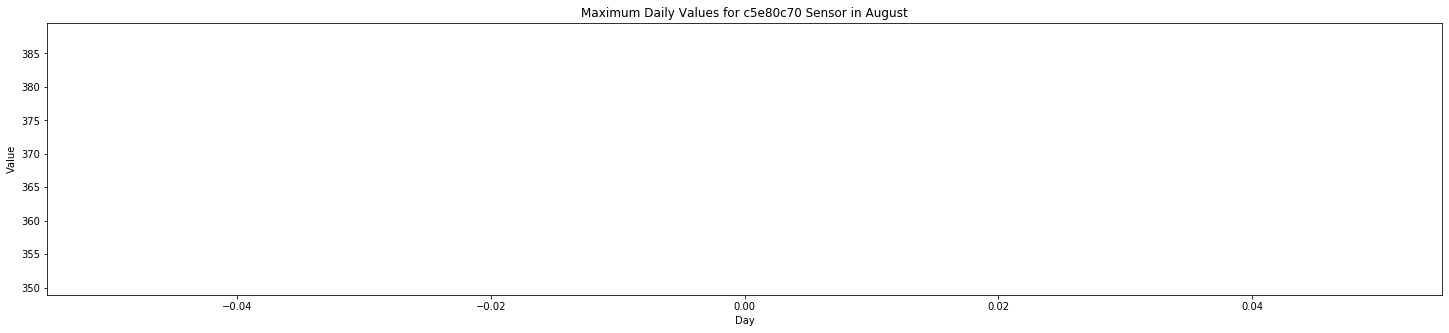

In [56]:
# Sensor 36 plot -  Empty values in August 
sensor36 = getgroup('c5e80c70-867a-11e6-a353-2f6c041e2491')
#sensor5jul = groupget(sensor5,7)
sensor36aug = groupget(sensor36,8)
#sensor36sep = groupget(sensor36,9)
#sensor36oct = groupget(sensor36,10)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor36aug.index, y=sensor36aug.value)
plt.title('Maximum Daily Values for c5e80c70 Sensor in August')


Text(0.5, 1.0, 'Maximum Daily Values for d3d909c1 Sensor in October')

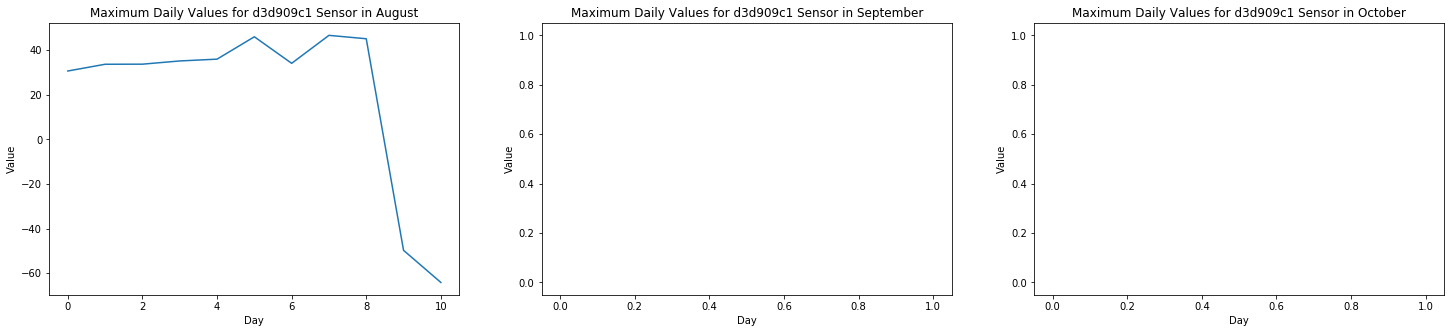

In [57]:
# Sensor 37 plot -  Data only available in August. Empty values in September and October
sensor37 = getgroup('d3d909c1-8679-11e6-a353-2f6c041e2491')
#sensor37jul = groupget(sensor37,7)
sensor37aug = groupget(sensor37,8)
sensor37sep = groupget(sensor37,9)
sensor37oct = groupget(sensor37,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor37aug.index, y=sensor37aug.value)
plt.title('Maximum Daily Values for d3d909c1 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor37sep.index, y=sensor37sep.value)
plt.title('Maximum Daily Values for d3d909c1 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor37oct.index, y=sensor37oct.value)
plt.title('Maximum Daily Values for d3d909c1 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for d3cf45c0 Sensor in October')

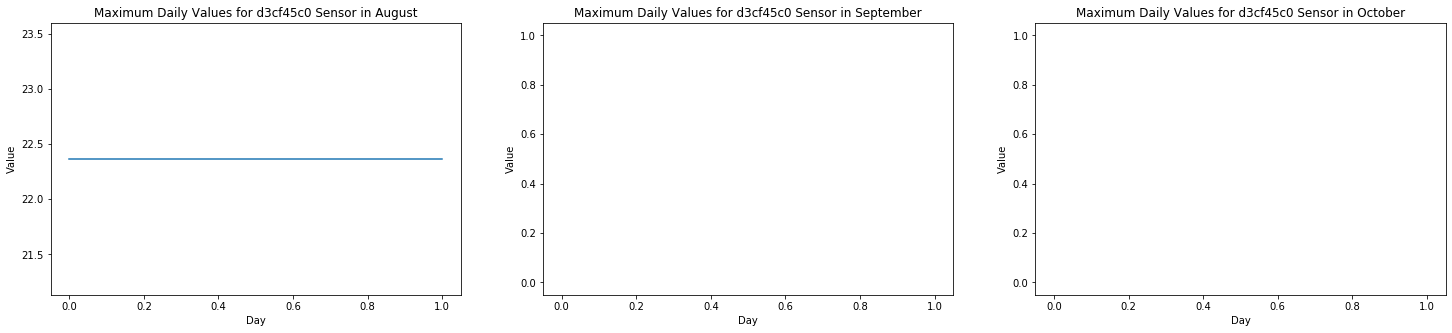

In [58]:
# Sensor 38 plot -  Data only available in August. Empty values in September and October
sensor38 = getgroup('d3cf45c0-8679-11e6-a353-2f6c041e2491')
#sensor37jul = groupget(sensor37,7)
sensor38aug = groupget(sensor38,8)
sensor38sep = groupget(sensor38,9)
sensor38oct = groupget(sensor38,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor38aug.index, y=sensor38aug.value)
plt.title('Maximum Daily Values for d3cf45c0 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor38sep.index, y=sensor38sep.value)
plt.title('Maximum Daily Values for d3cf45c0 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor38oct.index, y=sensor38oct.value)
plt.title('Maximum Daily Values for d3cf45c0 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for d3d0cc60 Sensor in October')

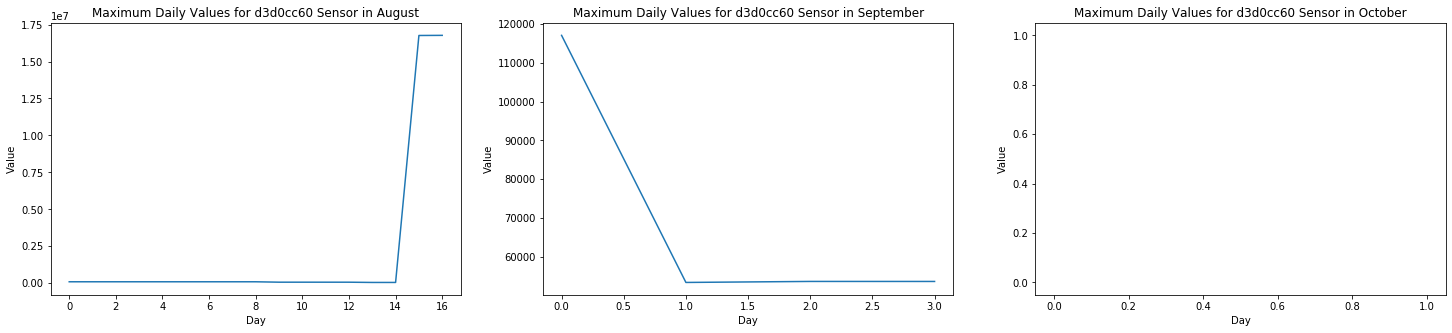

In [59]:
# Sensor 39 plot -  Data only available in August and September. Empty sensor values in October
sensor39 = getgroup('d3d0cc60-8679-11e6-a353-2f6c041e2491')
#sensor39jul = groupget(sensor39,7)
sensor39aug = groupget(sensor39,8)
sensor39sep = groupget(sensor39,9)
sensor39oct = groupget(sensor39,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor39aug.index, y=sensor39aug.value)
plt.title('Maximum Daily Values for d3d0cc60 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor39sep.index, y=sensor39sep.value)
plt.title('Maximum Daily Values for d3d0cc60 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor39oct.index, y=sensor39oct.value)
plt.title('Maximum Daily Values for d3d0cc60 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for d3d56040 Sensor in October')

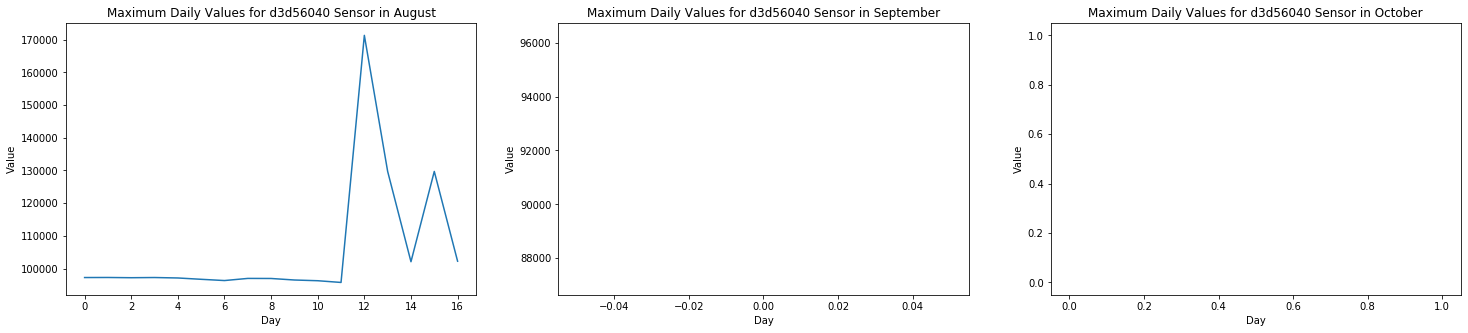

In [60]:
# Sensor 40 plot -  Data only available in August. Empty values in September and October
sensor40 = getgroup('d3d56040-8679-11e6-a353-2f6c041e2491')
#sensor39jul = groupget(sensor39,7)
sensor40aug = groupget(sensor40,8)
sensor40sep = groupget(sensor40,9)
sensor40oct = groupget(sensor40,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor40aug.index, y=sensor40aug.value)
plt.title('Maximum Daily Values for d3d56040 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor40sep.index, y=sensor40sep.value)
plt.title('Maximum Daily Values for d3d56040 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor40oct.index, y=sensor40oct.value)
plt.title('Maximum Daily Values for d3d56040 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for e66592c0 Sensor in September')

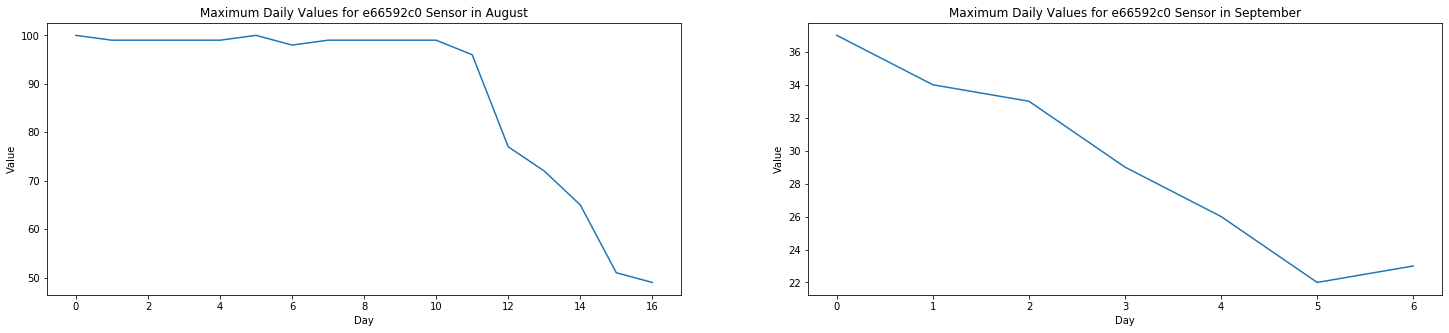

In [61]:
# Sensor 41 plot -  Data available in August and September
sensor41 = getgroup('e66592c0-8679-11e6-a353-2f6c041e2491')
#sensor39jul = groupget(sensor39,7)
sensor41aug = groupget(sensor41,8)
sensor41sep = groupget(sensor41,9)
#sensor41oct = groupget(sensor41,10)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor41aug.index, y=sensor41aug.value)
plt.title('Maximum Daily Values for e66592c0 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor41sep.index, y=sensor41sep.value)
plt.title('Maximum Daily Values for e66592c0 Sensor in September')


Text(0.5, 1.0, 'Maximum Daily Values for e6691530 Sensor in September')

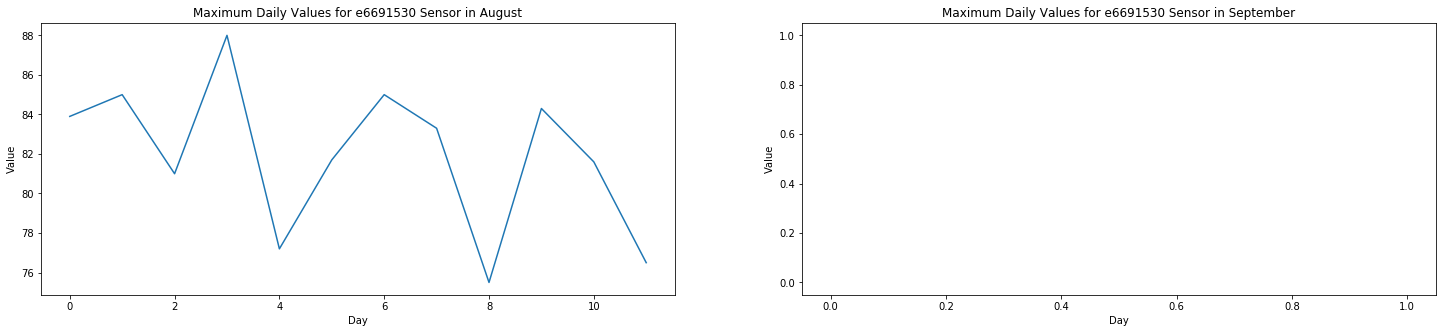

In [62]:
# Sensor 42 plot -  Data only available in August. Empty values in September
sensor42 = getgroup('e6691530-8679-11e6-a353-2f6c041e2491')
#sensor42jul = groupget(sensor42,7)
sensor42aug = groupget(sensor42,8)
sensor42sep = groupget(sensor42,9)
#sensor42oct = groupget(sensor42,10)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor42aug.index, y=sensor42aug.value)
plt.title('Maximum Daily Values for e6691530 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor42sep.index, y=sensor42sep.value)
plt.title('Maximum Daily Values for e6691530 Sensor in September')

Text(0.5, 1.0, 'Maximum Daily Values for d3d909c0 Sensor in October')

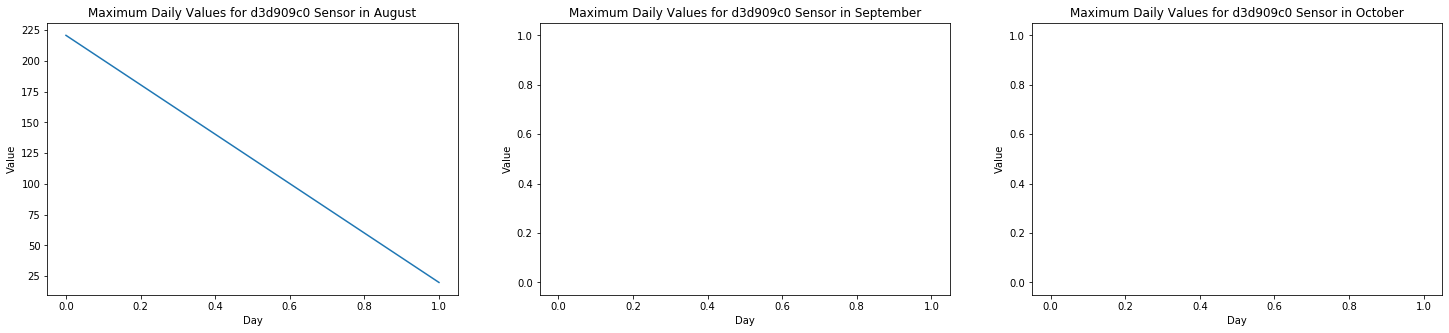

In [63]:
# Sensor 43 plot -  Data only available in August. Empty values in September and October
sensor43 = getgroup('d3d909c0-8679-11e6-a353-2f6c041e2491')
#sensor43jul = groupget(sensor43,7)
sensor43aug = groupget(sensor43,8)
sensor43sep = groupget(sensor43,9)
sensor43oct = groupget(sensor43,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor43aug.index, y=sensor43aug.value)
plt.title('Maximum Daily Values for d3d909c0 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor43sep.index, y=sensor43sep.value)
plt.title('Maximum Daily Values for d3d909c0 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor43oct.index, y=sensor43oct.value)
plt.title('Maximum Daily Values for d3d909c0 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for d3d168a0 Sensor in October')

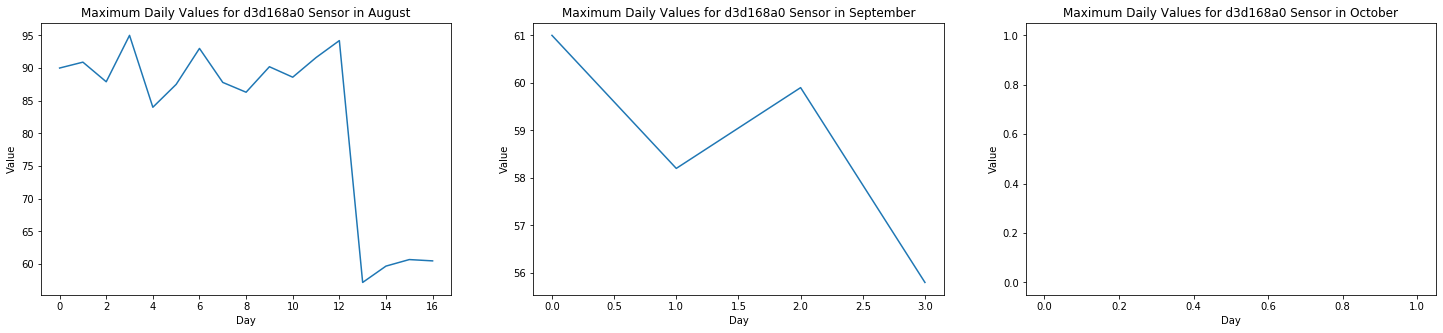

In [64]:
# Sensor 44 plot -  Data only available in August and September. Empty values in October
sensor44 = getgroup('d3d168a0-8679-11e6-a353-2f6c041e2491')
#sensor43jul = groupget(sensor43,7)
sensor44aug = groupget(sensor44,8)
sensor44sep = groupget(sensor44,9)
sensor44oct = groupget(sensor44,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor44aug.index, y=sensor44aug.value)
plt.title('Maximum Daily Values for d3d168a0 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor44sep.index, y=sensor44sep.value)
plt.title('Maximum Daily Values for d3d168a0 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor44oct.index, y=sensor44oct.value)
plt.title('Maximum Daily Values for d3d168a0 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for d3d53930 Sensor in October')

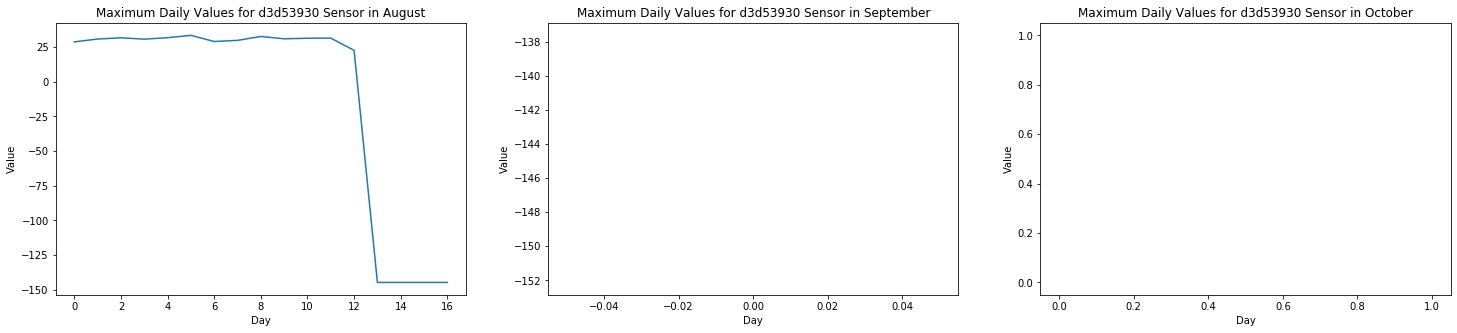

In [65]:
# Sensor 45 plot -  Data only available in August. Empty values in September and October
sensor45 = getgroup('d3d53930-8679-11e6-a353-2f6c041e2491')
#sensor43jul = groupget(sensor43,7)
sensor45aug = groupget(sensor45,8)
sensor45sep = groupget(sensor45,9)
sensor45oct = groupget(sensor45,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor45aug.index, y=sensor45aug.value)
plt.title('Maximum Daily Values for d3d53930 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor45sep.index, y=sensor45sep.value)
plt.title('Maximum Daily Values for d3d53930 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor45oct.index, y=sensor45oct.value)
plt.title('Maximum Daily Values for d3d53930 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for e66851e1 Sensor in September')

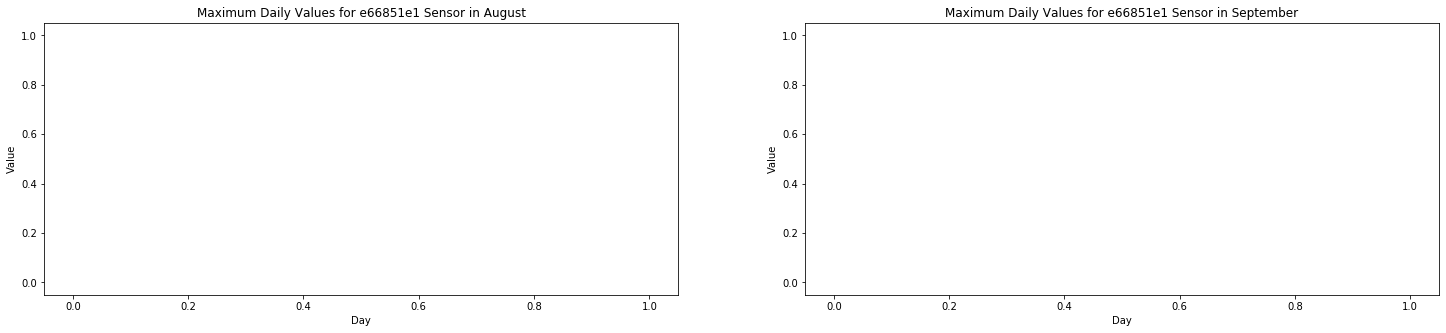

In [66]:
# Sensor 46 plot -  Empty values in August and September
sensor46 = getgroup('e66851e1-8679-11e6-a353-2f6c041e2491')
#sensor46jul = groupget(sensor46,7)
sensor46aug = groupget(sensor46,8)
sensor46sep = groupget(sensor46,9)
#sensor46oct = groupget(sensor46,10)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor46aug.index, y=sensor46aug.value)
plt.title('Maximum Daily Values for e66851e1 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor46sep.index, y=sensor46sep.value)
plt.title('Maximum Daily Values for e66851e1 Sensor in September')


Text(0.5, 1.0, 'Maximum Daily Values for c5e8a8b0 Sensor in August')

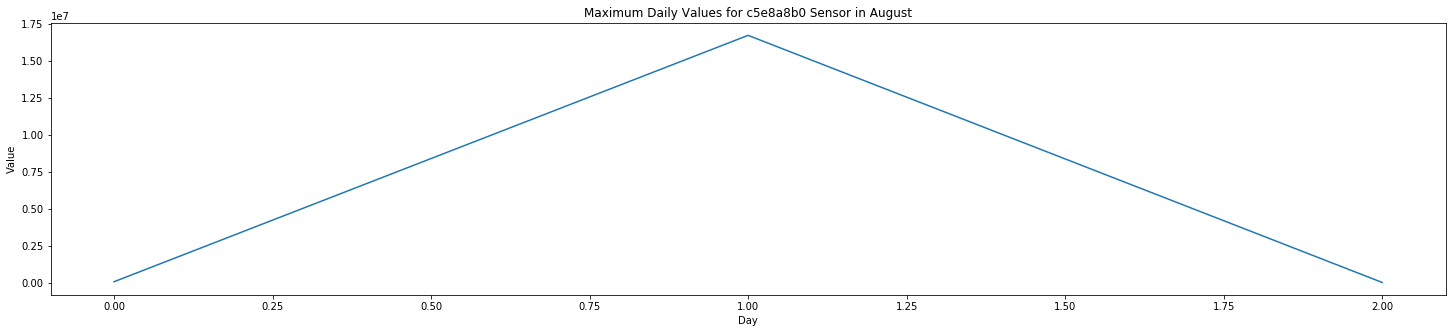

In [67]:
# Sensor 47 plot -  Data only available in August.
sensor47 = getgroup('c5e8a8b0-867a-11e6-a353-2f6c041e2491')
#sensor46jul = groupget(sensor46,7)
sensor47aug = groupget(sensor47,8)
#sensor47sep = groupget(sensor47,9)
#sensor47oct = groupget(sensor47,10)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor47aug.index, y=sensor47aug.value)
plt.title('Maximum Daily Values for c5e8a8b0 Sensor in August')

Text(0.5, 1.0, 'Maximum Daily Values for 1248ff60 Sensor in September')

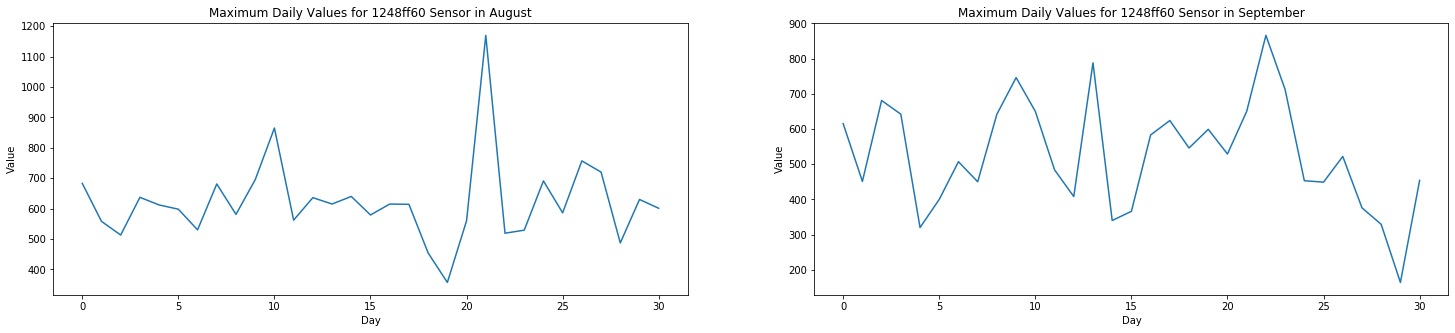

In [68]:
# Sensor 48 plot -  Complete data available in July and August.
sensor48 = getgroup('1248ff60-e707-11e6-89c8-314aa4f67f8c')
sensor48jul = groupget(sensor48,7)
sensor48aug = groupget(sensor48,8)
#sensor48sep = groupget(sensor48,9)
#sensor48oct = groupget(sensor48,10)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor48jul.index, y=sensor48jul.value)
plt.title('Maximum Daily Values for 1248ff60 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor48aug.index, y=sensor48aug.value)
plt.title('Maximum Daily Values for 1248ff60 Sensor in September')

Text(0.5, 1.0, 'Maximum Daily Values for e6678e90 Sensor in September')

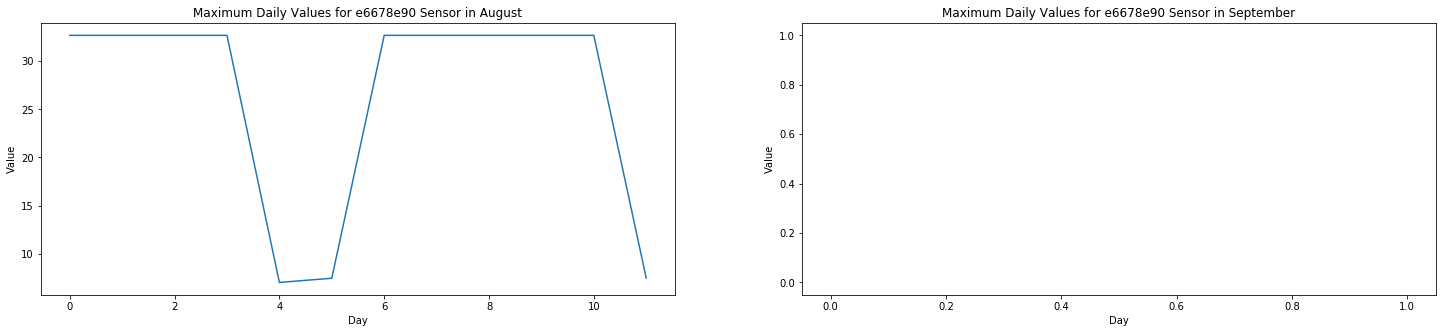

In [69]:
# Sensor 49 plot -  Data only available in August. Empty values in September
sensor49 = getgroup('e6678e90-8679-11e6-a353-2f6c041e2491')
#sensor46jul = groupget(sensor46,7)
sensor49aug = groupget(sensor49,8)
sensor49sep = groupget(sensor49,9)
#sensor49oct = groupget(sensor49,10)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor49aug.index, y=sensor49aug.value)
plt.title('Maximum Daily Values for e6678e90 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor49sep.index, y=sensor49sep.value)
plt.title('Maximum Daily Values for e6678e90 Sensor in September')

Text(0.5, 1.0, 'Maximum Daily Values for d3d698c0 Sensor in October')

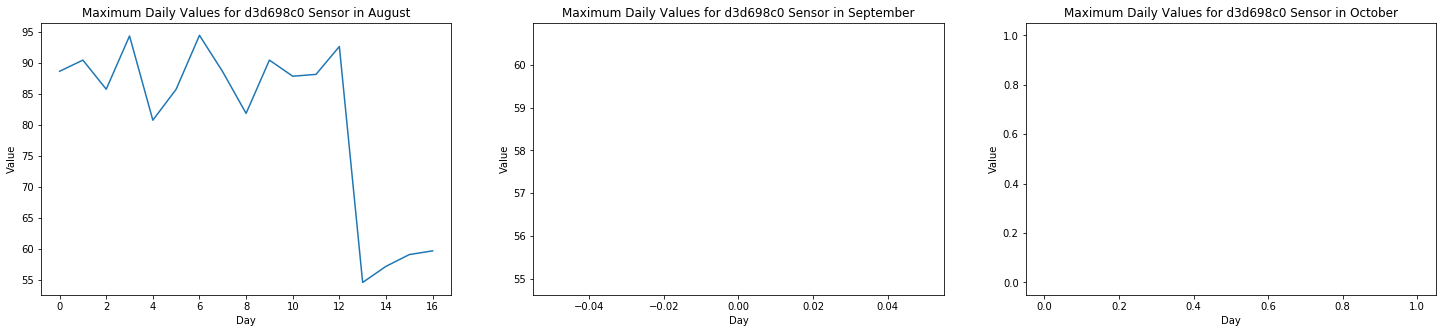

In [70]:
# Sensor 50 plot -  Data only available in August. Empty values in September and October
sensor50 = getgroup('d3d698c0-8679-11e6-a353-2f6c041e2491')
#sensor50jul = groupget(sensor50,7)
sensor50aug = groupget(sensor50,8)
sensor50sep = groupget(sensor50,9)
sensor50oct = groupget(sensor50,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor50aug.index, y=sensor50aug.value)
plt.title('Maximum Daily Values for d3d698c0 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor50sep.index, y=sensor50sep.value)
plt.title('Maximum Daily Values for d3d698c0 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor50oct.index, y=sensor50oct.value)
plt.title('Maximum Daily Values for d3d698c0 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for d3db2ca0- Sensor in October')

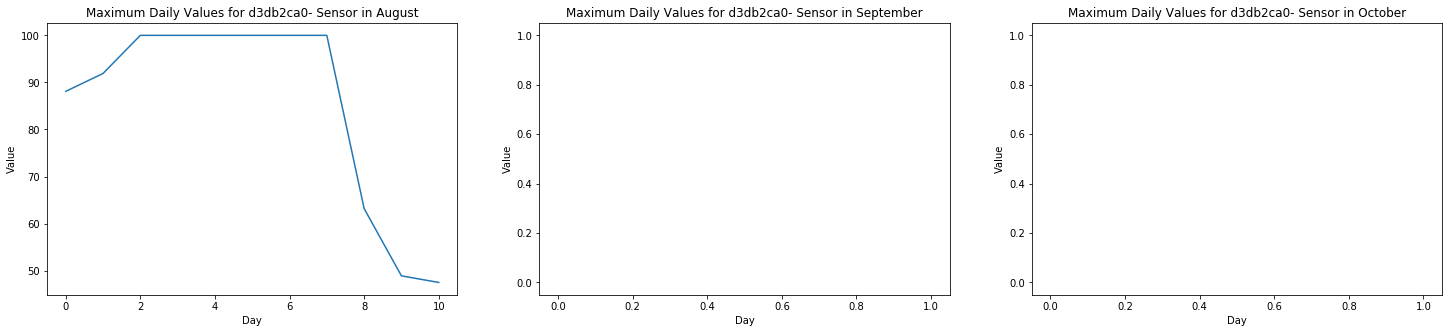

In [71]:
# Sensor 51 plot -  Data only available in August. Empty values in September and October
sensor51 = getgroup('d3db2ca0-8679-11e6-a353-2f6c041e2491')
#sensor50jul = groupget(sensor50,7)
sensor51aug = groupget(sensor51,8)
sensor51sep = groupget(sensor51,9)
sensor51oct = groupget(sensor51,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor51aug.index, y=sensor51aug.value)
plt.title('Maximum Daily Values for d3db2ca0- Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor51sep.index, y=sensor51sep.value)
plt.title('Maximum Daily Values for d3db2ca0- Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor51oct.index, y=sensor51oct.value)
plt.title('Maximum Daily Values for d3db2ca0- Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for d3d33d60 Sensor in October')

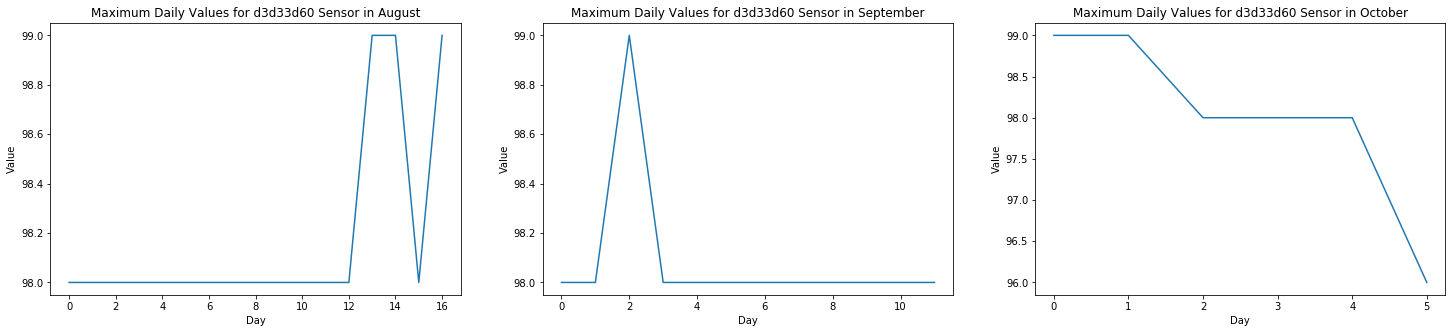

In [72]:
# Sensor 52 plot -  Data only available in August, September and October
sensor52 = getgroup('d3d33d60-8679-11e6-a353-2f6c041e2491')
#sensor50jul = groupget(sensor50,7)
sensor52aug = groupget(sensor52,8)
sensor52sep = groupget(sensor52,9)
sensor52oct = groupget(sensor52,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor52aug.index, y=sensor52aug.value)
plt.title('Maximum Daily Values for d3d33d60 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor52sep.index, y=sensor52sep.value)
plt.title('Maximum Daily Values for d3d33d60 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor52oct.index, y=sensor52oct.value)
plt.title('Maximum Daily Values for d3d33d60 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for c5e881a1 Sensor in August')

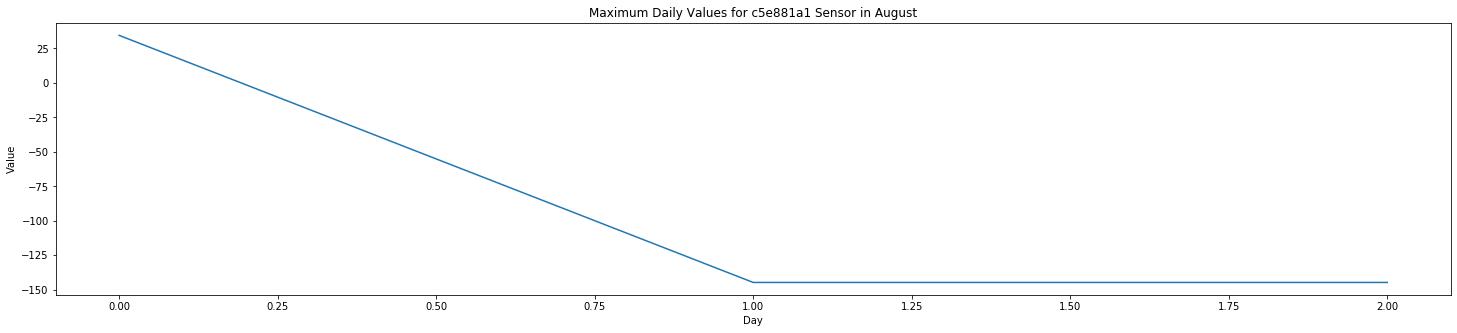

In [73]:
# Sensor 53 plot -  Data only available in August.
sensor53 = getgroup('c5e881a1-867a-11e6-a353-2f6c041e2491')
#sensor50jul = groupget(sensor50,7)
sensor53aug = groupget(sensor53,8)
#sensor53sep = groupget(sensor53,9)
#sensor53oct = groupget(sensor53,10)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor53aug.index, y=sensor53aug.value)
plt.title('Maximum Daily Values for c5e881a1 Sensor in August')


Text(0.5, 1.0, 'Maximum Daily Values for c5e881a0 Sensor in August')

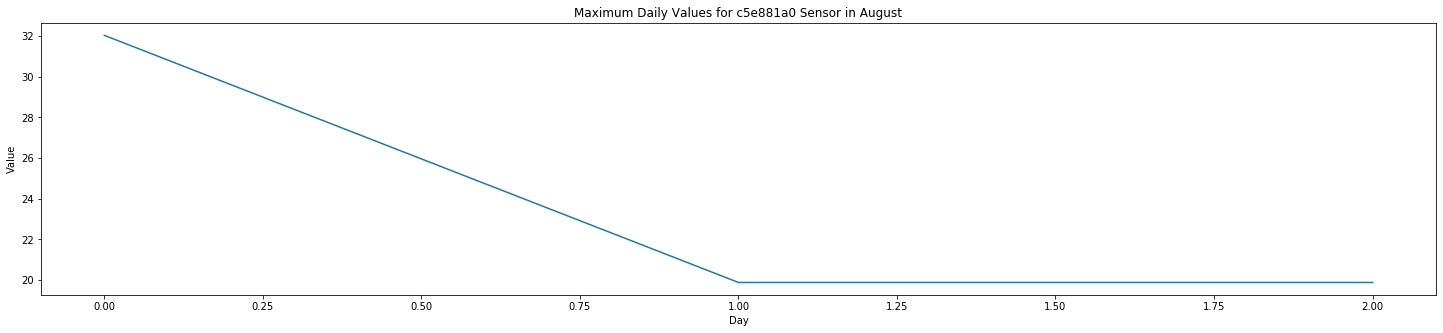

In [74]:
# Sensor 54 plot -  Data only available in August. 
sensor54 = getgroup('c5e881a0-867a-11e6-a353-2f6c041e2491')
#sensor50jul = groupget(sensor50,7)
sensor54aug = groupget(sensor54,8)
#sensor54sep = groupget(sensor54,9)
#sensor54oct = groupget(sensor54,10)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor54aug.index, y=sensor54aug.value)
plt.title('Maximum Daily Values for c5e881a0 Sensor in August')


Text(0.5, 1.0, 'Maximum Daily Values for d3d3b290 Sensor in October')

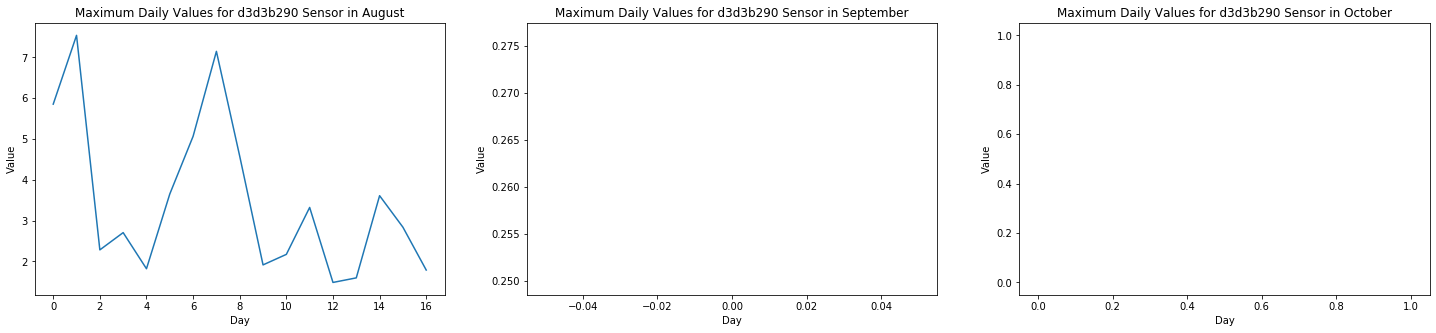

In [75]:
# Sensor 55 plot -  Data only available in August. Empty values in September and October
sensor55 = getgroup('d3d3b290-8679-11e6-a353-2f6c041e2491')
#sensor50jul = groupget(sensor50,7)
sensor55aug = groupget(sensor55,8)
sensor55sep = groupget(sensor55,9)
sensor55oct = groupget(sensor55,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor55aug.index, y=sensor55aug.value)
plt.title('Maximum Daily Values for d3d3b290 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor55sep.index, y=sensor55sep.value)
plt.title('Maximum Daily Values for d3d3b290 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor55oct.index, y=sensor55oct.value)
plt.title('Maximum Daily Values for d3d3b290 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for d3db53b0 Sensor in October')

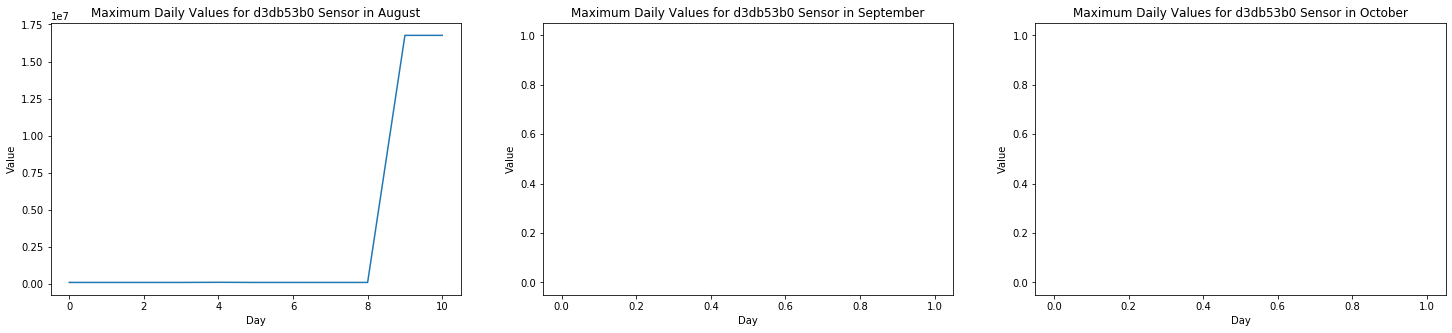

In [76]:
# Sensor 56 plot -  Data only available in August. Empty values in September and October
sensor56 = getgroup('d3db53b0-8679-11e6-a353-2f6c041e2491')
#sensor50jul = groupget(sensor50,7)
sensor56aug = groupget(sensor56,8)
sensor56sep = groupget(sensor56,9)
sensor56oct = groupget(sensor56,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor56aug.index, y=sensor56aug.value)
plt.title('Maximum Daily Values for d3db53b0 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor56sep.index, y=sensor56sep.value)
plt.title('Maximum Daily Values for d3db53b0 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor56oct.index, y=sensor56oct.value)
plt.title('Maximum Daily Values for d3db53b0 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for e66851e0 Sensor in September')

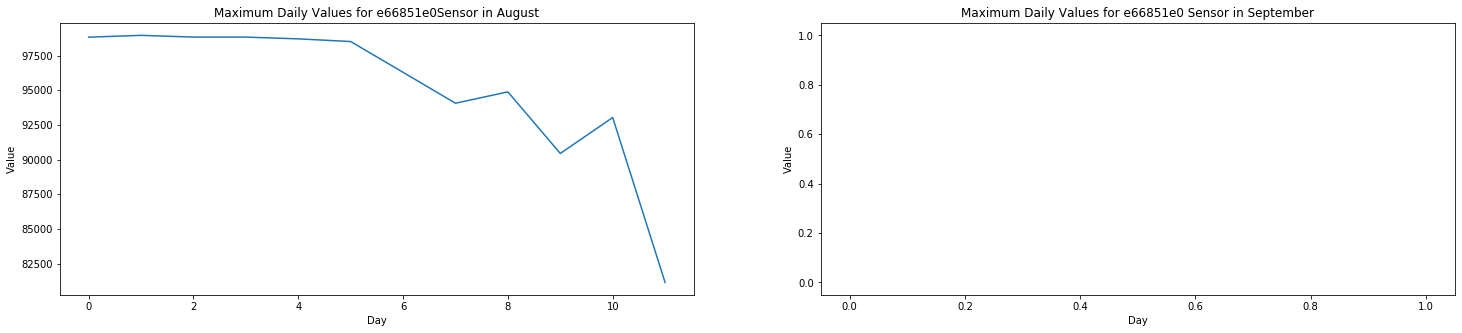

In [77]:
# Sensor 57 plot -  Data only available in August. Empty values in September.
sensor57 = getgroup('e66851e0-8679-11e6-a353-2f6c041e2491')
#sensor50jul = groupget(sensor50,7)
sensor57aug = groupget(sensor57,8)
sensor57sep = groupget(sensor57,9)
#sensor57oct = groupget(sensor57,10)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor57aug.index, y=sensor57aug.value)
plt.title('Maximum Daily Values for e66851e0Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor57sep.index, y=sensor57sep.value)
plt.title('Maximum Daily Values for e66851e0 Sensor in September')


Text(0.5, 1.0, 'Maximum Daily Values for d3d73500 Sensor in October')

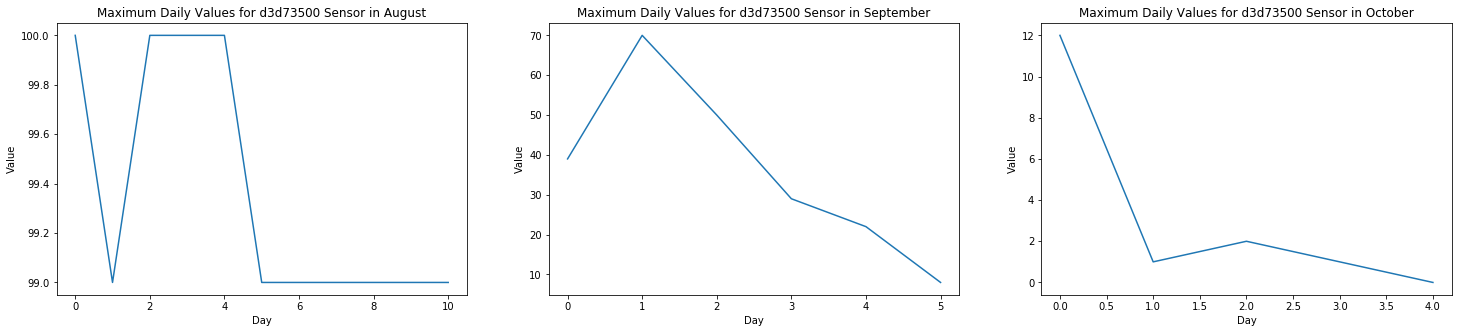

In [78]:
# Sensor 58 plot -  Data only available in August, September and October
sensor58 = getgroup('d3d73500-8679-11e6-a353-2f6c041e2491')
#sensor50jul = groupget(sensor50,7)
sensor58aug = groupget(sensor58,8)
sensor58sep = groupget(sensor58,9)
sensor58oct = groupget(sensor58,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor58aug.index, y=sensor58aug.value)
plt.title('Maximum Daily Values for d3d73500 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor58sep.index, y=sensor58sep.value)
plt.title('Maximum Daily Values for d3d73500 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor58oct.index, y=sensor58oct.value)
plt.title('Maximum Daily Values for d3d73500 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for d3d7d140 Sensor in October')

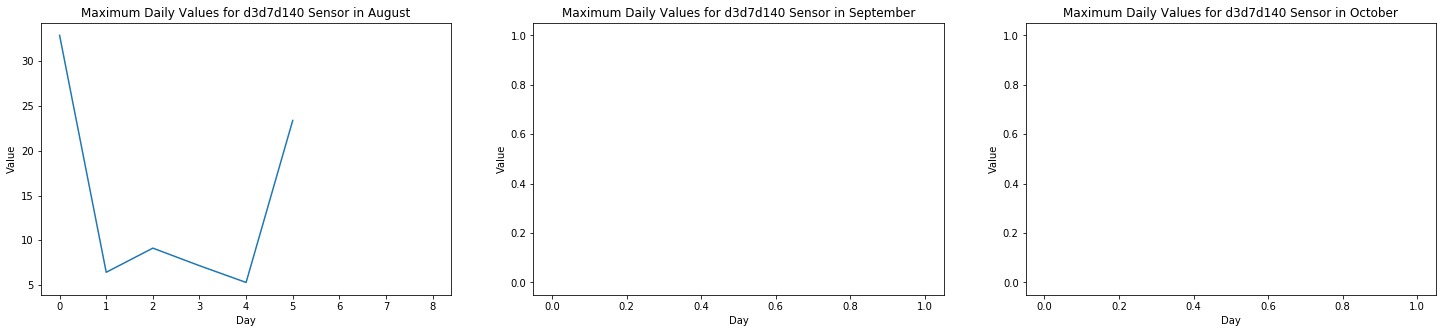

In [79]:
# Sensor 59 plot -  Data only available in August. Empty values in September and October
sensor59 = getgroup('d3d7d140-8679-11e6-a353-2f6c041e2491')
#sensor50jul = groupget(sensor50,7)
sensor59aug = groupget(sensor59,8)
sensor59sep = groupget(sensor59,9)
sensor59oct = groupget(sensor59,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor59aug.index, y=sensor59aug.value)
plt.title('Maximum Daily Values for d3d7d140 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor59sep.index, y=sensor59sep.value)
plt.title('Maximum Daily Values for d3d7d140 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor59oct.index, y=sensor59oct.value)
plt.title('Maximum Daily Values for d3d7d140 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for d3d3b291 Sensor in October')

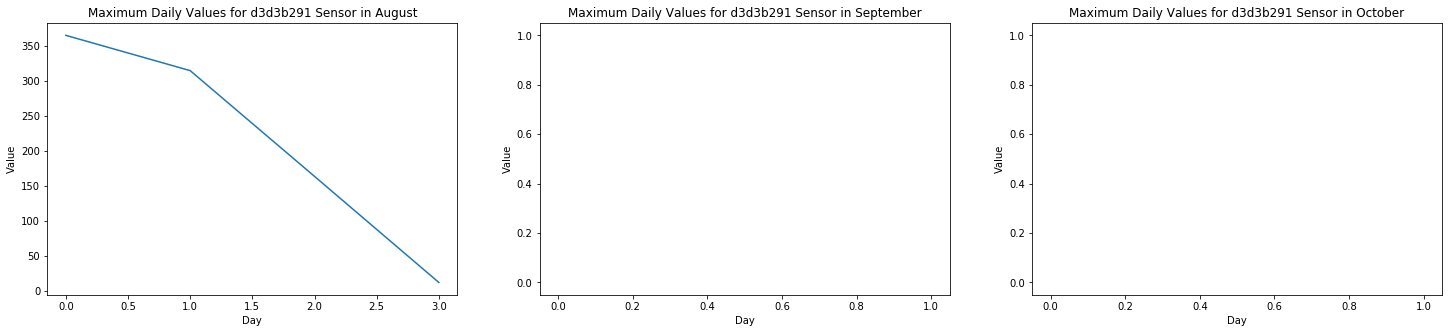

In [80]:
# Sensor 60 plot -  Data only available in August. Empty values in September and October
sensor60 = getgroup('d3d3b291-8679-11e6-a353-2f6c041e2491')
#sensor50jul = groupget(sensor50,7)
sensor60aug = groupget(sensor60,8)
sensor60sep = groupget(sensor60,9)
sensor60oct = groupget(sensor60,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor60aug.index, y=sensor60aug.value)
plt.title('Maximum Daily Values for d3d3b291 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor60sep.index, y=sensor60sep.value)
plt.title('Maximum Daily Values for d3d3b291 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor60oct.index, y=sensor60oct.value)
plt.title('Maximum Daily Values for d3d3b291 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for e6678e91 Sensor in September')

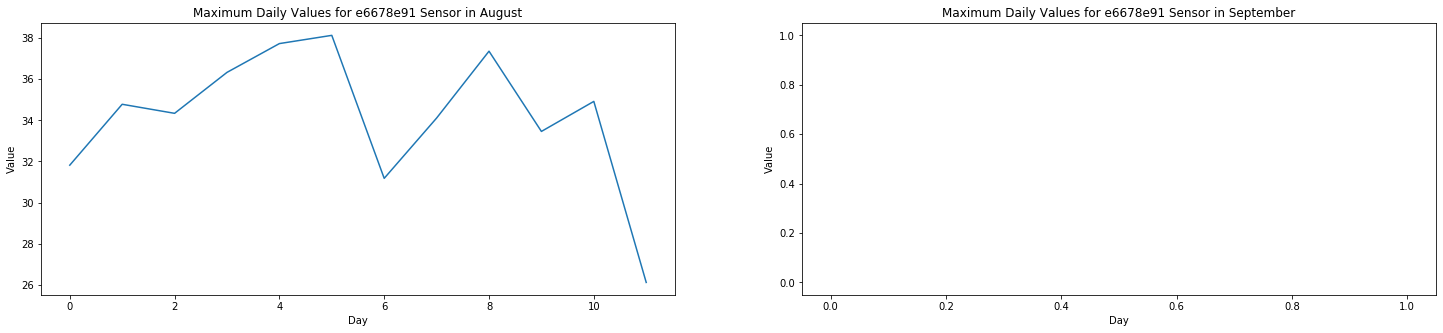

In [81]:
# Sensor 61 plot -  Data only available in August. Empty values in September.
#sensor50jul = groupget(sensor50,7)
sensor61aug = groupget(sensor61,8)
sensor61sep = groupget(sensor61,9)
#sensor61oct = groupget(sensor61,10)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor61aug.index, y=sensor61aug.value)
plt.title('Maximum Daily Values for e6678e91 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor61sep.index, y=sensor61sep.value)
plt.title('Maximum Daily Values for e6678e91 Sensor in September')

## Merge Dataframes

In [162]:
# Merge datatypes and sensors data
first = pd.merge(datatypes, sensors, left_on='id', right_on='data_type_id', how='left')

In [163]:
first.head()

,id_x,type,si_unit,type_id,id_y,description,data_frequency,status,created_at,updated_at,data_type_id,node_id
0,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA,763ca6f0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00,2016-09-29 20:13:52.803+00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
1,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA,c15a6371-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-07 00:51:40+00,2016-09-29 20:13:52.836+00,35dcb3c0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491
2,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA,7644bd40-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 22:09:40+00,2016-09-29 19:20:17.417+00,35dcb3c0-8679-11e6-bda3-ef77801087ee,76309900-8679-11e6-a353-2f6c041e2491
3,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA,c15f9391-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-10 04:20:22+00,2016-09-29 19:20:17.516+00,35dcb3c0-8679-11e6-bda3-ef77801087ee,c14ccee0-8679-11e6-a353-2f6c041e2491
4,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA,763bbc90-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 21:50:32+00,2016-09-30 18:12:04.578+00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762c5340-8679-11e6-a353-2f6c041e2491


### 3.0 Descriptive Analysis One data frame at a time **

3.1: How many sensors of each type are there?

In [164]:
# Check value counts of the sensors. There are 7 types of each sensors.
first.type_id.value_counts()

PA        10
GP_H2S    10
GP_CO2    10
TCA       10
BAT       10
HUMA      10
RSAM       1
Name: type_id, dtype: int64

----

### 4.0 Creating a Digital Thread from the data sets**

**Goal: Merge everything into one wide data table ** 

You have two data frames: `sensors` and `types` Merge each sensors with its type. (Hint: Use `pd.merge()`)

Question: What does this achieve? Why should we do this?

#### We merge this to see what type of data the sensor gather. Without the datatypes file, we cannot interpret what measurements each sensor gives.

Now take the raw `data` data frame and merge it with all the `sensors` and their types.

In [166]:
# drop some unwanted double columns
first_drop = first.drop(['id_x'], axis=1)

In [167]:
# Rename id_y to sensor_id for easy identification
first_rename = first_drop.rename({'id_y': 'sensor_id'}, axis=1)


In [168]:
# make a second match of the first data merged and the datapoints data
merged_data = pd.merge(datapoints,first_rename, left_on='sensor_id', right_on='sensor_id', how='left')

In [169]:
merged_data.describe()   # Value statistical analysis won't make sense now cos it represents different type of data ppts

,value,Day,Month,Year,data_frequency
count,6.345600e+04,176534.000000,176534.000000,176534.0,176534.0
mean,1.436540e+05,16.774842,8.683704,2016.0,1800000.0
std,1.497966e+06,11.383741,0.685448,0.0,0.0
min,-1.529700e+02,1.000000,7.000000,2016.0,1800000.0
25%,2.524000e+01,5.000000,8.000000,2016.0,1800000.0
50%,7.300000e+01,21.000000,9.000000,2016.0,1800000.0
75%,9.900000e+01,28.000000,9.000000,2016.0,1800000.0
max,1.677295e+07,31.000000,10.000000,2016.0,1800000.0


In [170]:
# Drop the unwanted data and double columns
merged_data_drop = merged_data.drop(['id','created_at','updated_at','data_type_id','node_id',
                         'description', 'status','data_frequency'], axis=1)

In [171]:
# Check data shape
merged_data_drop.shape

(176534, 10)

In [172]:
# check first 5
merged_data_drop.head()

,value,timestamp,sensor_id,Day,Month,Year,Time,type,si_unit,type_id
0,98.000,2016-08-03 04:39:25+00:00,7635c920-8679-11e6-a353-2f6c041e2491,3,8,2016,04:39:25,battery,percentage,BAT
1,33.198,2016-08-03 04:39:25+00:00,763b9580-8679-11e6-a353-2f6c041e2491,3,8,2016,04:39:25,hydrogen sulfide concentration,ppm,GP_H2S
2,29.300,2016-08-03 04:39:25+00:00,763ca6f0-8679-11e6-a353-2f6c041e2491,3,8,2016,04:39:25,temperature,celcius,TCA
3,96893.110,2016-08-03 04:39:25+00:00,763d9150-8679-11e6-a353-2f6c041e2491,3,8,2016,04:39:25,pressure,pascal,PA
4,459.736,2016-08-03 04:39:25+00:00,763701a1-8679-11e6-a353-2f6c041e2491,3,8,2016,04:39:25,carbon dioxide concentration,ppm,GP_CO2


In [173]:
#Check last 5 
merged_data_drop.tail()

,value,timestamp,sensor_id,Day,Month,Year,Time,type,si_unit,type_id
176529,125.0,2016-08-31 19:00:01+00:00,1248ff60-e707-11e6-89c8-314aa4f67f8c,31,8,2016,19:00:01,RSAM,counts,RSAM
176530,143.0,2016-08-31 19:50:00+00:00,1248ff60-e707-11e6-89c8-314aa4f67f8c,31,8,2016,19:50:00,RSAM,counts,RSAM
176531,175.0,2016-08-31 21:00:02+00:00,1248ff60-e707-11e6-89c8-314aa4f67f8c,31,8,2016,21:00:02,RSAM,counts,RSAM
176532,164.0,2016-08-31 21:50:00+00:00,1248ff60-e707-11e6-89c8-314aa4f67f8c,31,8,2016,21:50:00,RSAM,counts,RSAM
176533,89.0,2016-08-31 23:00:00+00:00,1248ff60-e707-11e6-89c8-314aa4f67f8c,31,8,2016,23:00:00,RSAM,counts,RSAM


-----

In [174]:
# 64.05 % of the values are missing.
merged_data_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176534 entries, 0 to 176533
Data columns (total 10 columns):
value        63456 non-null float64
timestamp    176534 non-null datetime64[ns, UTC]
sensor_id    176534 non-null object
Day          176534 non-null int64
Month        176534 non-null int64
Year         176534 non-null int64
Time         176534 non-null object
type         176534 non-null object
si_unit      176534 non-null object
type_id      176534 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(5)
memory usage: 14.8+ MB


### 5.0 Time Series based analysis

Now, we are going to take this stitiched data frame and use it for our analysis. Specifically, we are going to perform Time-based analysis on this data.

    Step 1: Take the `full` data frame and make the Time Stamp datetime format
    Step 2: Resample the dataset to the daily level. (One observation per date)
    Step 3: For the resampled data, calculate the daily mean, min and max values for each sensor.

Resample to get daily averages.
Then subset to select the rows you need.

In [175]:
#sensor_group = merged_data.groupby(['sensor_id','Day'])
# Group sensor data by month
sensor_group= merged_data.groupby(['Month'])
sensor_group.first()

,id,value,timestamp,sensor_id,Day,Year,Time,type,si_unit,type_id,description,data_frequency,status,created_at,updated_at,data_type_id,node_id
Month,,,,,,,,,,,,,,,,,
7,12ac7c20-e707-11e6-89c8-314aa4f67f8c,455.0,2016-07-01 00:00:31+00:00,1248ff60-e707-11e6-89c8-314aa4f67f8c,1,2016,00:00:31,RSAM,counts,RSAM,\N,1800000,OFFLINE,2016-07-01 00:00:31+00,2017-01-30 16:24:05.832+00,ed5edee0-e701-11e6-83c1-01ce06e6d17f,ede3ed60-e701-11e6-83c1-01ce06e6d17f
8,764c5e60-8679-11e6-a353-2f6c041e2491,98.0,2016-08-03 04:39:25+00:00,7635c920-8679-11e6-a353-2f6c041e2491,3,2016,04:39:25,battery,percentage,BAT,\N,1800000,OFFLINE,2016-08-03 04:39:25+00,2016-09-29 20:13:52.793+00,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
9,35d63a60-8695-11e6-b9eb-2b0883ebdaeb,93.0,2016-09-01 00:28:19+00:00,e66851e1-8679-11e6-a353-2f6c041e2491,1,2016,00:28:19,carbon dioxide concentration,ppm,GP_CO2,\N,1800000,OFFLINE,2016-08-15 08:46:05+00,2016-09-29 19:21:19.649+00,35dcdad0-8679-11e6-bda3-ef77801087ee,e662fab0-8679-11e6-a353-2f6c041e2491
10,fc2bb6b0-879c-11e6-b4e7-fb610e712037,81.0,2016-10-01 00:01:27+00:00,763bbc90-8679-11e6-a353-2f6c041e2491,1,2016,00:01:27,temperature,celcius,TCA,\N,1800000,OFFLINE,2016-08-03 21:50:32+00,2016-09-30 18:12:04.578+00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762c5340-8679-11e6-a353-2f6c041e2491


In [178]:
# Sensor 1
print("Average sensor1 value is:", sensor1['value'].mean())
print("Maximum sensor1 value is:",sensor1['value'].max())
print("Minimum sensor1 value is:",sensor1['value'].min())

Average sensor1 value is: 146.90971428571427
Maximum sensor1 value is: 422.65
Minimum sensor1 value is: 20.802


In [97]:
data_1 = sensor_group.get_group(7)

# data_1mean = data_1.groupby(["sensor_id"], as_index=False)["value"].mean()
# data_1max = data_1.groupby(["sensor_id"], as_index=False)["value"].max()
# data_1min = data_1.groupby(["sensor_id"], as_index=False)["value"].min()
#print("Average Battery value is:", data_1['value'].mean())
# print("Maximum Battery value is:",data_1['value'].max())
# print("Minimum Battery value is:",data_1['value'].min())


In [98]:
data_1['sensor_id'].value_counts()

1248ff60-e707-11e6-89c8-314aa4f67f8c    4392
Name: sensor_id, dtype: int64

In [99]:
#data_1.info()

In [100]:
#data_1.tail()

In [101]:
# print("Average RSAM value is:", data_1['value'].mean())
# print("Maximum RSAM value is:",data_1['value'].max())
# print("Minimum RSAM value is:",data_1['value'].min())

In [102]:
data_s = data_1.groupby('Day')
#data_s.first()

## July Data

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

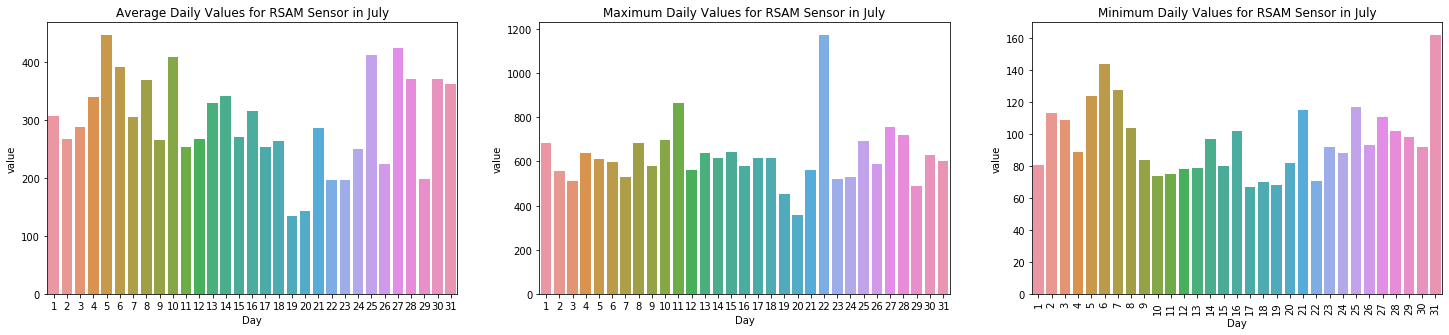

In [103]:
data_mean = data_s.mean().sort_values('value',ascending=False)
data_max = data_s.max().sort_values('value',ascending=False)
data_min = data_s.min().sort_values('value',ascending=False)

# Only one sensor was available in July
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.barplot(x=data_mean.index, y=data_mean['value'])
plt.title('Average Daily Values for RSAM Sensor in July')
plt.subplot(1,3,2)
sns.barplot(x=data_max.index, y=data_max['value'])
plt.title('Maximum Daily Values for RSAM Sensor in July')
plt.subplot(1,3,3)
sns.barplot(x=data_min.index, y=data_min['value'])
plt.title('Minimum Daily Values for RSAM Sensor in July')
plt.xticks(rotation=90)


## August Data

In [104]:
data_2 = sensor_group.get_group(8)
#data_2.head()

In [105]:
#data_2['sensor_id'].value_counts()

In [106]:
#data_2.mean().sort_values('value',ascending=False)

In [107]:
data_2mean = data_2.groupby(["Day", "type_id"], as_index=False)["value"].mean()
data_2max = data_2.groupby(["Day", "type_id"], as_index=False)["value"].max()
data_2min = data_2.groupby(["Day", "type_id"], as_index=False)["value"].min()

In [108]:
data_2mean['type_id'].nunique()

7

In [109]:
#data_2mean['type_id']

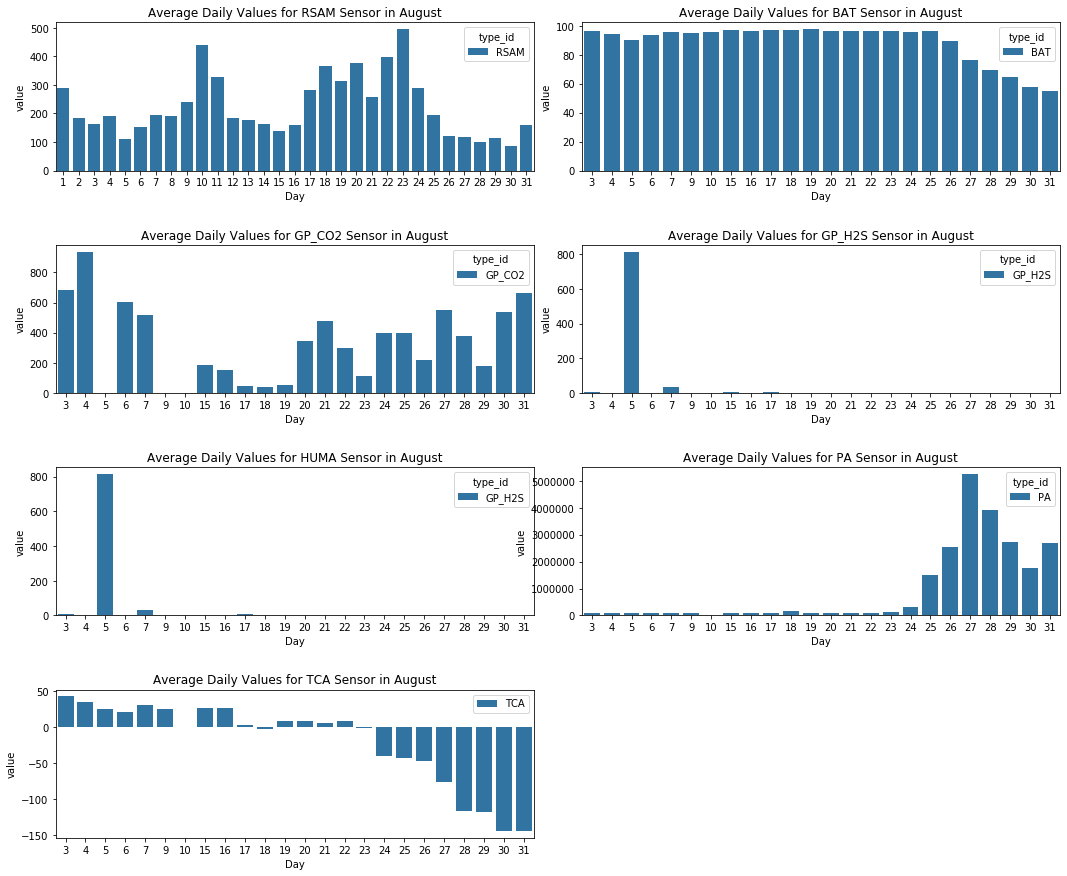

In [110]:
df1 = data_2mean[data_2mean.type_id=="RSAM"]
df2 = data_2mean[data_2mean.type_id=="BAT"]
df3 = data_2mean[data_2mean.type_id=="GP_CO2"]
df4 = data_2mean[data_2mean.type_id=="GP_H2S"]
df5 = data_2mean[data_2mean.type_id=="GP_H2S"]
df6 = data_2mean[data_2mean.type_id=="PA"]
df7 = data_2mean[data_2mean.type_id=="TCA"]

plt.figure(figsize=(18,15))
#fig.suptitle('Vertically stacked subplots')
plt.subplot(4,2,1)
sns.barplot(x="Day", y="value", hue= "type_id", data=df1)
plt.title('Average Daily Values for RSAM Sensor in August')
plt.subplot(4,2,2)
sns.barplot(x="Day", y="value", hue= "type_id", data=df2)
plt.title('Average Daily Values for BAT Sensor in August')
plt.subplot(4,2,3)
sns.barplot(x="Day", y="value", hue= "type_id", data=df3)
plt.title('Average Daily Values for GP_CO2 Sensor in August')
plt.subplot(4,2,4)
sns.barplot(x="Day", y="value", hue= "type_id", data=df4)
plt.title('Average Daily Values for GP_H2S Sensor in August')
plt.subplot(4,2,5)
sns.barplot(x="Day", y="value", hue= "type_id", data=df5)
plt.title('Average Daily Values for HUMA Sensor in August')
plt.subplot(4,2,6)
sns.barplot(x="Day", y="value", hue= "type_id", data=df6)
plt.title('Average Daily Values for PA Sensor in August')
plt.subplot(4,2,7)
sns.barplot(x="Day", y="value", hue= "type_id", data=df7)
plt.title('Average Daily Values for TCA Sensor in August')
#plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.legend()

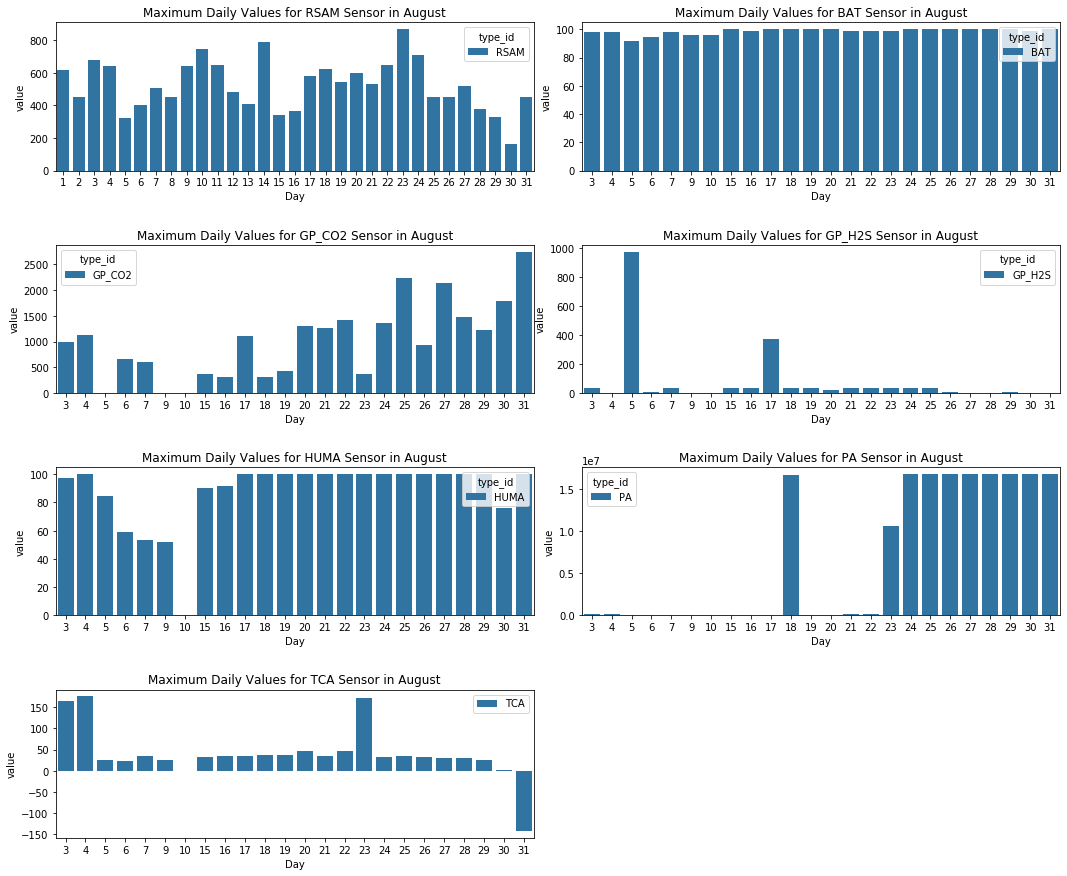

In [111]:
df1_max = data_2max[data_2max.type_id=="RSAM"]
df2_max = data_2max[data_2max.type_id=="BAT"]
df3_max = data_2max[data_2max.type_id=="GP_CO2"]
df4_max = data_2max[data_2max.type_id=="GP_H2S"]
df5_max = data_2max[data_2max.type_id=="HUMA"]
df6_max = data_2max[data_2max.type_id=="PA"]
df7_max = data_2max[data_2max.type_id=="TCA"]


plt.figure(figsize=(18,15))
#fig.suptitle('Vertically stacked subplots')
plt.subplot(4,2,1)
sns.barplot(x="Day", y="value", hue= "type_id", data=df1_max)
plt.title('Maximum Daily Values for RSAM Sensor in August')
plt.subplot(4,2,2)
sns.barplot(x="Day", y="value", hue= "type_id", data=df2_max)
plt.title('Maximum Daily Values for BAT Sensor in August')
plt.subplot(4,2,3)
sns.barplot(x="Day", y="value", hue= "type_id", data=df3_max)
plt.title('Maximum Daily Values for GP_CO2 Sensor in August')
plt.subplot(4,2,4)
sns.barplot(x="Day", y="value", hue= "type_id", data=df4_max)
plt.title('Maximum Daily Values for GP_H2S Sensor in August')
plt.subplot(4,2,5)
sns.barplot(x="Day", y="value", hue= "type_id", data=df5_max)
plt.title('Maximum Daily Values for HUMA Sensor in August')
plt.subplot(4,2,6)
sns.barplot(x="Day", y="value", hue= "type_id", data=df6_max)
plt.title('Maximum Daily Values for PA Sensor in August')
plt.subplot(4,2,7)
sns.barplot(x="Day", y="value", hue= "type_id", data=df7_max)
plt.title('Maximum Daily Values for TCA Sensor in August')
#plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.legend()

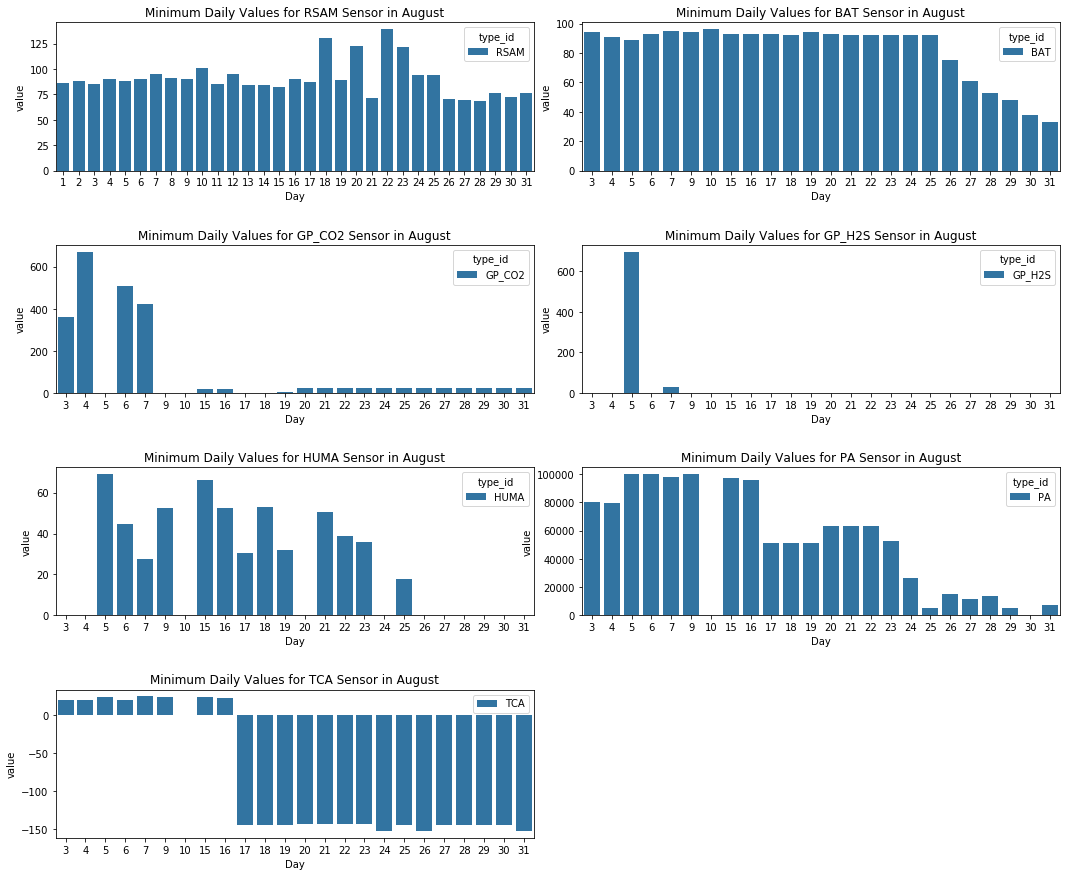

In [112]:
df1_min = data_2min[data_2min.type_id=="RSAM"]
df2_min = data_2min[data_2min.type_id=="BAT"]
df3_min = data_2min[data_2min.type_id=="GP_CO2"]
df4_min = data_2min[data_2min.type_id=="GP_H2S"]
df5_min = data_2min[data_2min.type_id=="HUMA"]
df6_min = data_2min[data_2min.type_id=="PA"]
df7_min = data_2min[data_2min.type_id=="TCA"]


plt.figure(figsize=(18,15))
#fig.suptitle('Vertically stacked subplots')
plt.subplot(4,2,1)
sns.barplot(x="Day", y="value", hue= "type_id", data=df1_min)
plt.title('Minimum Daily Values for RSAM Sensor in August')
plt.subplot(4,2,2)
sns.barplot(x="Day", y="value", hue= "type_id", data=df2_min)
plt.title('Minimum Daily Values for BAT Sensor in August')
plt.subplot(4,2,3)
sns.barplot(x="Day", y="value", hue= "type_id", data=df3_min)
plt.title('Minimum Daily Values for GP_CO2 Sensor in August')
plt.subplot(4,2,4)
sns.barplot(x="Day", y="value", hue= "type_id", data=df4_min)
plt.title('Minimum Daily Values for GP_H2S Sensor in August')
plt.subplot(4,2,5)
sns.barplot(x="Day", y="value", hue= "type_id", data=df5_min)
plt.title('Minimum Daily Values for HUMA Sensor in August')
plt.subplot(4,2,6)
sns.barplot(x="Day", y="value", hue= "type_id", data=df6_min)
plt.title('Minimum Daily Values for PA Sensor in August')
plt.subplot(4,2,7)
sns.barplot(x="Day", y="value", hue= "type_id", data=df7_min)
plt.title('Minimum Daily Values for TCA Sensor in August')
#plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.legend()

## September Data

In [113]:
data_3 = sensor_group.get_group(9)
#data_3.head()

In [114]:
#data_3['sensor_id'].value_counts()

In [115]:
data_3mean = data_3.groupby(["Day", "type_id"], as_index=False)["value"].mean()
data_3max = data_3.groupby(["Day", "type_id"], as_index=False)["value"].max()
data_3min = data_3.groupby(["Day", "type_id"], as_index=False)["value"].min()

In [116]:
data_3['type_id'].nunique()

6

In [117]:
#data_3.head()

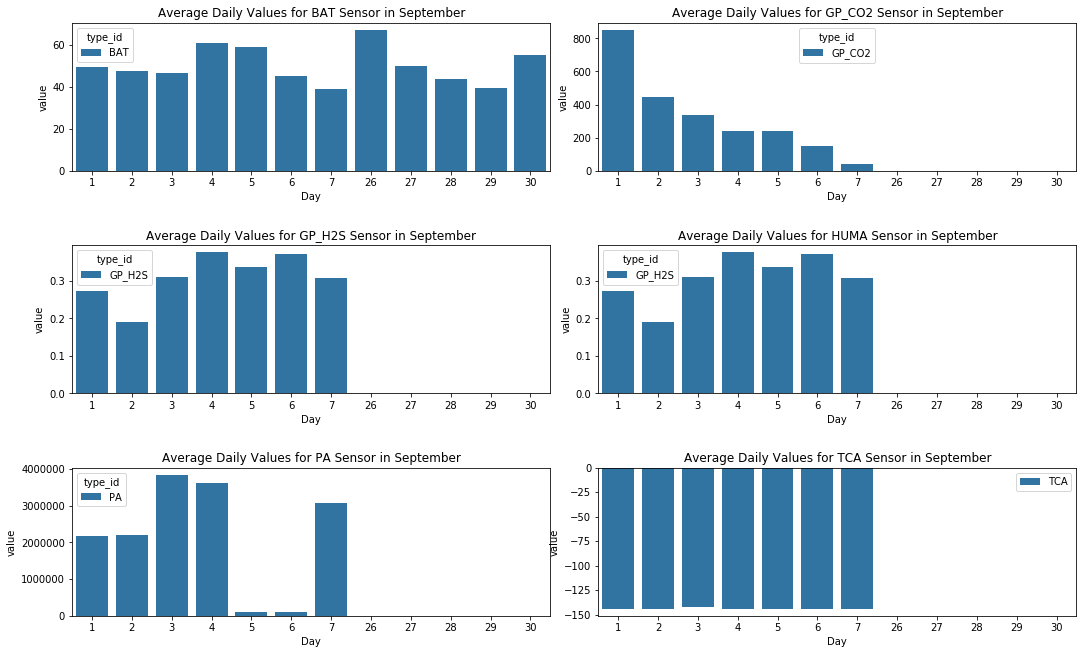

In [118]:
df9 = data_3mean[data_3mean.type_id=="BAT"]
df10 = data_3mean[data_3mean.type_id=="GP_CO2"]
df11 = data_3mean[data_3mean.type_id=="GP_H2S"]
df12 = data_3mean[data_3mean.type_id=="GP_H2S"]
df13 = data_3mean[data_3mean.type_id=="PA"]
df14 = data_3mean[data_3mean.type_id=="TCA"]

plt.figure(figsize=(18,15))

plt.subplot(4,2,1)
sns.barplot(x="Day", y="value", hue= "type_id", data=df9)
plt.title('Average Daily Values for BAT Sensor in September')
plt.subplot(4,2,2)
sns.barplot(x="Day", y="value", hue= "type_id", data=df10)
plt.title('Average Daily Values for GP_CO2 Sensor in September')
plt.subplot(4,2,3)
sns.barplot(x="Day", y="value", hue= "type_id", data=df11)
plt.title('Average Daily Values for GP_H2S Sensor in September')
plt.subplot(4,2,4)
sns.barplot(x="Day", y="value", hue= "type_id", data=df12)
plt.title('Average Daily Values for HUMA Sensor in September')
plt.subplot(4,2,5)
sns.barplot(x="Day", y="value", hue= "type_id", data=df13)
plt.title('Average Daily Values for PA Sensor in September')
plt.subplot(4,2,6)
sns.barplot(x="Day", y="value", hue= "type_id", data=df14)
plt.title('Average Daily Values for TCA Sensor in September')
#plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.legend()

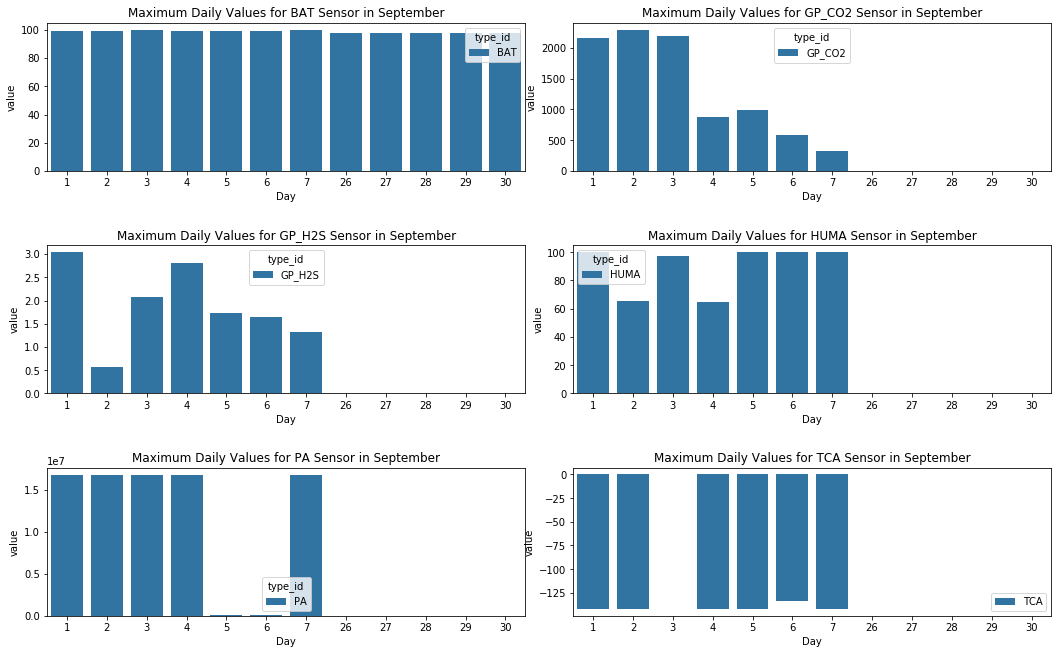

In [119]:
df9_max = data_3max[data_3max.type_id=="BAT"]
df10_max = data_3max[data_3max.type_id=="GP_CO2"]
df11_max = data_3max[data_3max.type_id=="GP_H2S"]
df12_max = data_3max[data_3max.type_id=="HUMA"]
df13_max = data_3max[data_3max.type_id=="PA"]
df14_max = data_3max[data_3max.type_id=="TCA"]


plt.figure(figsize=(18,15))
#fig.suptitle('Vertically stacked subplots')
plt.subplot(4,2,1)
sns.barplot(x="Day", y="value", hue= "type_id", data=df9_max)
plt.title('Maximum Daily Values for BAT Sensor in September')
plt.subplot(4,2,2)
sns.barplot(x="Day", y="value", hue= "type_id", data=df10_max)
plt.title('Maximum Daily Values for GP_CO2 Sensor in September')
plt.subplot(4,2,3)
sns.barplot(x="Day", y="value", hue= "type_id", data=df11_max)
plt.title('Maximum Daily Values for GP_H2S Sensor in September')
plt.subplot(4,2,4)
sns.barplot(x="Day", y="value", hue= "type_id", data=df12_max)
plt.title('Maximum Daily Values for HUMA Sensor in September')
plt.subplot(4,2,5)
sns.barplot(x="Day", y="value", hue= "type_id", data=df13_max)
plt.title('Maximum Daily Values for PA Sensor in September')
plt.subplot(4,2,6)
sns.barplot(x="Day", y="value", hue= "type_id", data=df14_max)
plt.title('Maximum Daily Values for TCA Sensor in September')
#plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.legend()

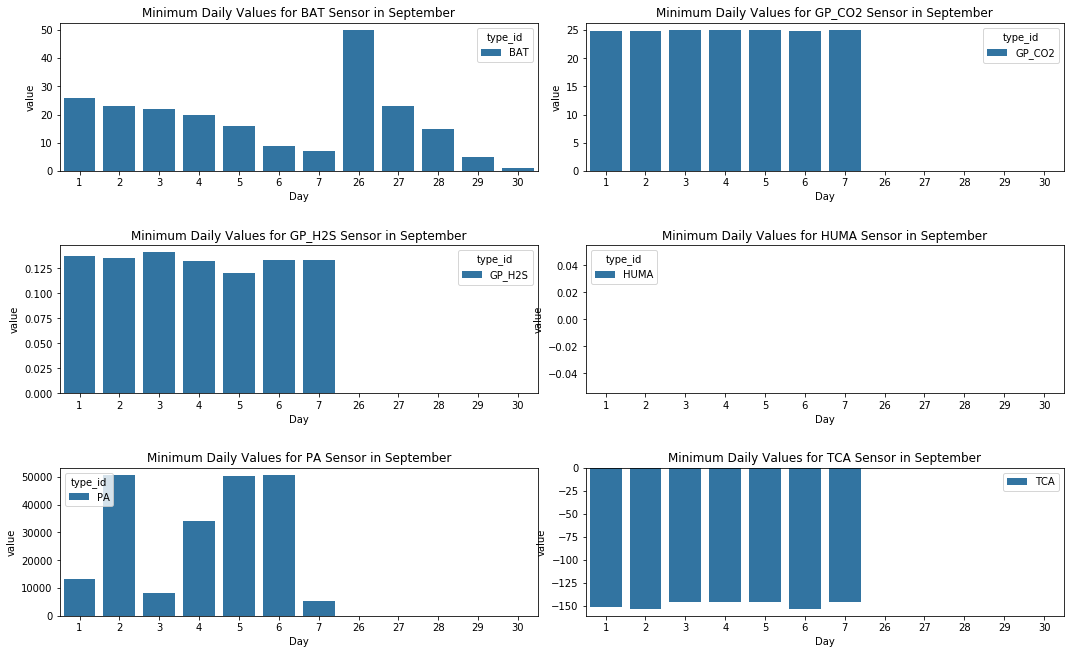

In [120]:
df9_min = data_3min[data_3min.type_id=="BAT"]
df10_min = data_3min[data_3min.type_id=="GP_CO2"]
df11_min = data_3min[data_3min.type_id=="GP_H2S"]
df12_min = data_3min[data_3min.type_id=="HUMA"]
df13_min = data_3min[data_3min.type_id=="PA"]
df14_min = data_3min[data_3min.type_id=="TCA"]


plt.figure(figsize=(18,15))
#fig.suptitle('Vertically stacked subplots')
plt.subplot(4,2,1)
sns.barplot(x="Day", y="value", hue= "type_id", data=df9_min)
plt.title('Minimum Daily Values for BAT Sensor in September')
plt.subplot(4,2,2)
sns.barplot(x="Day", y="value", hue= "type_id", data=df10_min)
plt.title('Minimum Daily Values for GP_CO2 Sensor in September')
plt.subplot(4,2,3)
sns.barplot(x="Day", y="value", hue= "type_id", data=df11_min)
plt.title('Minimum Daily Values for GP_H2S Sensor in September')
plt.subplot(4,2,4)
sns.barplot(x="Day", y="value", hue= "type_id", data=df12_min)
plt.title('Minimum Daily Values for HUMA Sensor in September')
plt.subplot(4,2,5)
sns.barplot(x="Day", y="value", hue= "type_id", data=df13_min)
plt.title('Minimum Daily Values for PA Sensor in September')
plt.subplot(4,2,6)
sns.barplot(x="Day", y="value", hue= "type_id", data=df14_min)
plt.title('Minimum Daily Values for TCA Sensor in September')
#plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.legend()

## October Data

In [121]:
data_4 = sensor_group.get_group(10)
data_4.head()

,id,value,timestamp,sensor_id,Day,Year,Time,type,si_unit,type_id,description,data_frequency,status,created_at,updated_at,data_type_id,node_id
149674,fc2bb6b0-879c-11e6-b4e7-fb610e712037,NaN,2016-10-01 00:01:27+00:00,763bbc90-8679-11e6-a353-2f6c041e2491,1,2016,00:01:27,temperature,celcius,TCA,\N,1800000,OFFLINE,2016-08-03 21:50:32+00,2016-09-30 18:12:04.578+00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762c5340-8679-11e6-a353-2f6c041e2491
149675,fc2c52f0-879c-11e6-b4e7-fb610e712037,NaN,2016-10-01 00:01:27+00:00,76402960-8679-11e6-a353-2f6c041e2491,1,2016,00:01:27,humidity,relative humidity,HUMA,\N,1800000,OFFLINE,2016-08-03 21:50:32+00,2016-09-30 18:12:04.579+00,35dcb3c2-8679-11e6-bda3-ef77801087ee,762c5340-8679-11e6-a353-2f6c041e2491
149676,451ef210-879d-11e6-b4e7-fb610e712037,NaN,2016-10-01 00:03:19+00:00,d3d3b291-8679-11e6-a353-2f6c041e2491,1,2016,00:03:19,carbon dioxide concentration,ppm,GP_CO2,\N,1800000,OFFLINE,2016-08-15 05:31:29+00,2016-09-30 18:12:04.585+00,35dcdad0-8679-11e6-bda3-ef77801087ee,d3cb7530-8679-11e6-a353-2f6c041e2491
149677,45218a20-879d-11e6-b4e7-fb610e712037,NaN,2016-10-01 00:03:19+00:00,d3d56040-8679-11e6-a353-2f6c041e2491,1,2016,00:03:19,pressure,pascal,PA,\N,1800000,OFFLINE,2016-08-15 05:31:29+00,2016-09-30 18:12:04.582+00,35dcb3c1-8679-11e6-bda3-ef77801087ee,d3cb7530-8679-11e6-a353-2f6c041e2491
149678,575f56e0-879d-11e6-b4e7-fb610e712037,NaN,2016-10-01 00:05:00+00:00,763701a0-8679-11e6-a353-2f6c041e2491,1,2016,00:05:00,hydrogen sulfide concentration,ppm,GP_H2S,\N,1800000,OFFLINE,2016-08-03 21:50:32+00,2016-09-30 18:12:04.577+00,35dcdad1-8679-11e6-bda3-ef77801087ee,762c5340-8679-11e6-a353-2f6c041e2491


In [122]:
data_4mean = data_4.groupby(["Day", "type_id"], as_index=False)["value"].mean()
data_4max = data_4.groupby(["Day", "type_id"], as_index=False)["value"].max()
data_4min = data_4.groupby(["Day", "type_id"], as_index=False)["value"].min()

In [123]:
#data_4.head()

In [124]:
data_4['type_id'].nunique()

6

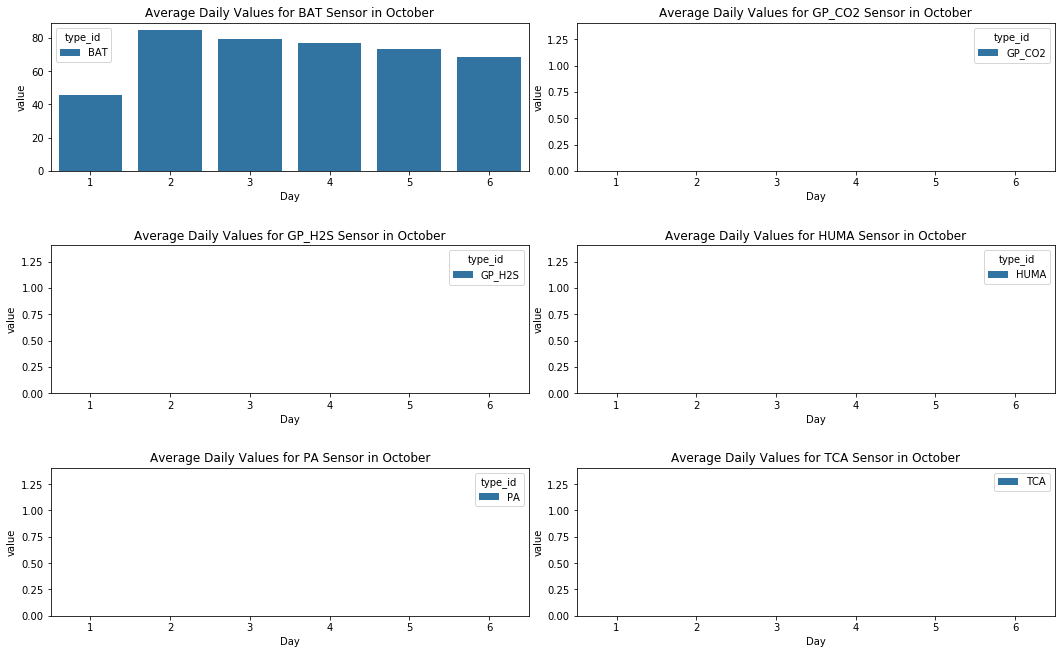

In [125]:
df16 = data_4mean[data_4mean.type_id=="BAT"]
df17 = data_4mean[data_4mean.type_id=="GP_CO2"]
df18 = data_4mean[data_4mean.type_id=="GP_H2S"]
df19 = data_4mean[data_4mean.type_id=="HUMA"]
df20 = data_4mean[data_4mean.type_id=="PA"]
df21 = data_4mean[data_4mean.type_id=="TCA"]

plt.figure(figsize=(18,15))
#fig.suptitle('Vertically stacked subplots')
plt.subplot(4,2,1)
sns.barplot(x="Day", y="value", hue= "type_id", data=df16)
plt.title('Average Daily Values for BAT Sensor in October')
plt.subplot(4,2,2)
sns.barplot(x="Day", y="value", hue= "type_id", data=df17)
plt.title('Average Daily Values for GP_CO2 Sensor in October')
plt.subplot(4,2,3)
sns.barplot(x="Day", y="value", hue= "type_id", data=df18)
plt.title('Average Daily Values for GP_H2S Sensor in October')
plt.subplot(4,2,4)
sns.barplot(x="Day", y="value", hue= "type_id", data=df19)
plt.title('Average Daily Values for HUMA Sensor in October')
plt.subplot(4,2,5)
sns.barplot(x="Day", y="value", hue= "type_id", data=df20)
plt.title('Average Daily Values for PA Sensor in October')
plt.subplot(4,2,6)
sns.barplot(x="Day", y="value", hue= "type_id", data=df21)
plt.title('Average Daily Values for TCA Sensor in October')
#plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.legend()


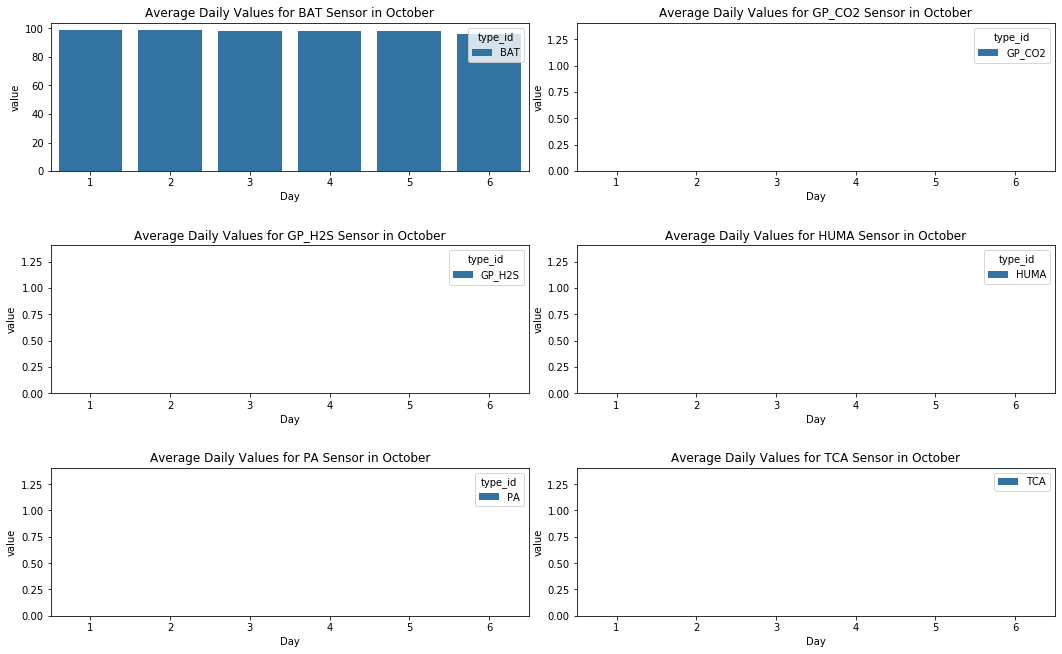

In [126]:
df16_max = data_4max[data_4max.type_id=="BAT"]
df17_max = data_4max[data_4max.type_id=="GP_CO2"]
df18_max = data_4max[data_4max.type_id=="GP_H2S"]
df19_max = data_4max[data_4max.type_id=="HUMA"]
df20_max = data_4max[data_4max.type_id=="PA"]
df21_max = data_4max[data_4max.type_id=="TCA"]

plt.figure(figsize=(18,15))
#fig.suptitle('Vertically stacked subplots')
plt.subplot(4,2,1)
sns.barplot(x="Day", y="value", hue= "type_id", data=df16_max)
plt.title('Average Daily Values for BAT Sensor in October')
plt.subplot(4,2,2)
sns.barplot(x="Day", y="value", hue= "type_id", data=df17_max)
plt.title('Average Daily Values for GP_CO2 Sensor in October')
plt.subplot(4,2,3)
sns.barplot(x="Day", y="value", hue= "type_id", data=df18_max)
plt.title('Average Daily Values for GP_H2S Sensor in October')
plt.subplot(4,2,4)
sns.barplot(x="Day", y="value", hue= "type_id", data=df19_max)
plt.title('Average Daily Values for HUMA Sensor in October')
plt.subplot(4,2,5)
sns.barplot(x="Day", y="value", hue= "type_id", data=df20_max)
plt.title('Average Daily Values for PA Sensor in October')
plt.subplot(4,2,6)
sns.barplot(x="Day", y="value", hue= "type_id", data=df21_max)
plt.title('Average Daily Values for TCA Sensor in October')
#plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.legend()

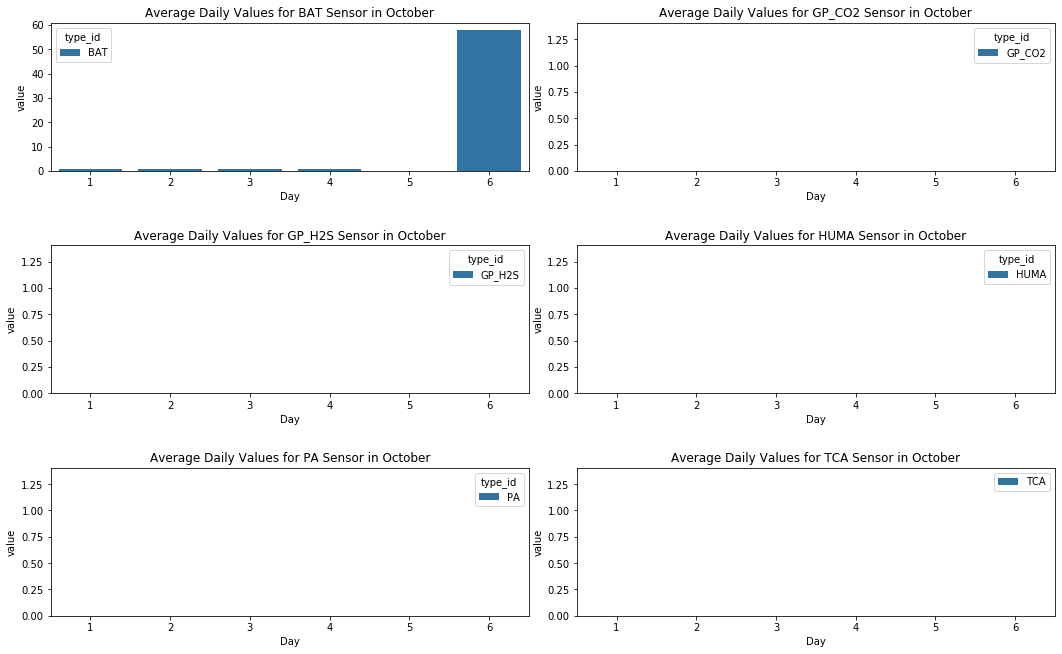

In [127]:
df16_min = data_4min[data_4min.type_id=="BAT"]
df17_min = data_4min[data_4min.type_id=="GP_CO2"]
df18_min = data_4min[data_4min.type_id=="GP_H2S"]
df19_min = data_4min[data_4min.type_id=="HUMA"]
df20_min = data_4min[data_4min.type_id=="PA"]
df21_min = data_4min[data_4min.type_id=="TCA"]

plt.figure(figsize=(18,15))
#fig.suptitle('Vertically stacked subplots')
plt.subplot(4,2,1)
sns.barplot(x="Day", y="value", hue= "type_id", data=df16_min)
plt.title('Average Daily Values for BAT Sensor in October')
plt.subplot(4,2,2)
sns.barplot(x="Day", y="value", hue= "type_id", data=df17_min)
plt.title('Average Daily Values for GP_CO2 Sensor in October')
plt.subplot(4,2,3)
sns.barplot(x="Day", y="value", hue= "type_id", data=df18_min)
plt.title('Average Daily Values for GP_H2S Sensor in October')
plt.subplot(4,2,4)
sns.barplot(x="Day", y="value", hue= "type_id", data=df19_min)
plt.title('Average Daily Values for HUMA Sensor in October')
plt.subplot(4,2,5)
sns.barplot(x="Day", y="value", hue= "type_id", data=df20_min)
plt.title('Average Daily Values for PA Sensor in October')
plt.subplot(4,2,6)
sns.barplot(x="Day", y="value", hue= "type_id", data=df21_min)
plt.title('Average Daily Values for TCA Sensor in October')
#plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.legend()

The Correlation heatmap that we are looking for should be along the following lines:


<img src = "images/Corr_plot.JPG" width=450>

First, look for correlations visually. 

**Subtask: Plot all the sensors values (of one type) over time.**

Sub task: Identify all the temperature sensors in the data set. Hint: These are the ones that have the string 'TCA' in their name id's

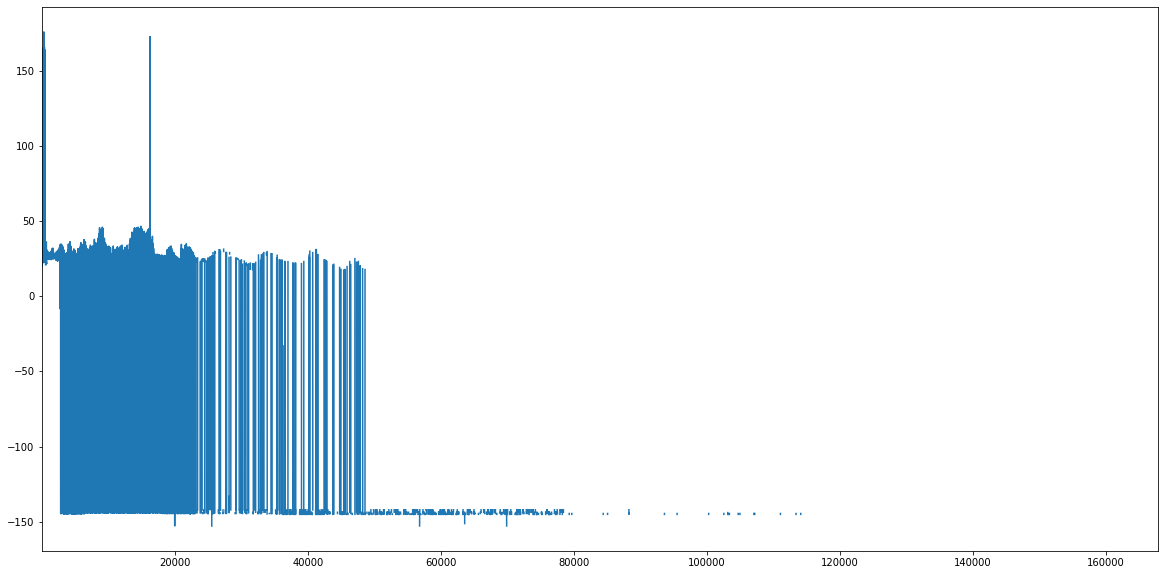

In [128]:
criteria = merged_data.type_id == 'TCA'
plt.figure(figsize=(20,10))
merged_data[criteria]['value'].plot()

In [129]:
#temp_sensors = [s for s in merged_data[merged_data.type_id =='TCA']['id_x']]
#temperature_senors = [s for t,s in zip(merged_data['type_id'], merged_data['id_x']) if t=='TCA'] # alternative way

In [130]:
temp_sensors = [s for s in merged_data[merged_data.type_id =='TCA']['sensor_id']]


** Using Pandas to plot all the temperature sensors on one single plot. **

- Use pandas to loop over each temperature sensor, and plot them one at a time.
- Hint: Use the following trick to do this is to plot one line at a time, over and over in a loop

In [131]:
# plt.figure(figsize=(20,5))

# for s in temp_sensors:
#     #print(s)
#     sub_df = merged_data[merged_data['sensor_id']==s]
#     #print(sub_df)
#     plt.plot(sub_df.index, sub_df['value'], '.')
    

This plot is fine, but all the lines are too close together. We cannot see how each sensor is behaving. For that, we can try drawing "Subplots." In these plots, each sensor gets its own plot (called a 'panel').

**Creating Subplots - Each sensor gets its own panel**

In [132]:
# fig, axarr = plt.subplots(10, sharex=True)
# fig.set_size_inches(20,30) 

# plt.figure(figsize=(20,20))
# for i,s in enumerate(temp_sensors):
#     sub_df = merged_data[merged_data['sensor_id']==s]
#     axarr[i].plot(sub_df.index, sub_df['value'], '*')
    

**Task: Creating a reshaped Data Frame of just Temperature sensors**

For this, we are going to have each column be 1 sensor... from 1 to 10. The rows will be timestamps, as before.

Hint: pd.pivot() is perfect for this task.

In [133]:
temp_df = merged_data[merged_data['sensor_id'].isin(temp_sensors)]

#del temp_df['timestamp']
temp_df = temp_df.reset_index()
temp_df.pivot(columns='sensor_id', values='value')

temp_df

,index,id,value,timestamp,sensor_id,Day,Month,Year,Time,type,si_unit,type_id,description,data_frequency,status,created_at,updated_at,data_type_id,node_id
0,2,764dbdf0-8679-11e6-a353-2f6c041e2491,29.30,2016-08-03 04:39:25+00:00,763ca6f0-8679-11e6-a353-2f6c041e2491,3,8,2016,04:39:25,temperature,celcius,TCA,\N,1800000,OFFLINE,2016-08-03 04:39:25+00,2016-09-29 20:13:52.803+00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
1,6,76514060-8679-11e6-a353-2f6c041e2491,29.94,2016-08-03 04:47:41+00:00,763ca6f0-8679-11e6-a353-2f6c041e2491,3,8,2016,04:47:41,temperature,celcius,TCA,\N,1800000,OFFLINE,2016-08-03 04:39:25+00,2016-09-29 20:13:52.803+00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
2,15,76584540-8679-11e6-a353-2f6c041e2491,28.61,2016-08-03 05:08:52+00:00,763ca6f0-8679-11e6-a353-2f6c041e2491,3,8,2016,05:08:52,temperature,celcius,TCA,\N,1800000,OFFLINE,2016-08-03 04:39:25+00,2016-09-29 20:13:52.803+00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
3,22,765dea91-8679-11e6-a353-2f6c041e2491,28.24,2016-08-03 05:14:08+00:00,763ca6f0-8679-11e6-a353-2f6c041e2491,3,8,2016,05:14:08,temperature,celcius,TCA,\N,1800000,OFFLINE,2016-08-03 04:39:25+00,2016-09-29 20:13:52.803+00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
4,27,7661bb20-8679-11e6-a353-2f6c041e2491,28.57,2016-08-03 05:28:55+00:00,763ca6f0-8679-11e6-a353-2f6c041e2491,3,8,2016,05:28:55,temperature,celcius,TCA,\N,1800000,OFFLINE,2016-08-03 04:39:25+00,2016-09-29 20:13:52.803+00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28032,167699,34fd1c00-8bc5-11e6-ad43-49bd404a7931,NaN,2016-10-06 06:59:52+00:00,763bbc90-8679-11e6-a353-2f6c041e2491,6,10,2016,06:59:52,temperature,celcius,TCA,\N,1800000,OFFLINE,2016-08-03 21:50:32+00,2016-09-30 18:12:04.578+00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762c5340-8679-11e6-a353-2f6c041e2491
28033,167704,d8f40690-8bc8-11e6-ad43-49bd404a7931,NaN,2016-10-06 07:25:56+00:00,d3cf6cd0-8679-11e6-a353-2f6c041e2491,6,10,2016,07:25:56,temperature,celcius,TCA,\N,1800000,OFFLINE,2016-08-15 05:22:31+00,2016-09-30 18:12:04.58+00,35dcb3c0-8679-11e6-bda3-ef77801087ee,d3ca3cb0-8679-11e6-a353-2f6c041e2491
28034,167707,6bac2c90-8bc6-11e6-ad43-49bd404a7931,NaN,2016-10-06 07:08:04+00:00,763bbc90-8679-11e6-a353-2f6c041e2491,6,10,2016,07:08:04,temperature,celcius,TCA,\N,1800000,OFFLINE,2016-08-03 21:50:32+00,2016-09-30 18:12:04.578+00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762c5340-8679-11e6-a353-2f6c041e2491
28035,167710,c627c000-8bc9-11e6-ad43-49bd404a7931,NaN,2016-10-06 07:32:51+00:00,763bbc90-8679-11e6-a353-2f6c041e2491,6,10,2016,07:32:51,temperature,celcius,TCA,\N,1800000,OFFLINE,2016-08-03 21:50:32+00,2016-09-30 18:12:04.578+00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762c5340-8679-11e6-a353-2f6c041e2491


Since this is a real sensor data set, there are some time stamps and sensor_id's that are repeating. (Unfortunately, this happens often in real data sets.)

**Task: Find all rows with the same [Timestamp, Sensor_id] and delete them **

**Here's a clever way to find out all the duplicated rows.**

Some Timestamp and sensor_id are repeating. That causes Indexing problems.

In [134]:
#pd.concat(g for _, g in df.groupby("ID") if len(g) > 1)
pd.concat(g for _, g in temp_df.groupby(['timestamp', 'sensor_id']) if len(g) > 1)

,index,id,value,timestamp,sensor_id,Day,Month,Year,Time,type,si_unit,type_id,description,data_frequency,status,created_at,updated_at,data_type_id,node_id
1584,9500,0d35cdd0-867e-11e6-a353-2f6c041e2491,25.64,2016-08-20 20:46:05+00:00,d3cf6cd0-8679-11e6-a353-2f6c041e2491,20,8,2016,20:46:05,temperature,celcius,TCA,\N,1800000,OFFLINE,2016-08-15 05:22:31+00,2016-09-30 18:12:04.58+00,35dcb3c0-8679-11e6-bda3-ef77801087ee,d3ca3cb0-8679-11e6-a353-2f6c041e2491
1599,9599,0d34bc60-867e-11e6-a353-2f6c041e2491,25.64,2016-08-20 20:46:05+00:00,d3cf6cd0-8679-11e6-a353-2f6c041e2491,20,8,2016,20:46:05,temperature,celcius,TCA,\N,1800000,OFFLINE,2016-08-15 05:22:31+00,2016-09-30 18:12:04.58+00,35dcb3c0-8679-11e6-bda3-ef77801087ee,d3ca3cb0-8679-11e6-a353-2f6c041e2491
1808,10869,a29f50d0-867e-11e6-a353-2f6c041e2491,-144.12,2016-08-21 08:21:30+00:00,c15f9391-8679-11e6-a353-2f6c041e2491,21,8,2016,08:21:30,temperature,celcius,TCA,\N,1800000,OFFLINE,2016-08-10 04:20:22+00,2016-09-29 19:20:17.516+00,35dcb3c0-8679-11e6-bda3-ef77801087ee,c14ccee0-8679-11e6-a353-2f6c041e2491
1819,10914,a2a0b060-867e-11e6-a353-2f6c041e2491,-144.12,2016-08-21 08:21:30+00:00,c15f9391-8679-11e6-a353-2f6c041e2491,21,8,2016,08:21:30,temperature,celcius,TCA,\N,1800000,OFFLINE,2016-08-10 04:20:22+00,2016-09-29 19:20:17.516+00,35dcb3c0-8679-11e6-bda3-ef77801087ee,c14ccee0-8679-11e6-a353-2f6c041e2491
1791,10748,a2c416e0-867e-11e6-a353-2f6c041e2491,-144.12,2016-08-21 08:51:26+00:00,c15f9391-8679-11e6-a353-2f6c041e2491,21,8,2016,08:51:26,temperature,celcius,TCA,\N,1800000,OFFLINE,2016-08-10 04:20:22+00,2016-09-29 19:20:17.516+00,35dcb3c0-8679-11e6-bda3-ef77801087ee,c14ccee0-8679-11e6-a353-2f6c041e2491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27774,166163,a55909b0-8b4c-11e6-ad43-49bd404a7931,NaN,2016-10-05 16:37:33+00:00,763bbc90-8679-11e6-a353-2f6c041e2491,5,10,2016,16:37:33,temperature,celcius,TCA,\N,1800000,OFFLINE,2016-08-03 21:50:32+00,2016-09-30 18:12:04.578+00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762c5340-8679-11e6-a353-2f6c041e2491
27991,167458,975ef820-8baf-11e6-ad43-49bd404a7931,NaN,2016-10-06 04:25:36+00:00,763bbc90-8679-11e6-a353-2f6c041e2491,6,10,2016,04:25:36,temperature,celcius,TCA,\N,1800000,OFFLINE,2016-08-03 21:50:32+00,2016-09-30 18:12:04.578+00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762c5340-8679-11e6-a353-2f6c041e2491
27992,167459,975f4640-8baf-11e6-ad43-49bd404a7931,NaN,2016-10-06 04:25:36+00:00,763bbc90-8679-11e6-a353-2f6c041e2491,6,10,2016,04:25:36,temperature,celcius,TCA,\N,1800000,OFFLINE,2016-08-03 21:50:32+00,2016-09-30 18:12:04.578+00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762c5340-8679-11e6-a353-2f6c041e2491
28000,167495,f23f67e0-8bb2-11e6-ad43-49bd404a7931,NaN,2016-10-06 04:49:53+00:00,763bbc90-8679-11e6-a353-2f6c041e2491,6,10,2016,04:49:53,temperature,celcius,TCA,\N,1800000,OFFLINE,2016-08-03 21:50:32+00,2016-09-30 18:12:04.578+00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762c5340-8679-11e6-a353-2f6c041e2491


**Task: Drop all the rows where timestamp and sensor_id are duplicated**

In [135]:
tdf = temp_df.drop_duplicates(subset = ['timestamp', 'sensor_id'], keep='first')
# Hint: Look at https://segment.com/blog/5-advanced-testing-techniques-in-go/

In [136]:
temp_df_cor = tdf.pivot(index='timestamp', columns='sensor_id', values='value')


In [137]:
daily_temp_cor_df = temp_df_cor.resample('D').mean()

Now, we are finally ready to calculate the correlations across sensor values. Hint: `Use corr()`

In [138]:
corr_df = daily_temp_cor_df.corr()

In [139]:
# Create a mask to display only the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal).
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True


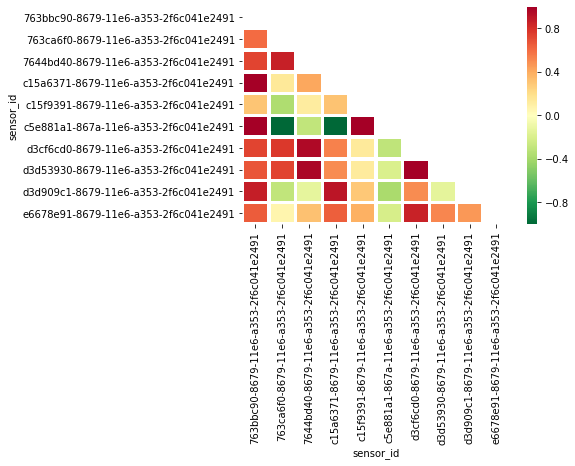

In [140]:
# Create the heatmap using seaborn library. 
# List if colormaps (parameter 'cmap') is available here: http://matplotlib.org/examples/color/colormaps_reference.html
sns.heatmap(corr_df, cmap='RdYlGn_r', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
 
# Show the plot we reorient the labels for each column and row to make them easier to read.
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

In [141]:
full2 = merged_data.drop_duplicates(subset = ['timestamp', 'sensor_id'], keep='first')

In [142]:
full_wide = full2.pivot(index='timestamp', columns='sensor_id', values='value')


In [143]:
daily_all_sensors = full_wide.resample('D').mean()

In [144]:
daily_all_sensors

sensor_id,1248ff60-e707-11e6-89c8-314aa4f67f8c,7635c920-8679-11e6-a353-2f6c041e2491,7635f030-8679-11e6-a353-2f6c041e2491,7636da90-8679-11e6-a353-2f6c041e2491,763701a0-8679-11e6-a353-2f6c041e2491,763701a1-8679-11e6-a353-2f6c041e2491,763b9580-8679-11e6-a353-2f6c041e2491,763bbc90-8679-11e6-a353-2f6c041e2491,763ca6f0-8679-11e6-a353-2f6c041e2491,763d6a40-8679-11e6-a353-2f6c041e2491,...,d3d909c0-8679-11e6-a353-2f6c041e2491,d3d909c1-8679-11e6-a353-2f6c041e2491,d3db2ca0-8679-11e6-a353-2f6c041e2491,d3db53b0-8679-11e6-a353-2f6c041e2491,e66592c0-8679-11e6-a353-2f6c041e2491,e6678e90-8679-11e6-a353-2f6c041e2491,e6678e91-8679-11e6-a353-2f6c041e2491,e66851e0-8679-11e6-a353-2f6c041e2491,e66851e1-8679-11e6-a353-2f6c041e2491,e6691530-8679-11e6-a353-2f6c041e2491
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-07-01 00:00:00+00:00,306.902098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-02 00:00:00+00:00,267.804196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-03 00:00:00+00:00,286.972028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-04 00:00:00+00:00,339.860140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-05 00:00:00+00:00,445.828571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-02 00:00:00+00:00,NaN,NaN,83.110236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-03 00:00:00+00:00,NaN,NaN,78.088710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-04 00:00:00+00:00,NaN,NaN,72.263014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
daily_all_sensors.isnull().sum()

sensor_id
1248ff60-e707-11e6-89c8-314aa4f67f8c    36
7635c920-8679-11e6-a353-2f6c041e2491    75
7635f030-8679-11e6-a353-2f6c041e2491    63
7636da90-8679-11e6-a353-2f6c041e2491    74
763701a0-8679-11e6-a353-2f6c041e2491    74
                                        ..
e6678e90-8679-11e6-a353-2f6c041e2491    86
e6678e91-8679-11e6-a353-2f6c041e2491    86
e66851e0-8679-11e6-a353-2f6c041e2491    86
e66851e1-8679-11e6-a353-2f6c041e2491    98
e6691530-8679-11e6-a353-2f6c041e2491    86
Length: 61, dtype: int64

**Trying to building a Linear Model**

In order to do that, we first need to create a data frame with the columns representing only those sensors for ONE NODE.

Try to see if pd.pivot() can help with grouping Nodes together

In [146]:
nodes.name # so we have 10 "nodes" with 6 sensors each. [T, Pr, HUMA, PPM , PPM2, BATT]

0       N1
1       N9
2       N8
3      N10
4       N2
5       N3
6       N7
7       N4
8       N5
9     RSAM
10      N6
Name: name, dtype: object

In [147]:
fullnode = pd.merge(merged_data, nodes, left_on='node_id', right_on='id')

In [148]:
fullnode.columns, fullnode.index

(Index(['id_x', 'value', 'timestamp', 'sensor_id', 'Day', 'Month', 'Year',
        'Time', 'type', 'si_unit', 'type_id', 'description_x', 'data_frequency',
        'status_x', 'created_at_x', 'updated_at_x', 'data_type_id', 'node_id',
        'id_y', 'name', 'description_y', 'location', 'status_y', 'created_at_y',
        'updated_at_y', 'volcano_id'],
       dtype='object'),
 Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                  8,      9,
             ...
             176524, 176525, 176526, 176527, 176528, 176529, 176530, 176531,
             176532, 176533],
            dtype='int64', length=176534))

In [149]:
fullnode.set_index('timestamp', inplace=True)

In [150]:
fullnode.resample('D').mean()

,value,Day,Month,Year,data_frequency
timestamp,,,,,
2016-07-01 00:00:00+00:00,306.902098,1.0,7.0,2016.0,1800000.0
2016-07-02 00:00:00+00:00,267.804196,2.0,7.0,2016.0,1800000.0
2016-07-03 00:00:00+00:00,286.972028,3.0,7.0,2016.0,1800000.0
2016-07-04 00:00:00+00:00,339.860140,4.0,7.0,2016.0,1800000.0
2016-07-05 00:00:00+00:00,445.828571,5.0,7.0,2016.0,1800000.0
...,...,...,...,...,...
2016-10-02 00:00:00+00:00,84.783231,2.0,10.0,2016.0,1800000.0
2016-10-03 00:00:00+00:00,79.059548,3.0,10.0,2016.0,1800000.0
2016-10-04 00:00:00+00:00,77.155172,4.0,10.0,2016.0,1800000.0


In [151]:
# fullnode.pivot_table(index=['timestamp', 'name'], columns='type', values='value')
fn_wide = fullnode.pivot_table(index=['timestamp','name'], columns=['type'], values='value')


In [152]:
#Now, let's make the Node ('name') into its own column. We do this by reset_index() for that level (=1)
fn_wide.reset_index(level=1, inplace=True)

In [153]:
fn_wide.head()

type,name,RSAM,battery,carbon dioxide concentration,humidity,hydrogen sulfide concentration,pressure,temperature
timestamp,,,,,,,,
2016-07-01 00:00:31+00:00,RSAM,455.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:10:02+00:00,RSAM,213.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:20:00+00:00,RSAM,225.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:30:01+00:00,RSAM,321.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:40:00+00:00,RSAM,429.0,NaN,NaN,NaN,NaN,NaN,NaN


Before we can perform Linear Regression, we have one last step remaining. We'd like to "resample" all the data, aggregating it down to 'Daily' Levels.

In [154]:
lmfn = fn_wide.resample('D').mean()
lmfn = lmfn.fillna(lmfn.mean())

In [155]:
lmfn

type,RSAM,battery,carbon dioxide concentration,humidity,hydrogen sulfide concentration,pressure,temperature
timestamp,,,,,,,
2016-07-01 00:00:00+00:00,306.902098,75.430055,346.82341,58.820877,29.616125,1.255737e+06,-48.848781
2016-07-02 00:00:00+00:00,267.804196,75.430055,346.82341,58.820877,29.616125,1.255737e+06,-48.848781
2016-07-03 00:00:00+00:00,286.972028,75.430055,346.82341,58.820877,29.616125,1.255737e+06,-48.848781
2016-07-04 00:00:00+00:00,339.860140,75.430055,346.82341,58.820877,29.616125,1.255737e+06,-48.848781
2016-07-05 00:00:00+00:00,445.828571,75.430055,346.82341,58.820877,29.616125,1.255737e+06,-48.848781
...,...,...,...,...,...,...,...
2016-10-02 00:00:00+00:00,261.939330,84.808642,346.82341,58.820877,29.616125,1.255737e+06,-48.848781
2016-10-03 00:00:00+00:00,261.939330,79.055556,346.82341,58.820877,29.616125,1.255737e+06,-48.848781
2016-10-04 00:00:00+00:00,261.939330,77.174946,346.82341,58.820877,29.616125,1.255737e+06,-48.848781


In [156]:
lmfn.shape

(98, 7)

### End of Stitching. 

**The Digital Thread for this dataset has been created**

This "digital Thread" has been used to 'stitch' the data frame with all the values we wish to analyze.

---
Now we finally have the data frame in the shape we wanted to enable Linear Regression.

### 8.0 Sample Modeling

**8.1 Building A Battery Remaining-Life prediction model **
Build a machine learning model (LR, tree-based or any other) to try and predict the Battery life (remaining) as a function of any of the other sensor characteristic.

* Which variable (sensor) is a good predictor of battery life?
* Is your linear regression a "good fit?"
* What it the RMSE of your predicted values?

In [157]:
#==============================================================================
# Supervised learning linear regression
#==============================================================================

from sklearn import linear_model

# Split the data into training/testing sets
train = lmfn[:-30]
test = lmfn[-30:]

In [158]:
train.columns

Index(['RSAM', 'battery', 'carbon dioxide concentration', 'humidity',
       'hydrogen sulfide concentration', 'pressure', 'temperature'],
      dtype='object', name='type')

In [159]:
target, predictors = 'battery', 'temperature'

x_train=train[predictors].to_frame() #converts the pandas Series to numpy.ndarray
y_train=train[target].to_frame()
x_test=test[predictors].to_frame() #converts the pandas Series to numpy.ndarray
y_test=test[target].to_frame()

In [160]:
# 2.- Create linear regression object
regr = linear_model.LinearRegression()

# 3.- Train the model using the training sets
regr.fit(x_train,y_train)

# The coefficients
print("Coefficients: ",  float(regr.coef_))
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(x_train) - y_train) ** 2))

Coefficients:  0.25446040432384015
Mean squared error: 27.97
